# Modélisation d'un choc entre deux fluides

## Inroduction

Nous allons étudier ici le choc de deux fluides dans un tube. Les deux fluides de densités fort différentes sont séparés par une membranne pour $ t < 0 $. A $t = 0$ on enlève la membrane instantanement. Cela a pour effet qu'une vage va se deplacer a traver le tube allant de la zone la plus dense vers la zone la moins dense. 

Le modèle que nous utilisons ici se base sur l'équation d'Euler qui va lier la vitesse , la pression et la densité. 
\begin{equation}
\frac{\partial }{\partial t} \underline{\mathbf{u}} + \frac{\partial }{\partial x} \underline{\mathbf{f}} = 0
\end{equation}

Pour explicité cette expression nous devont etablir le lien entre les différentes variables : 

\begin{align}
\frac{\partial \rho}{\partial t} + \frac{\partial}{\partial x}(\rho u) &= 0 \\
\frac{\partial}{\partial t}(\rho u) + \frac{\partial}{\partial x} (\rho u^2 + p)=0 \\
\frac{\partial}{\partial t}(\rho e_T) + \frac{\partial}{\partial x} (\rho u e_T +p u)=0
\end{align}

Ainsi nous pouvons créer deux vecteurs : $\underline{\mathbf{f}}$ représentant le flux et  $\underline{\mathbf{u}}$ qui sont les variables conservées par l'équation d'Euler.

\begin{equation}
\underline{\mathbf{f}} = 
\left[ \begin{array}{c}
f_1 \\
f_2 \\
f_3 \\ \end{array} \right] =
\left[ \begin{array}{c}
\rho u \\
\rho u^2 + p \\
(\rho e_T + p) u\\ \end{array}
\right] =
\left[ \begin{array}{c}
u_2 \\
\frac{u_2^2}{u_1}+(\gamma-1)\left(u_3-\frac{1}{2}\frac{u_2^2}{u_1}\right) \\
\left[u_3+(\gamma-1)\left(u_2-\frac{1}{2}\frac{u_2^2}{u_1}\right)\right]\frac{u_2}{u_1}\\ \end{array}
\right]
\end{equation}


\begin{equation}
\underline{\mathbf{u}} =
\left[ \begin{array}{c}
u_1\\
u_2\\
u_3\\ \end{array} \right] =
\left[ \begin{array}{c}
\rho \\
\rho u \\
\rho e_T \\ \end{array} \right]
\end{equation}

Ce qui donne finalement cette équation que nous allons resoudre :
\begin{equation}
\frac{\partial}{\partial t}
\left[ \begin{array}{c}
\rho \\
\rho u \\
\rho e_T \\ 
\end{array} \right]
+ \frac{\partial}{\partial x}
\left[ \begin{array}{c}
\rho u \\
\rho u^2 + p \\
(\rho e_T + p) u\\ \end{array}
\right]
=0
\end{equation}


##  Discrétisation

Pour résoudre le problème nous allos utilisé la méthode de Richmyer. Cette méthode est en deux étapes. On calcule tout d'abord $\underline{\mathbf{u}}^{n+\frac{1}{2}}_{i+\frac{1}{2}}$,terme predictif et ensuite $\underline{\mathbf{u}}^{n+1}_i $, terme correcteur, selon les équations suivantes : (prediction au milieu de l'inteval)

\begin{align}
\underline{\mathbf{u}}^{n+\frac{1}{2}}_{i+\frac{1}{2}} &= \frac{1}{2} \left( \underline{\mathbf{u}}^n_{i+1} + \underline{\mathbf{u}}^n_i \right) - 
\frac{\Delta t}{2 \Delta x} \left( \underline{\mathbf{f}}^n_{i+1} - \underline{\mathbf{f}}^n_i\right) \\
\underline{\mathbf{u}}^{n+1}_i &= \underline{\mathbf{u}}^n_i - \frac{\Delta t}{\Delta x} \left(\underline{\mathbf{f}}^{n+\frac{1}{2}}_{i+\frac{1}{2}} - \underline{\mathbf{f}}^{n+\frac{1}{2}}_{i-\frac{1}{2}} \right)
\end{align}
avec le flux qui est calulé comme suit: 
\begin{equation}
\underline{\mathbf{f}}^{n+\frac{1}{2}}_{i+\frac{1}{2}} = \underline{\mathbf{f}}\left(\underline{\mathbf{u}}^{n+\frac{1}{2}}_{i+\frac{1}{2}}\right)
\end{equation}
Ce shéma en deux étapes peut se résumer comme suit. Le terme prédictif va calculer le flux au milieu de l'intervale, $ n + \frac{1}{2}$ afin de donné une idée de la variation de la solution approché sur l'intervale [n,n+1] . Ensuite le deuxième terme se base sur l'information que donne le terme prédictif et le terme en n pour calculer la valeur en n+1. 


Un avantage de cette méthode est sa stabibilité pour la condition CFL aussi bien pour des ondes se propageant vers la droite ou vers la gauche. Prouvons le : 
Tour d'abord on pose que $c=\frac{\partial \underline{\mathbf{f}}} {\partial \underline{\mathbf{u}}}$ et que l'on a une équation linéaire et ainsi que  $\underline{\mathbf{u}}_i^n=\underline{\mathbf{u}}^n e^{ikx_j}$, On remplace dans l'équation et on obtient:(advection lineaire)

\begin{align}
\underline{\mathbf{u}}^{n+\frac{1}{2}} e^{ik(x_j+\Delta x)} &= \frac{1}{2}\left(\underline{\mathbf{u}}^n e^{ik(x_j +\Delta x)} + \underline{\mathbf{u}}^n e^{ikx_j}\right) -\frac{\Delta t}{2\Delta x} c \left(\underline{\mathbf{u}}^n e^{ik(x_j + \Delta x)} - \underline{\mathbf{u}}^n e^{ikx_j}\right)\\
\Rightarrow \underline{\mathbf{u}}^{n+\frac{1}{2}} e^{ik \Delta x} &= \underline{\mathbf{u}}^n \left(\frac{e^{ik\Delta x}+1}{2}-\frac{\Delta t}{2\Delta x} c (e^{ik\Delta x} -1)\right)\\
\Rightarrow \underline{\mathbf{u}}^{n+\frac{1}{2}} &= \underline{\mathbf{u}}^n \left(e^{-ik\Delta x /2} \frac{e^{ik\Delta x} + 1}{2}-\frac{\Delta t}{2\Delta x} c e^{-ik\Delta x /2}(e^{ik\Delta x} -1)\right)\\
\Rightarrow \underline{\mathbf{u}}^{n+\frac{1}{2}} &= \underline{\mathbf{u}}^n \left(\frac{e^{ik\Delta x /2} + e^{-ik\Delta x/2}}{2} -\frac{\Delta t}{\Delta x} c \frac{e^{ik\Delta x/2} -e^{-ik\Delta x/2}}{2}\right)
\end{align}
En utilisant les propriétés des exponnentielles imaginaires on a cette expression: 
\begin{align}
\underline{\mathbf{u}}^{n+\frac{1}{2}} &= \underline{\mathbf{u}}^n \left(\cos(k\Delta x/2) -ic \frac{\Delta t}{\Delta x} \sin(k \Delta x/2)\right)
\end{align}

Comme ceci est valable pour pour n'importe quel n on obient cette formule : 

\begin{align}
\underline{\mathbf{u}}^{n+\frac{1}{2}} &= \underline{\mathbf{u}}^0 \left(\cos(k\Delta x/2) -ic \frac{\Delta t}{\Delta x} \sin(k \Delta x/2)\right)^n
\end{align}

Pour que la solution soit stable, il faut nécessaire que le coefficent multiplicatif soit inférieur ou égal à 1 pour évité ainsi que la solution explose après un  certain nomre d'itération. Mathématiquement on a cette condition :$ \lvert \cos (k \Delta x/2) -ic \frac{\Delta t}{\Delta x} sin(k\Delta x/2)\lvert ^ 2 \leq 1$. 
\begin{align}
\Rightarrow c^2 \frac{\Delta t^2}{\Delta x^2}\sin^2(k \Delta x/2) &\leq 1-\cos^2(k\Delta x/2)=\sin^2(k \Delta x/2)\\
\Rightarrow c^2 \frac{\Delta t^2}{\Delta x^2}&\leq 1 \Leftrightarrow \lvert c \frac{\Delta t}{\Delta x} \rvert \leq 1
\end{align}
Notons que l'on a traillaire que sur le terme prédictif or si on est stable sur le terme prédictif on est stable sur le terme correcteur c'est pour cela que l'on ne le fait que pour ce terme. 
On voit que pour ce problème on peut avoir une onde se propageant vers la doite et quelque instants après se propageant vers la gauche ce qu nécessite bien la stabilité pour les deux sens de propagation. 

## Résolution numérique

Passons à la résolution numérique:

Tout d'abord importons les librairies nécessaires à la résolutions du problème. 

In [1]:
import numpy as np
import copy
import matplotlib.pyplot as plt
%matplotlib inline


Ensuite nous avons créer une fonctions qui permet de caluler les conditions initiales. Elle prends en valeurs \gamma , le nombre de point de discrétisation ainsi que les conditions initiales à gauche  , $\underline{IC}_L $ et à droite $\underline{IC}_R$  : 
\begin{equation}
\underline{IC}_L = \left[ \begin{array}{c} \rho_L \\ u_L \\ p_L  \end{array}\right] = \left[ \begin{array}{c} 1\ kg/m^3 \\ 0\ m/s \\ 100\ kN/m^2 \\ \end{array}\right]
\end{equation}
\begin{equation}
\underline{IC}_R = \left[ \begin{array}{c}  \rho_R \\ u_R \\ p_R  \end{array}\right] = \left[ \begin{array}{c} 0.125\ kg/m^3 \\ 0\ m/s \\ 10\ kN/m^2 \\ \end{array}\right]
\end{equation}

In [7]:
def ComputeInitialCondition(ICL,ICR,gamma,nx):
    x=np.linspace(-10,10,nx)
    uin = np.zeros((3,nx))
    lbound=np.where(x<0)
    rbound=np.where(x>=0)
    uin[0,lbound]=ICL[0]
    uin[1,lbound]=ICL[0]*ICL[1]
    uin[2,lbound]=ICL[2]/(gamma-1)+0.5*ICL[0]*ICL[1]*ICL[1]
    uin[0,rbound]=ICR[0]
    uin[1,rbound]=ICR[0]*ICR[1]
    uin[2,rbound]=ICR[2]/(gamma-1)+0.5*ICR[0]*ICR[1]*ICL[1]
    return uin

Ensuite nous avons crée une fonction qui permet de calculer le flux. Cette fonction est appelé deux fois à chaque itérations tout d'abor pour caluler $\underline{\mathbf{u}}^{n+\frac{1}{2}}_{i+\frac{1}{2}}$ et ensuite $\underline{\mathbf{u}}^{n+1}_i $.

In [8]:
def computeF(u,gamma):
    F=np.zeros_like(u)
    F[0,:]=u[1,:]
    F[1,:]=u[1,:]*u[1,:]/u[0,:]+(gamma-1)*(u[2,:]-0.5*u[1,:]*u[1,:]/u[0,:])
    F[2,:]=(u[2,:]+(gamma-1)*(u[2,:]-0.5*u[1,:]*u[1,:]/u[0,:]))*u[1,:]/u[0,:]
    
    return F

Finalement nous avons la fonction qui calcul la solution par la méthode de Richtmyer. 

In [14]:

def SodsShock(uin,tf,gamma,dt,nx,dx):
    #calcul de point selon l'axe temporel
    nt = int(tf/dt +1)
    #initialisation des variables
    u = np.zeros((3,nx))
    un = np.zeros((3,nx))
    unplus = np.zeros((3,nx))
    Utot = np.zeros((nt,3,nx))

    #Calcul des conditions initiales
    u = uin
    Utot[0]=u
    
    for i in range (1,nt):
        #calcul du terme predictif
        F1_2=computeF(u,gamma)
        unplus[:,:-1]  = (u[:,1:]+u[:,:-1])/2-dt/(2*dx)*(F1_2[:,1:]-F1_2[:,:-1])
        unplus[:,-1]=u[:,-1]
        F=computeF(unplus,gamma)
        #calcul du terme correcteur
        un[:,1:-1]=u[:,1:-1]-dt/dx*(F[:,1:-1]-F[:,:-2])
        #addition des conditions aux bords
        un[:,0] = u[:,0]
        un[:,-1] = u[:,-1]
        u = copy.deepcopy(un)
        Utot[i]=copy.deepcopy(u)
        
    return Utot


# Résultats et interprétation


Maitenant appliquons notre code au cas du problème :


In [16]:
nx = 81
dx = .25
dt = .0002
tf = 0.01
L = 20
gamma = 1.4
ICL=np.array([1,0,100000])
ICR=np.array([0.125,0,10000])
u = ComputeInitialCondition(ICL,ICR,gamma,nx)
Utot = SodsShock(u,tf,gamma,dt,nx,dx) 
def V(U):
    nt = len(U)
    nx = len(U[0][1])
    v = U[:,1,:]/U[:,0,:]
    return v

def P(U,gamma):
    nt = len(U)
    nx = len(U[0][1])
    p= (gamma-1)*(U[:,2,:]-0.5*U[:,1,:]*U[:,1,:]/U[:,0,:])
    return p

X_25 = int(12.5/0.25)
nt = int(tf/dt) +1
rho=Utot[:,0,:]
v=V(Utot)
p=P(Utot,gamma)
print("Pour x = 2.5 m "'\n' "La densité vaut ",rho[nt-1,X_25],"kg/m³"'\n'"La vitesse vaut=",v[nt-1,X_25],"m/s"'\n'"La pression vaut ",p[nt-1,X_25],"Pa")

Pour x = 2.5 m 
La densité vaut  0.374691402648 kg/m³
La vitesse vaut= 292.611471527 m/s
La pression vaut  30250.8901676 Pa


Ceci nous donne les mêmes réponces que sur le site. Comparons maintenant les solution analytiques avec les solutions numériques utilisant la méthode décrite précédemant pour t = 0.01 s: 

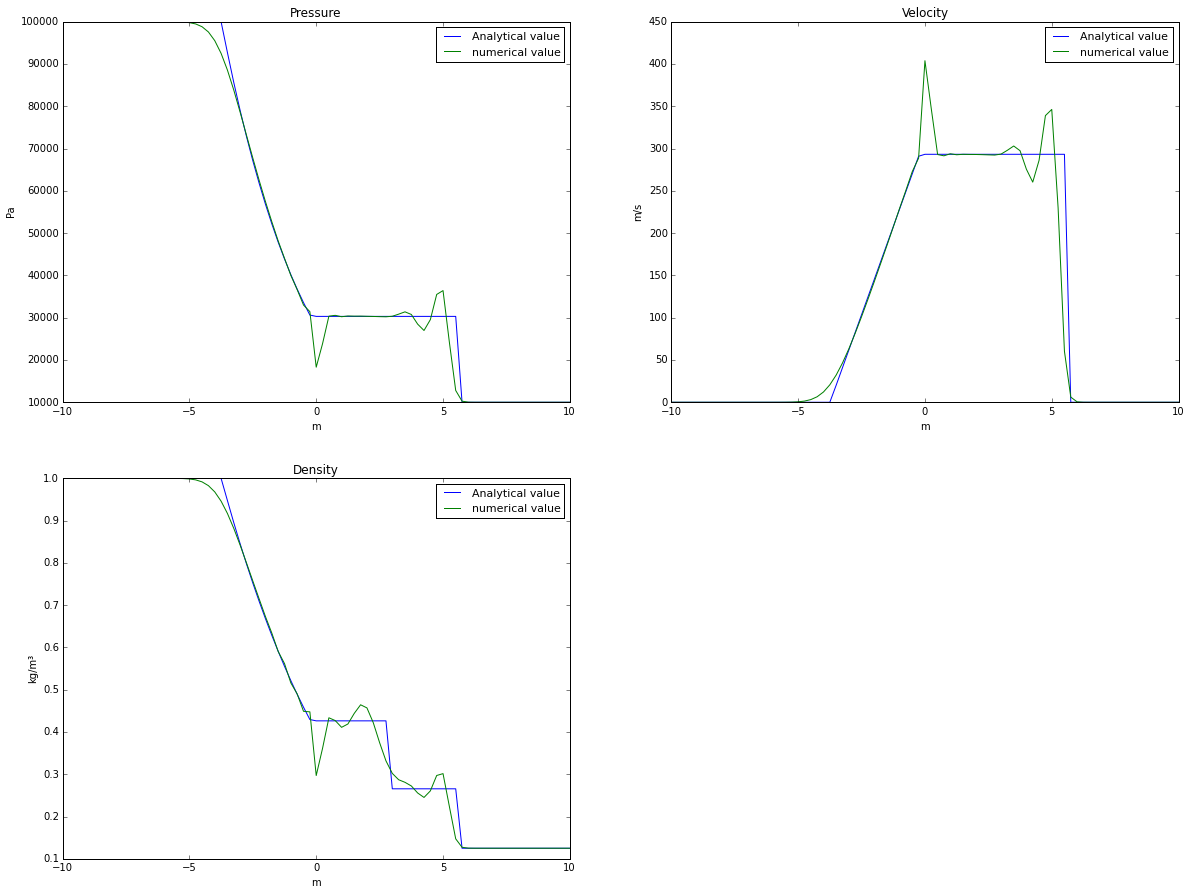

In [35]:


x = x=np.linspace(-10,10,nx)
P_rieman = [ 100000.,100000.,100000.,100000.,100000.,100000.,100000.,100000.,100000.,100000.,100000.,100000., 100000.,100000.,100000.,100000.,100000.,100000.,100000. ,100000.,100000. , 100000.,100000., 100000.,100000.,100000., 92704.01463701,85641.11502937,79044.56171162,72888.40725447  , 67147.8722928  ,  61799.30563663  , 56820.14530084, 52188.88044275  , 47885.01419702 ,  43889.02739715  , 40182.34317275,36747.29241201  ,33567.08007864  , 30625.75237251  , 30313.01732361, 30313.01732361 ,  30313.01732361  , 30313.01732361  , 30313.01732361,  30313.01732361  , 30313.01732361  , 30313.01732361 , 30313.01732361,30313.01732361 , 30313.01732361,30313.01732361,30313.01732361, 30313.01732361 , 30313.01732361,30313.01732361,30313.01732361,30313.01732361 , 30313.01732361,30313.01732361,30313.01732361, 30313.01732361,30313.01732361,10000.,10000.,10000.,10000.,10000.,10000.,10000.,10000.,10000.,10000.,10000.,10000. ,10000.,10000.,10000.,10000.,10000.,10000.]
Rho_rieman =[ 1.,1.,1.,1.,1.,1.,1.,1.,1.,1.,1.,1.,1.,1.,1.,1.,1.,1.,1.,1.,1.,1.,1.,1.,1.,1.,0.94732491,  0.89519148, 0.84537894 , 0.79780894, 0.75240489, 0.70909197,0.6677971,0.62844892,0.59097779,0.55531572,0.52139642,0.4891552 ,0.45852903, 0.42945644,0.42631942,0.42631942,0.42631942,0.42631942,0.42631942,0.42631942,0.42631942,0.42631942,0.42631942,0.42631942,0.42631942,0.42631942,0.26557371,0.26557371,0.26557371,0.26557371,0.26557371,0.26557371,0.26557371,0.26557371,0.26557371,0.26557371,0.26557371,0.125 ,0.125,0.125,0.125,0.125,0.125,0.125,0.125,0.125,0.125 ,0.125,0.125,0.125,0.125,0.125,0.125,0.125,0.125]
V_rieman = [0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0. , 0.,0. ,0.,0.,0.,0.,0.,0. ,0., 20.13811556 ,40.9714489,61.80478223,82.63811556 ,103.4714489,124.30478223 , 145.13811556 , 165.9714489,186.80478223 , 207.63811556 , 228.4714489  , 249.30478223 , 270.13811556,290.9714489 , 293.28626538 , 293.28626538 , 293.28626538 , 293.28626538,293.28626538 , 293.28626538 , 293.28626538 , 293.28626538, 293.28626538,293.28626538 , 293.28626538 , 293.28626538 , 293.28626538 , 293.28626538 , 293.28626538 , 293.28626538 , 293.28626538 , 293.28626538,293.28626538,293.28626538 ,293.28626538,293.28626538,293.28626538,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.,0.]
plt.figure(figsize=(20,15))
plt.subplot(221)
plt.plot(x, P_rieman)
plt.plot(x, p[nt-1,:])
plt.legend(["Analytical value","numerical value"],fontsize=11,loc=1)
plt.xlabel("m")
plt.ylabel("Pa")
plt.title('Pressure')
plt.subplot(222)
plt.plot(x, V_rieman)
plt.plot(x, v[nt-1,:])
plt.legend(["Analytical value","numerical value"],fontsize=11,loc=1)
plt.xlabel("m")
plt.ylabel("m/s")
plt.title('Velocity')
plt.subplot(223)
plt.plot(x, Rho_rieman)
plt.plot(x, rho[nt-1,:])
plt.legend(["Analytical value","numerical value"],fontsize=11,loc=1)
plt.xlabel("m")
plt.ylabel("kg/m³")
plt.title('Density')




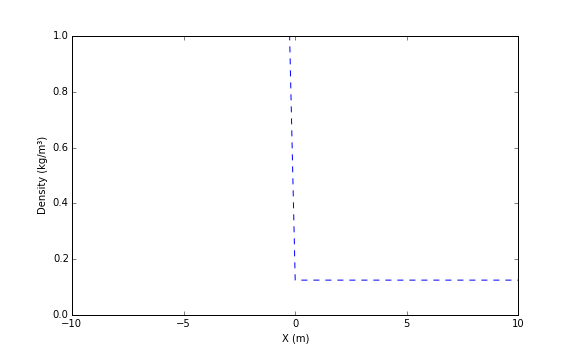
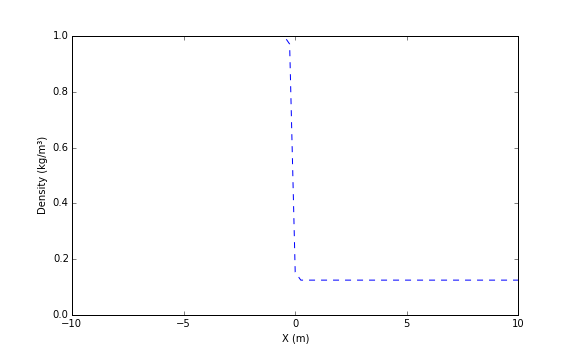
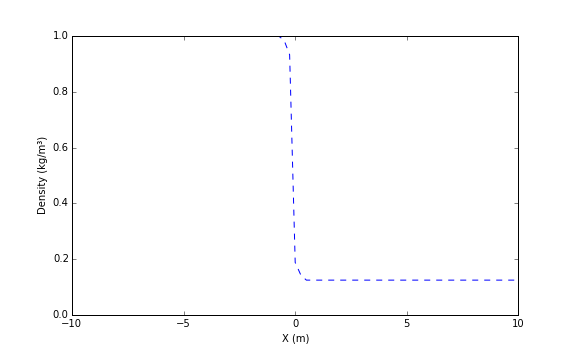
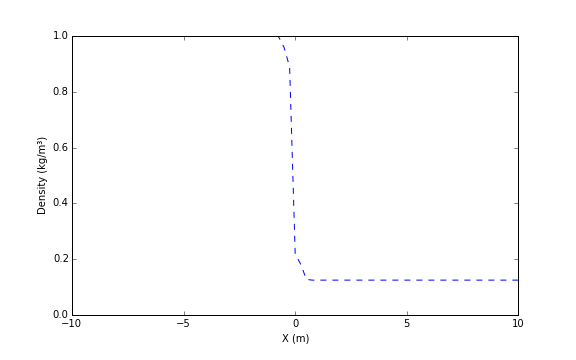
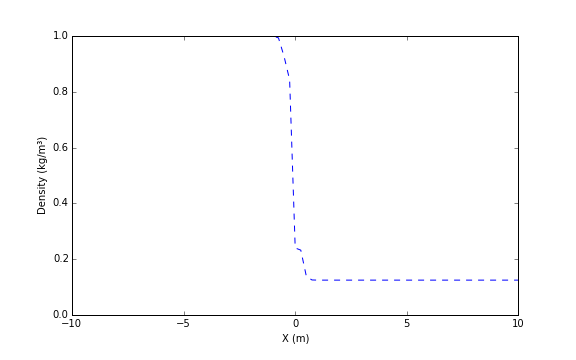
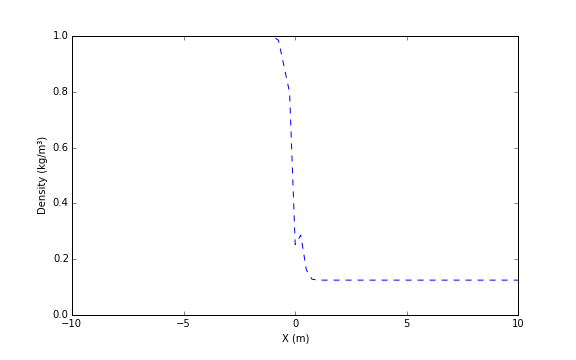
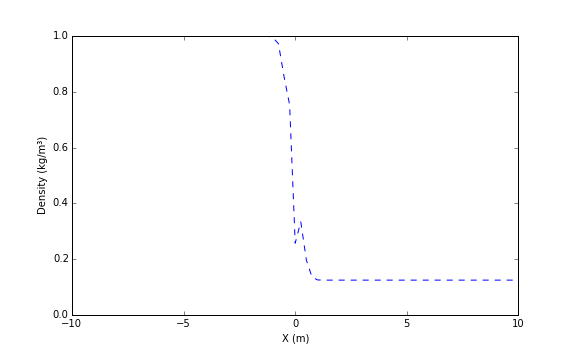
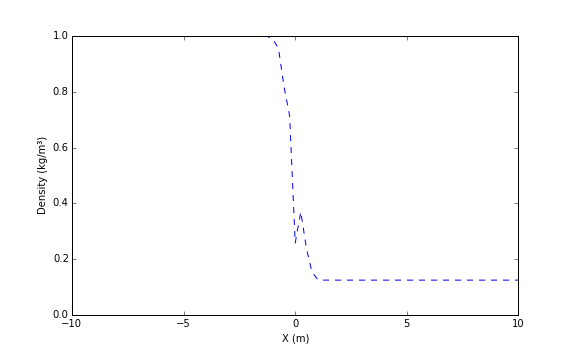
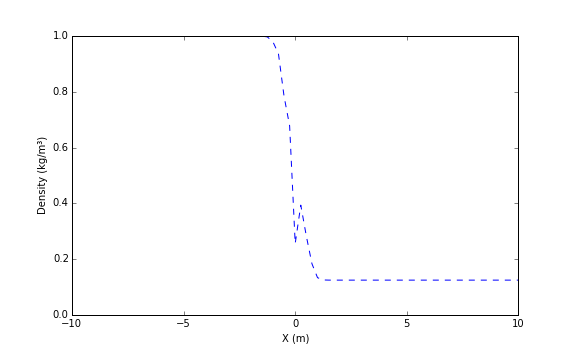
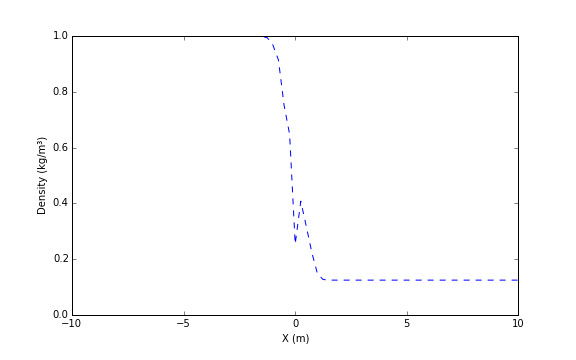
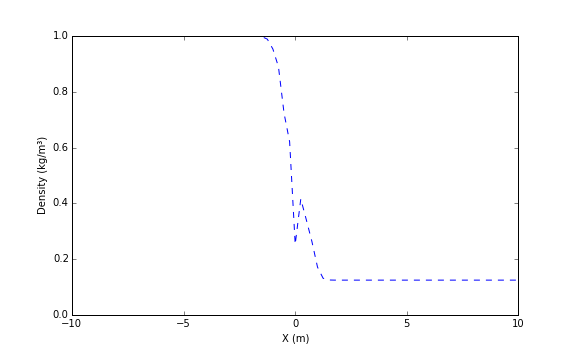
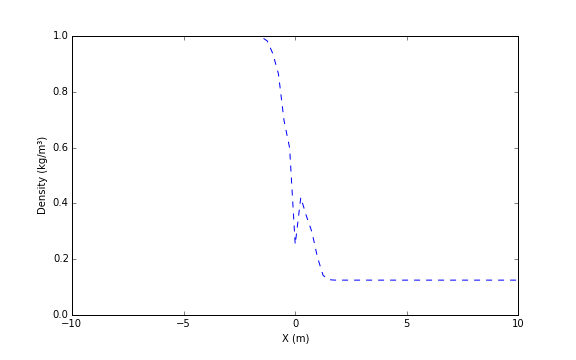
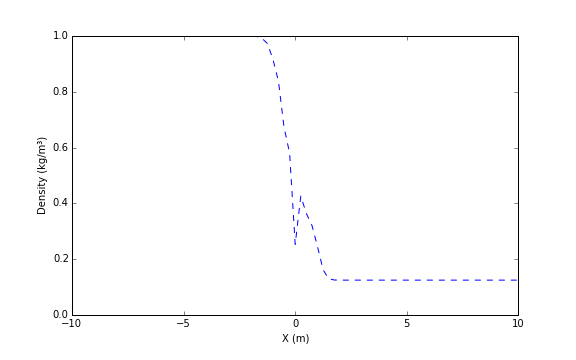
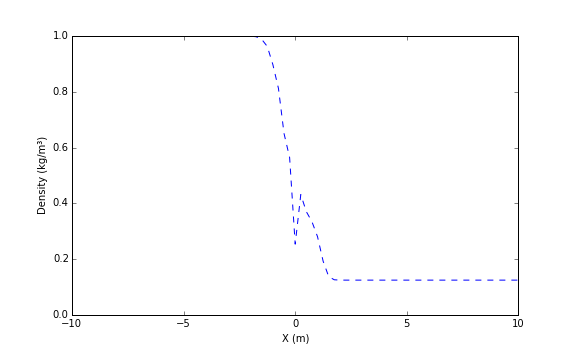
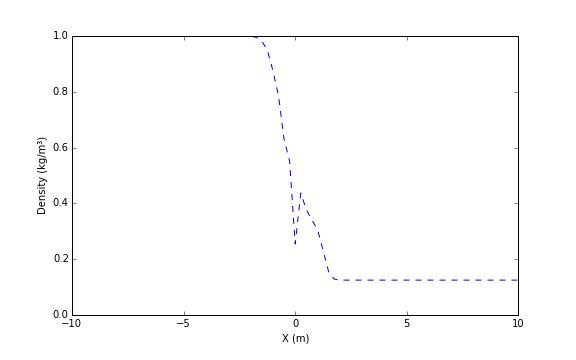
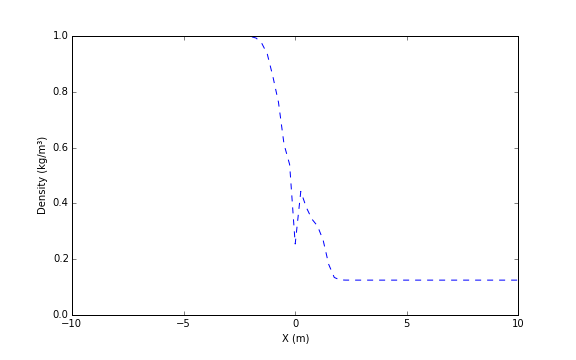
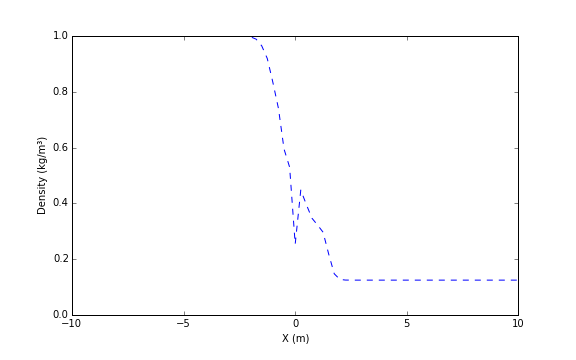
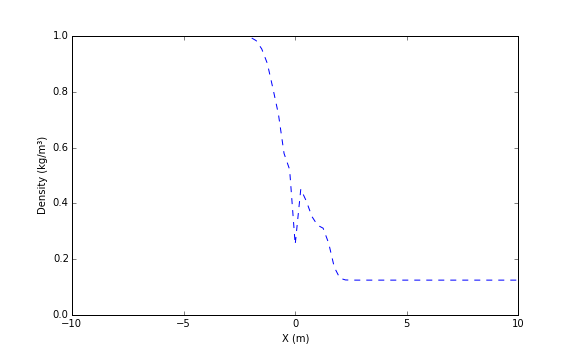
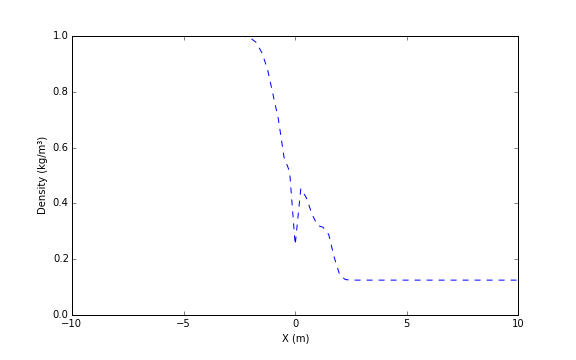
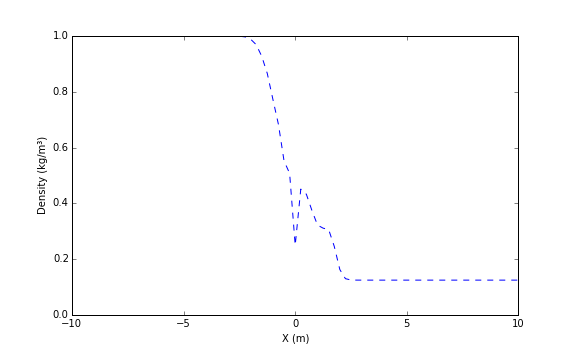
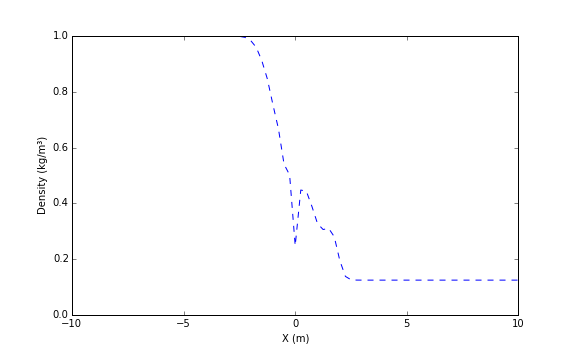
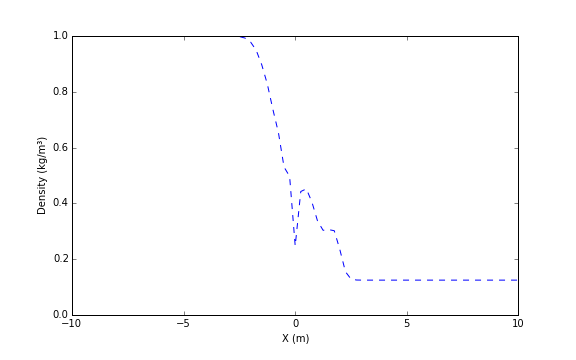
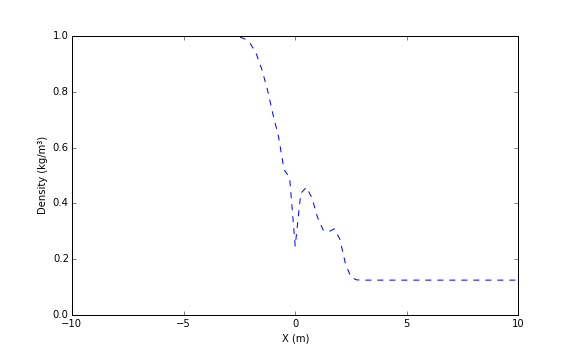
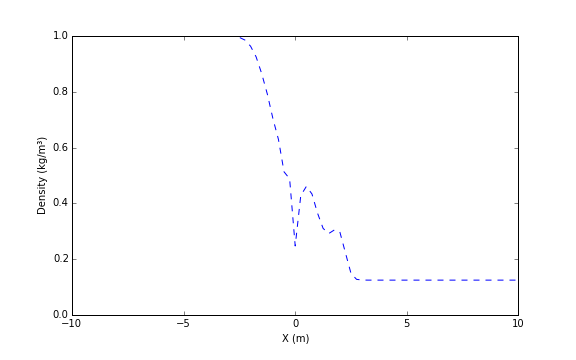
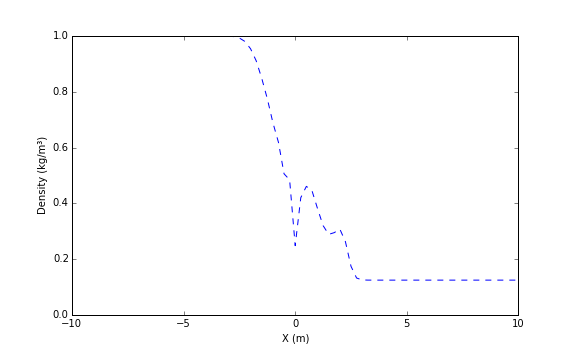
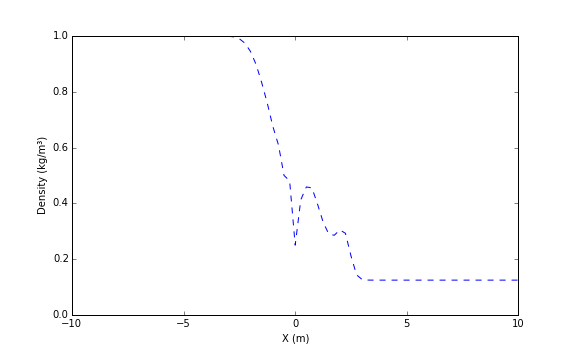
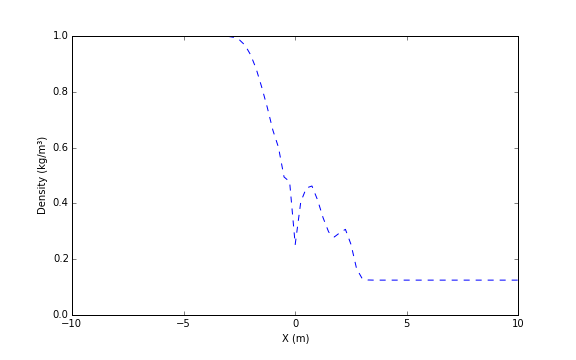
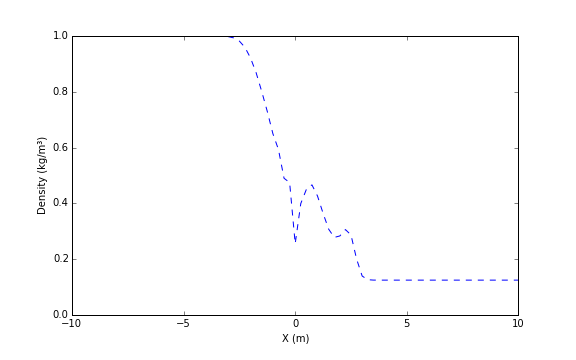
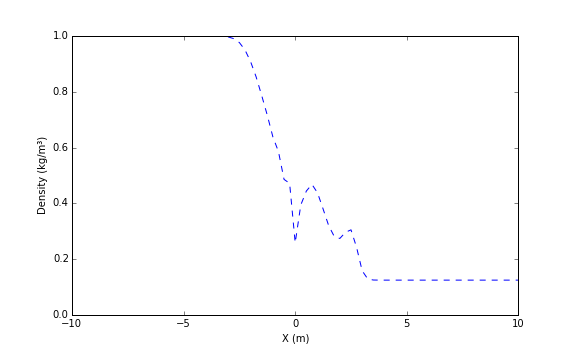
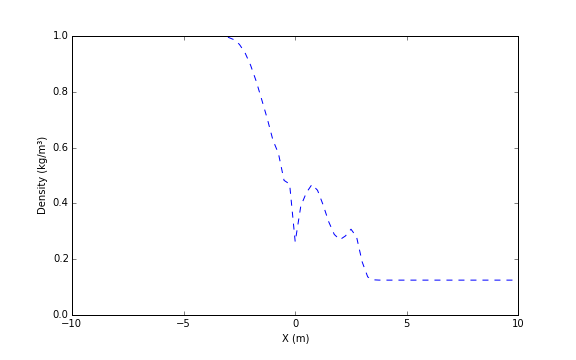
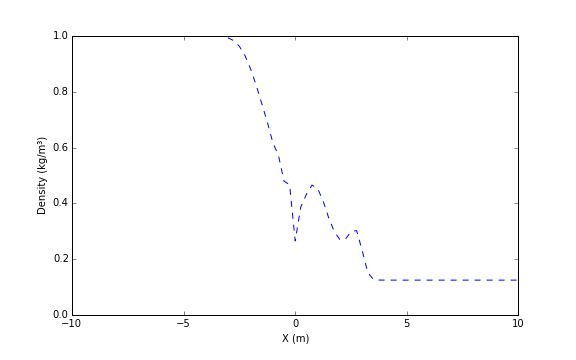
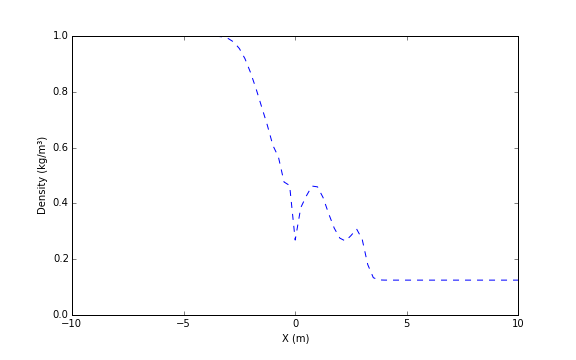
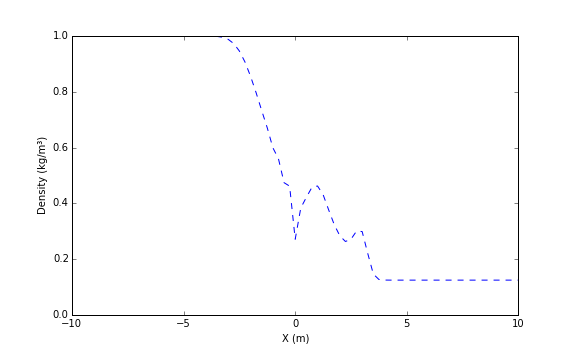
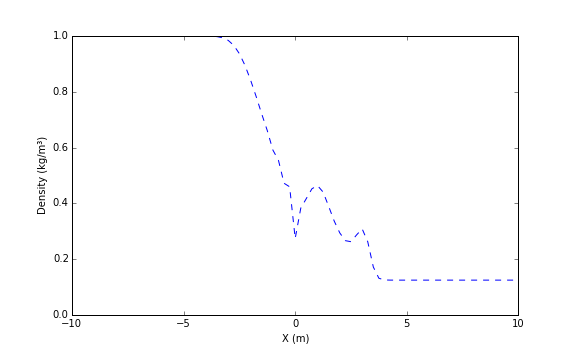
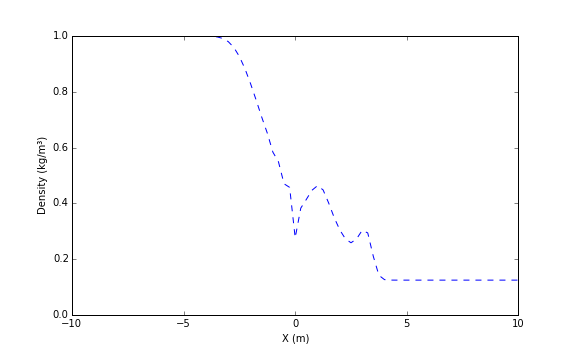
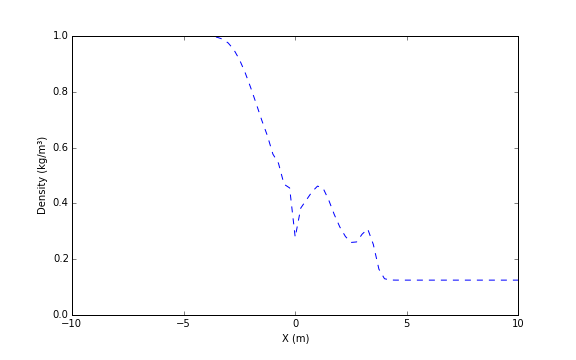
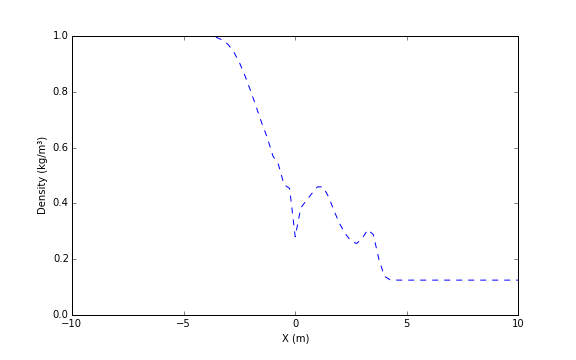
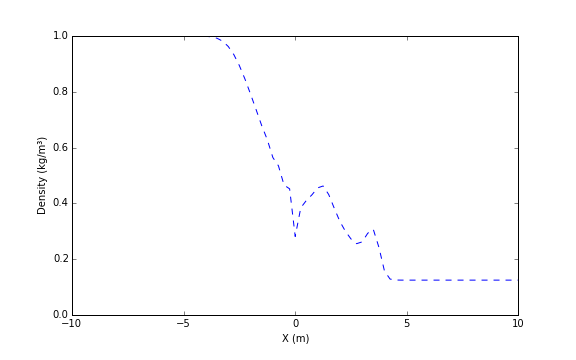
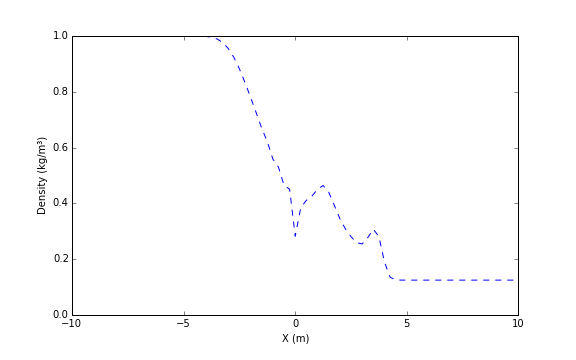
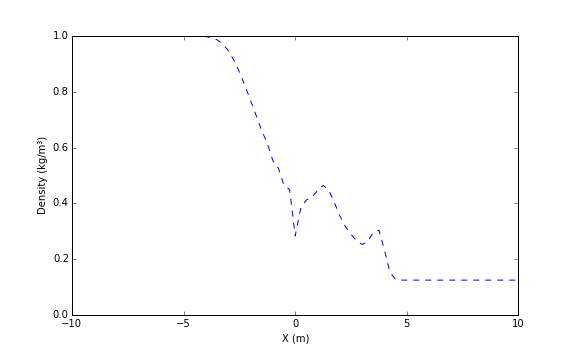
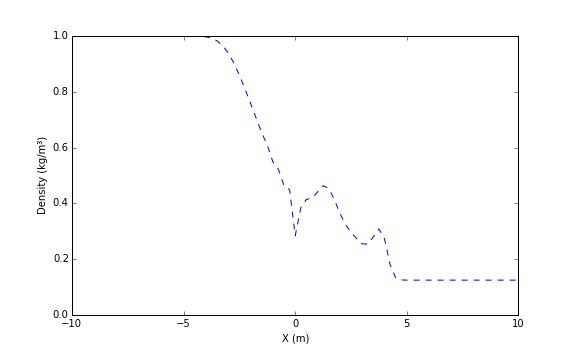
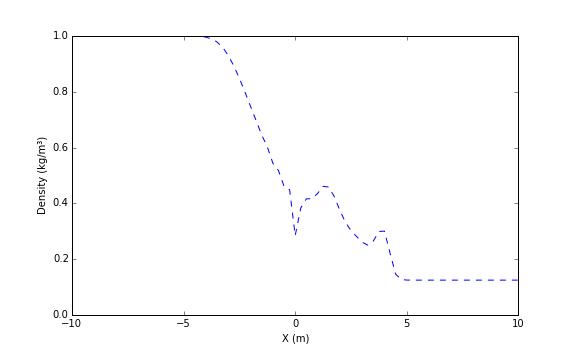
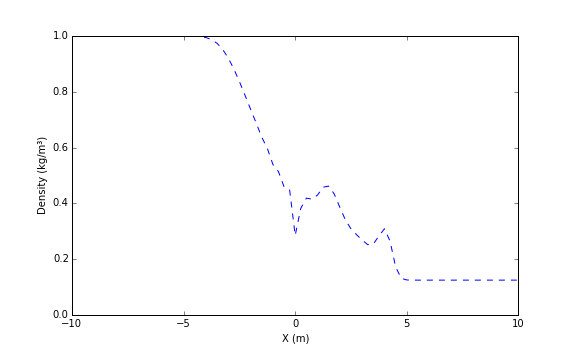
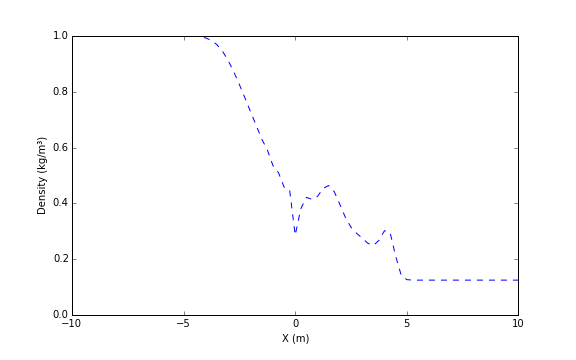
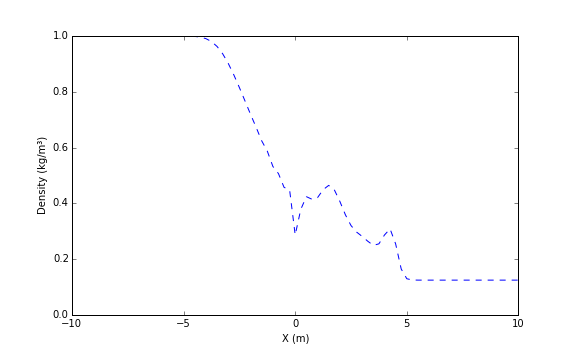
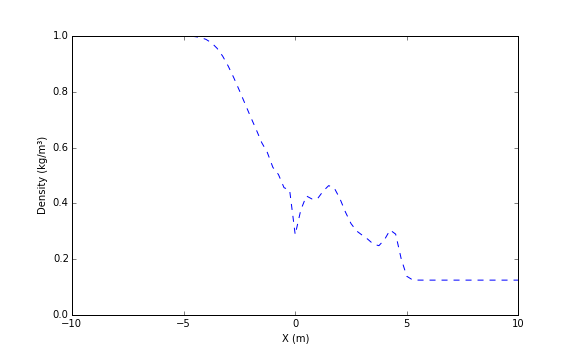
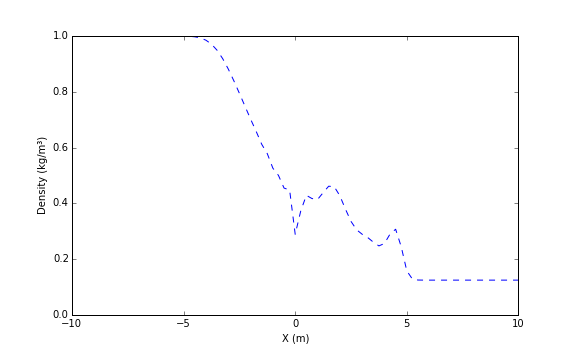
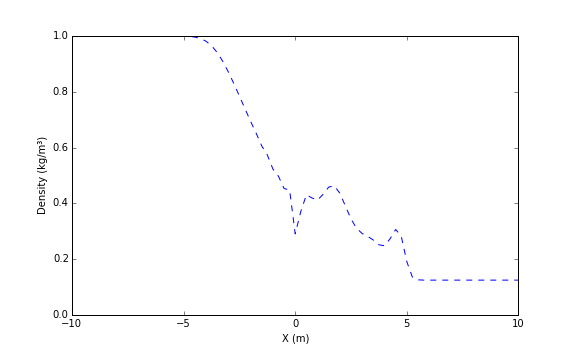
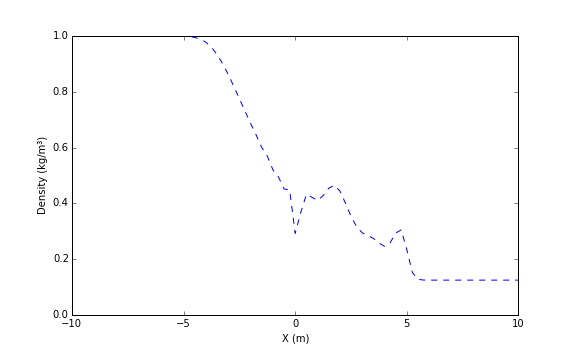
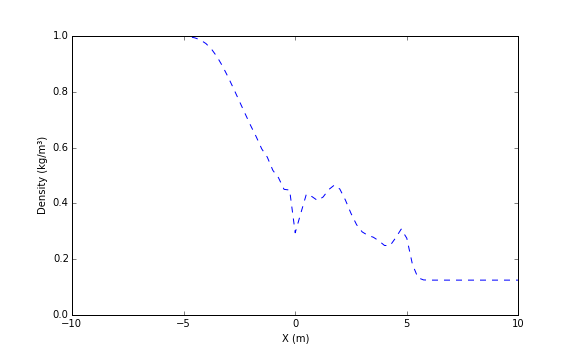
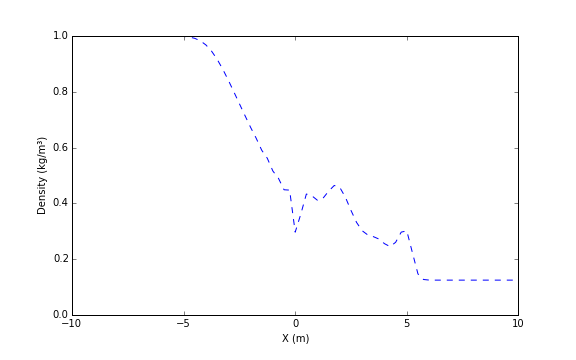

In [40]:
  
from JSAnimation.IPython_display import display_animation
from matplotlib import animation 

def visual(ls,ylimite,labelx,labely):
    fig=plt.figure(figsize=(8,5))
    ax=plt.axes(xlim=(-10,10),ylim = ylimite,xlabel = labelx,ylabel=labely)
    line=ax.plot([],[],ls='--')[0]
    lis = np.ones(nx)
    x = np.linspace(-10, 10, num=81)
    def anim(i):
        line.set_data(x,lis)
        lis[:]=ls[i]
    return animation.FuncAnimation(fig, anim,
                        frames=len(ls),interval=100)

visual(rho,(0,1),"X (m)","Density (kg/m³)")



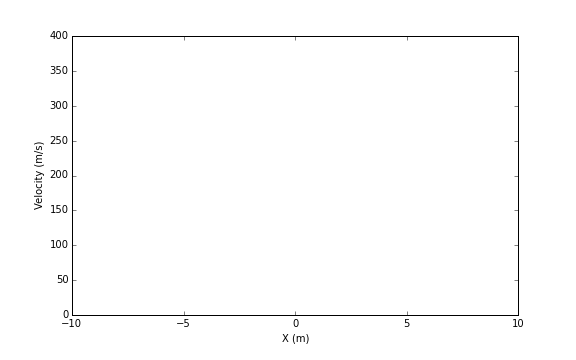
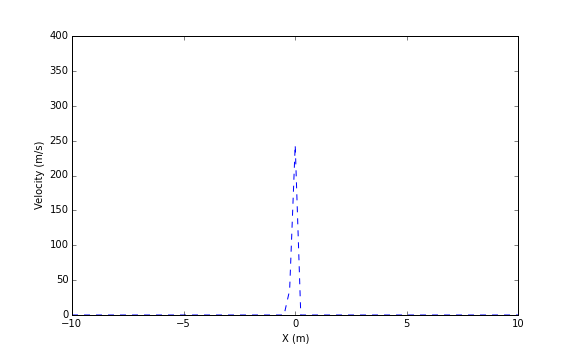
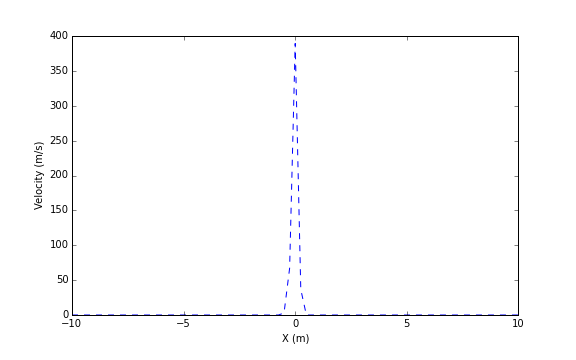
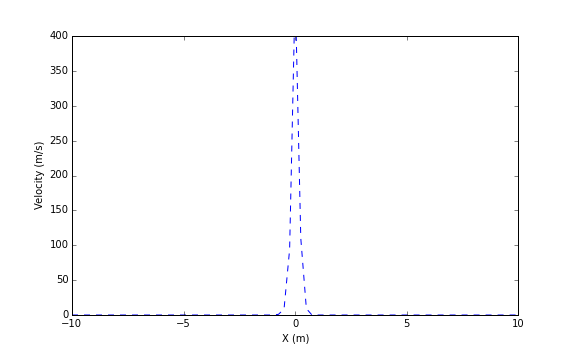
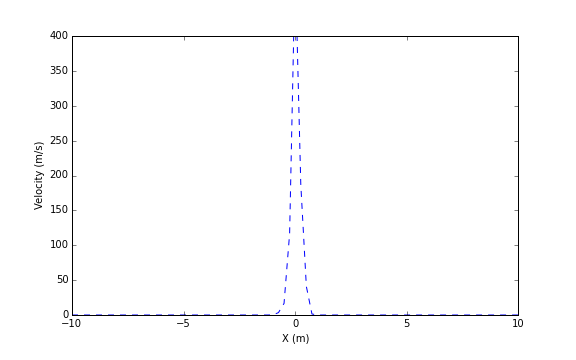
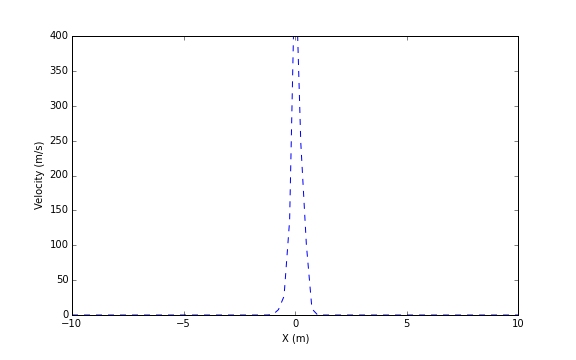
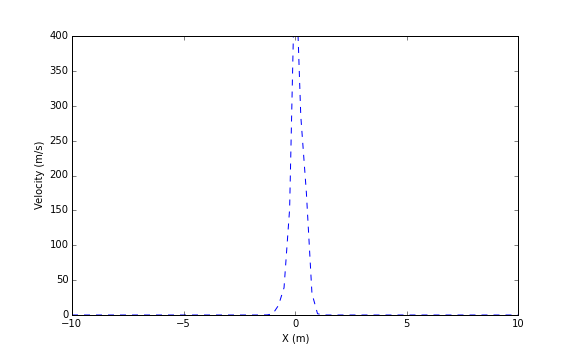
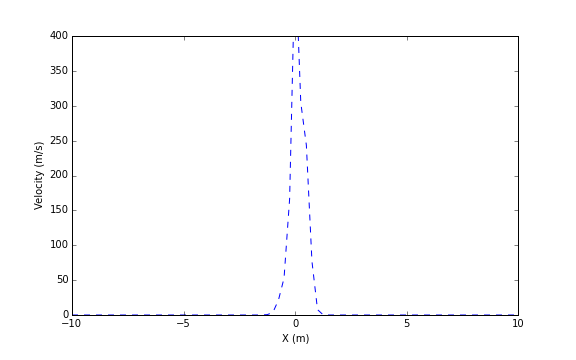
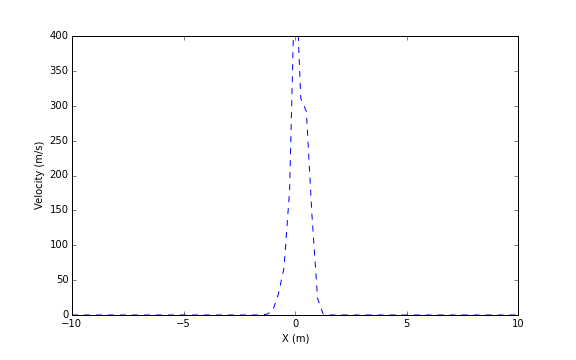
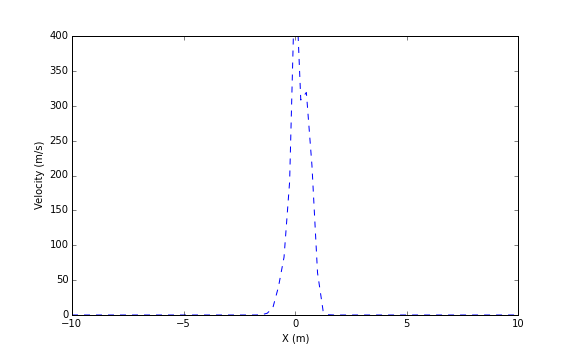
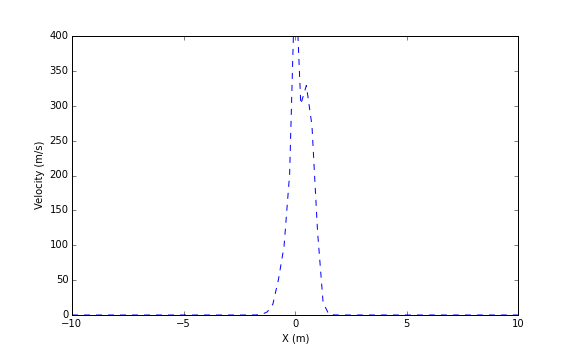
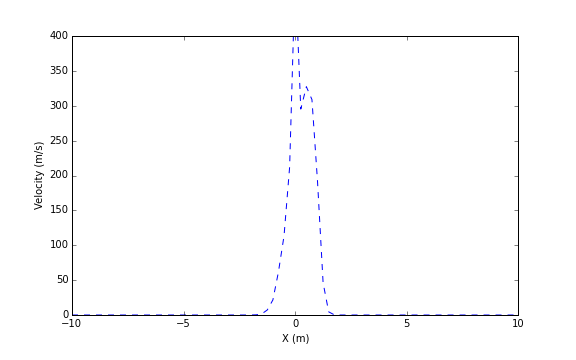
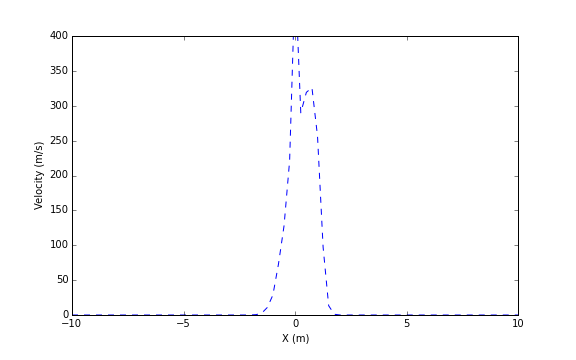
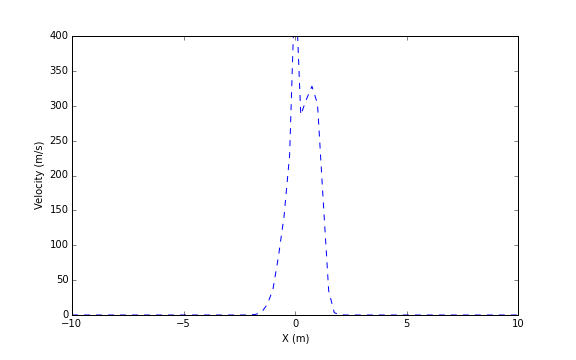
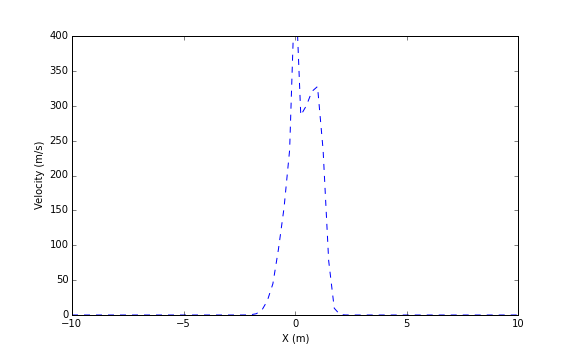
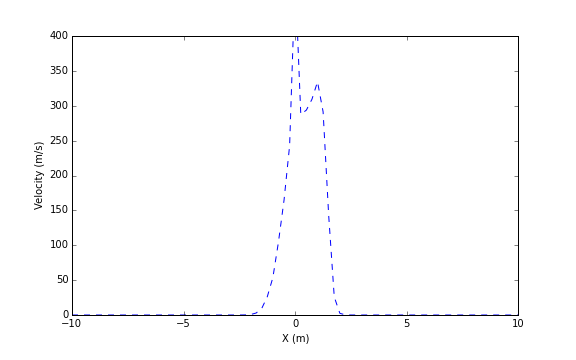
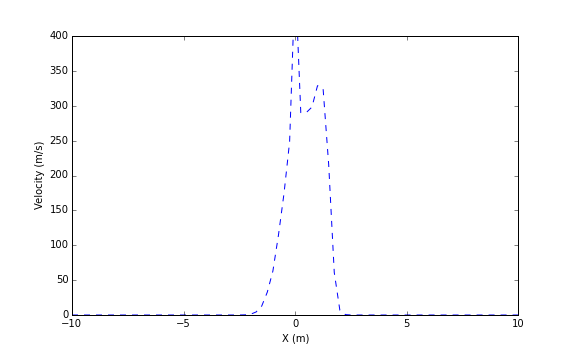
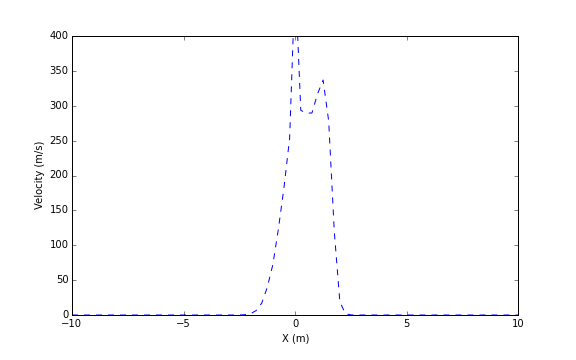
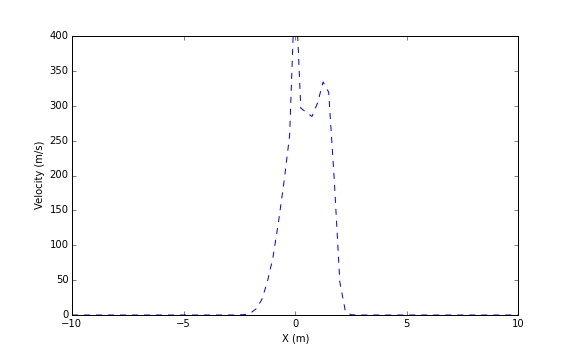
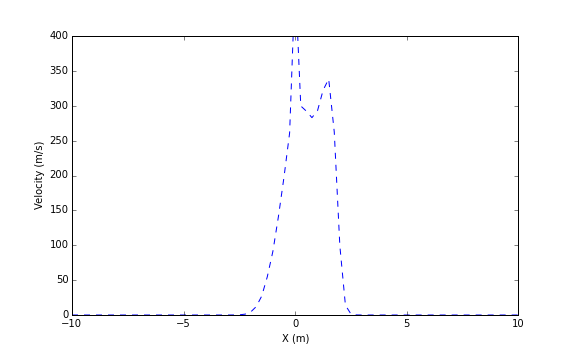
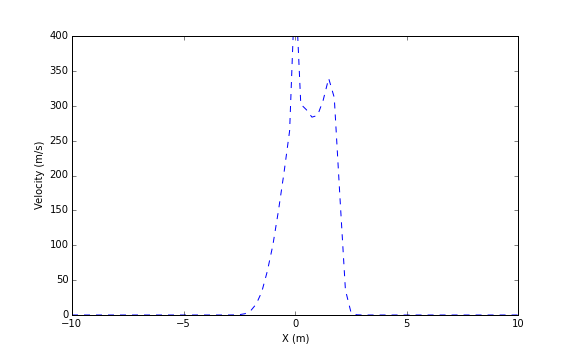
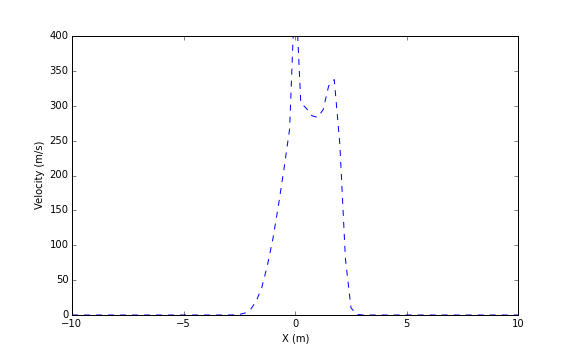
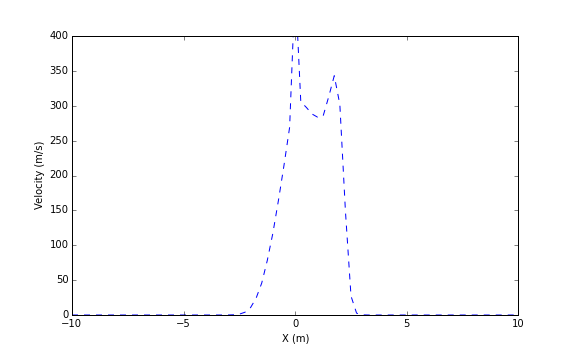
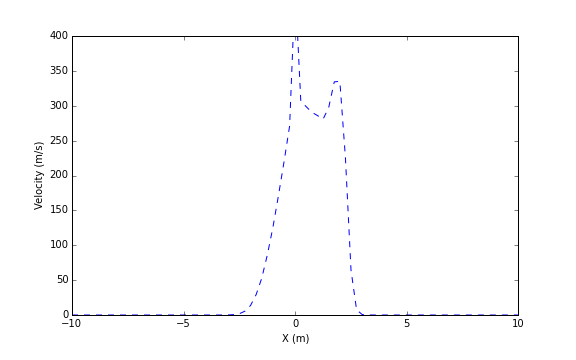
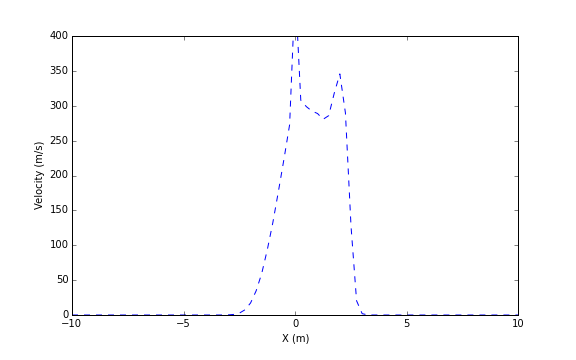
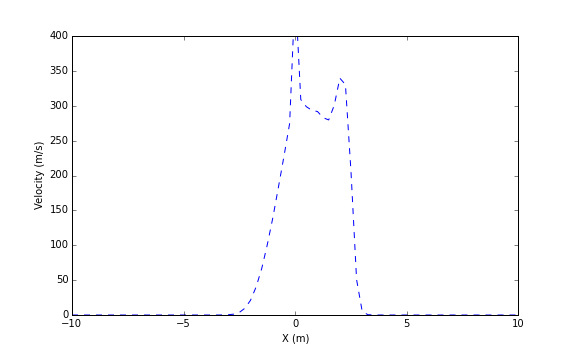
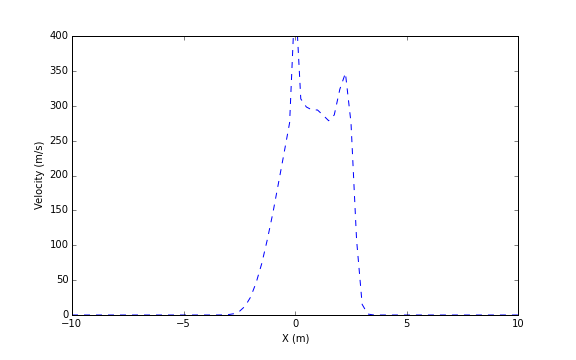
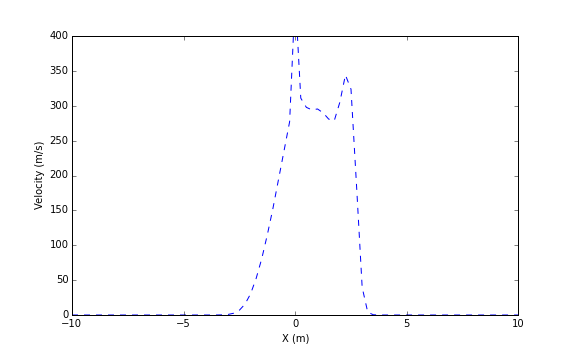
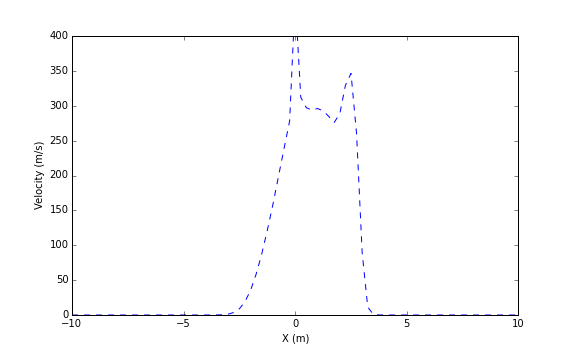
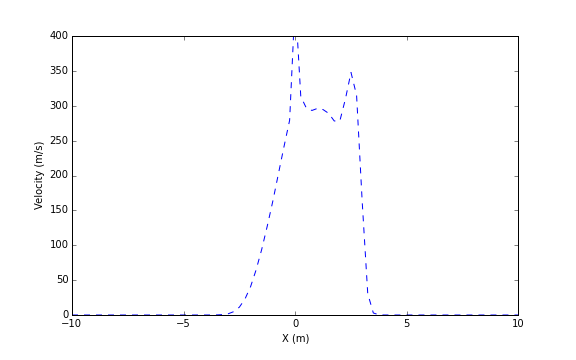
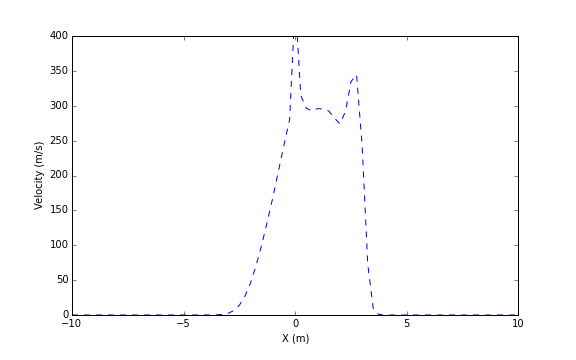
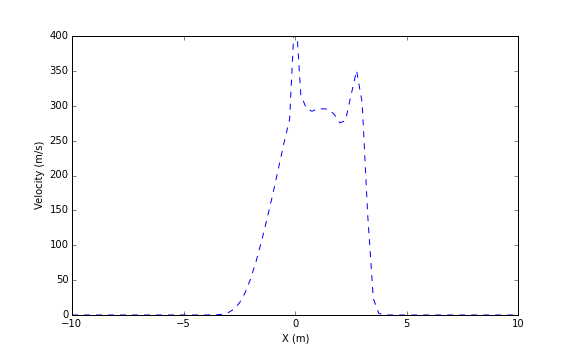
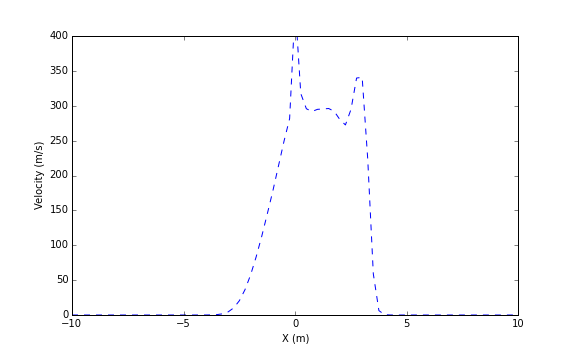
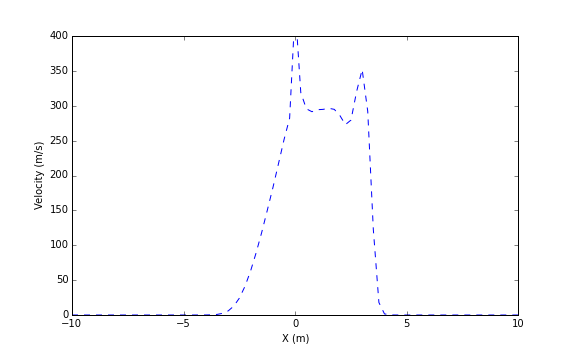
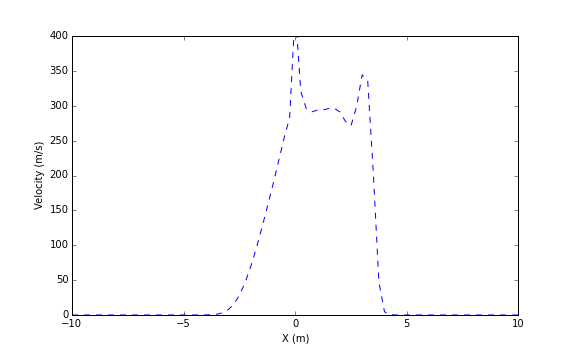
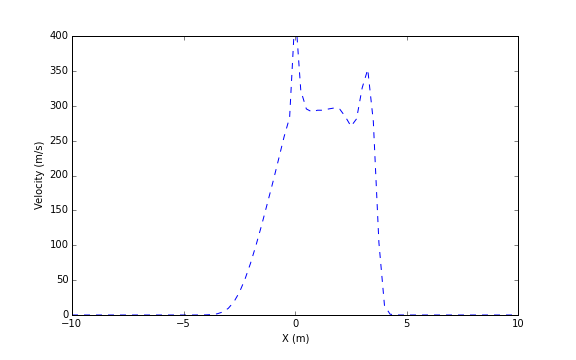
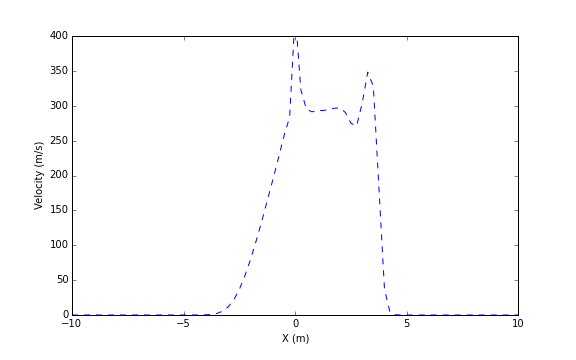
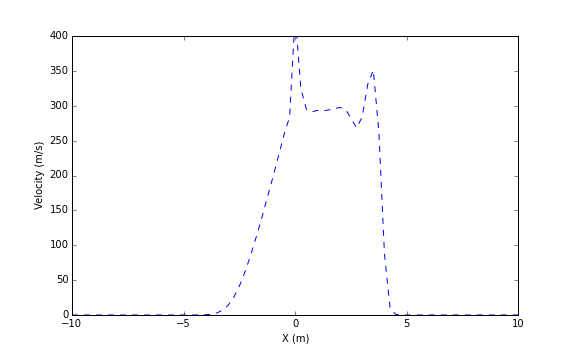
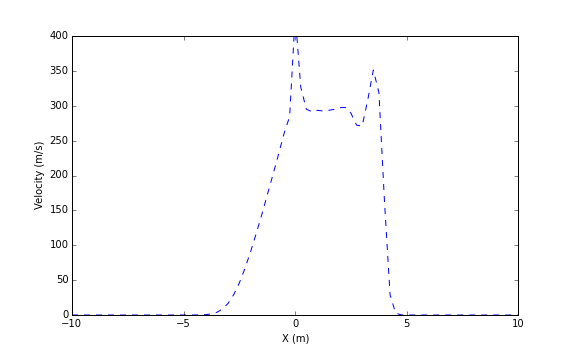
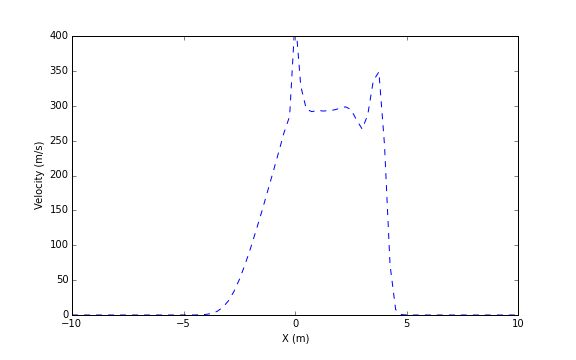
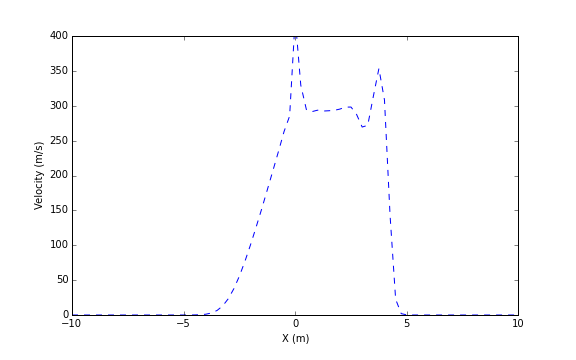
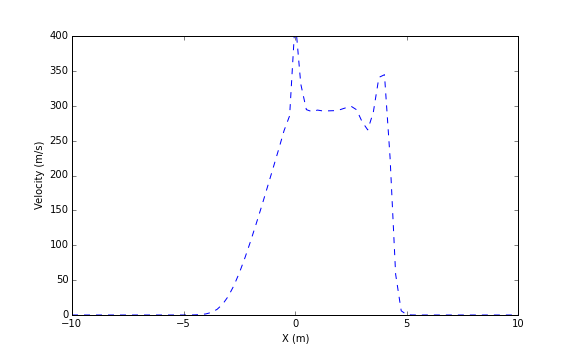
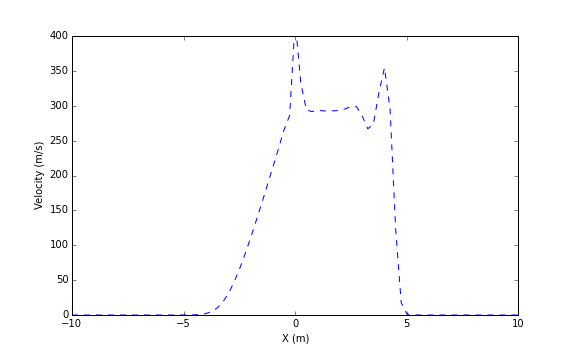
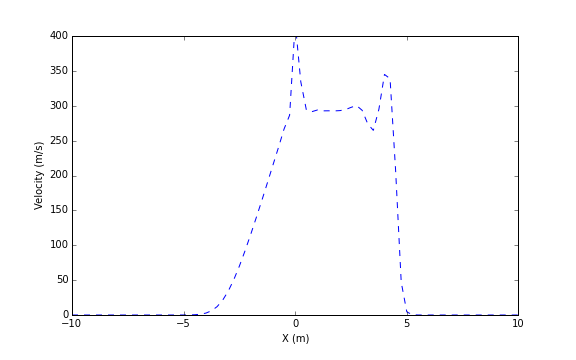
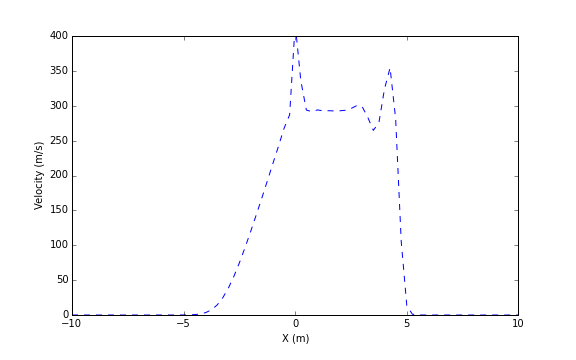
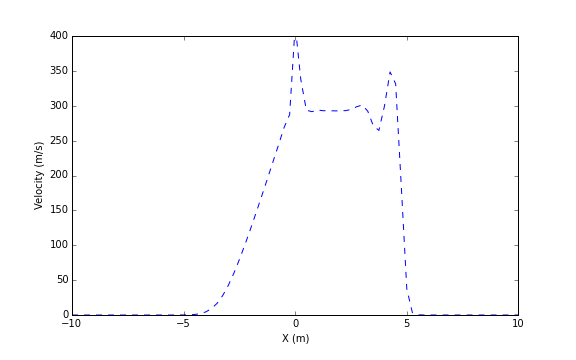
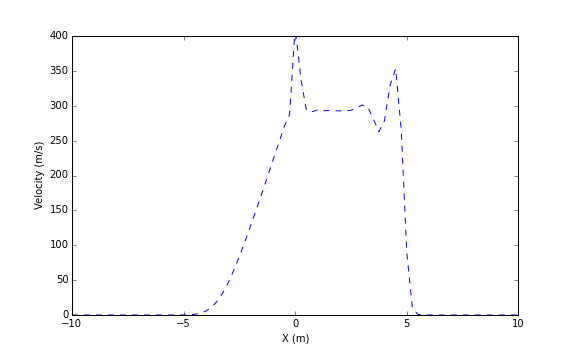
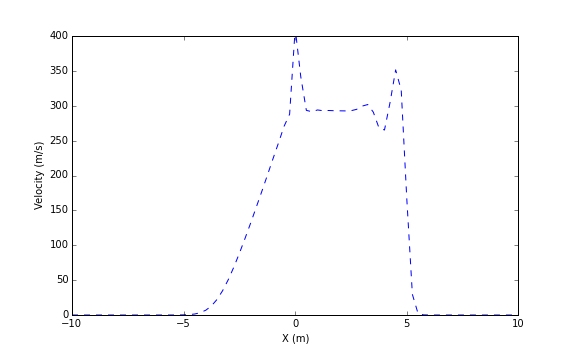
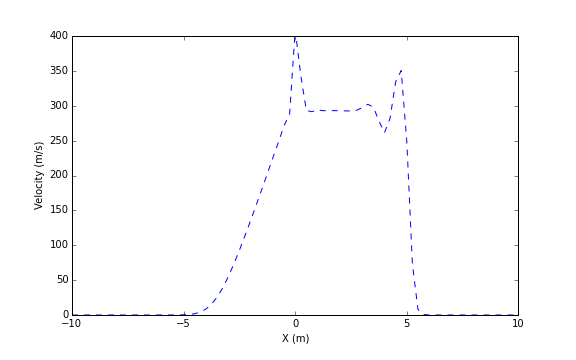
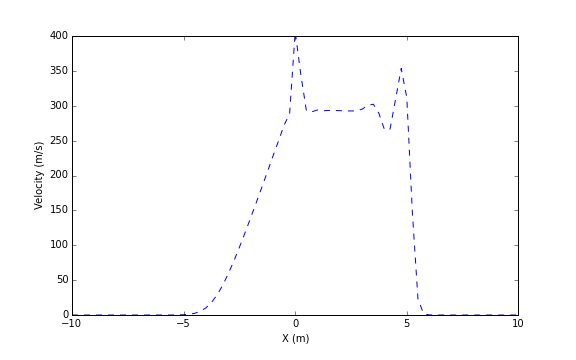
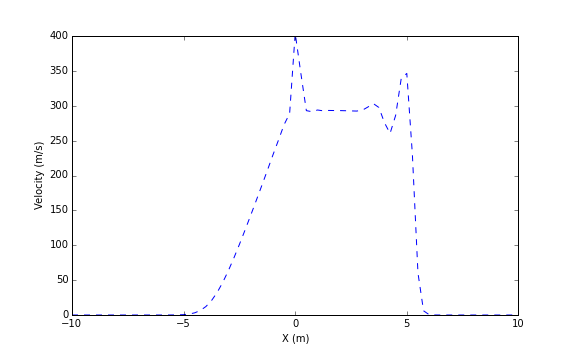

In [41]:
visual(v,(0,400),"X (m)","Velocity (m/s)")


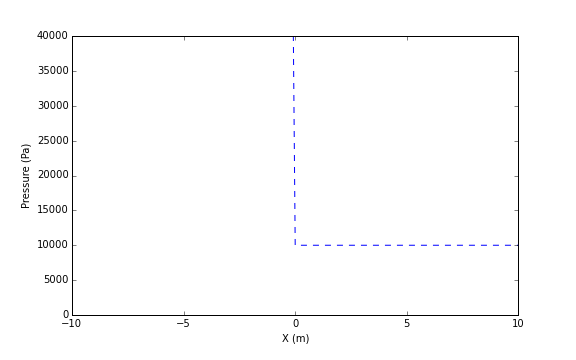
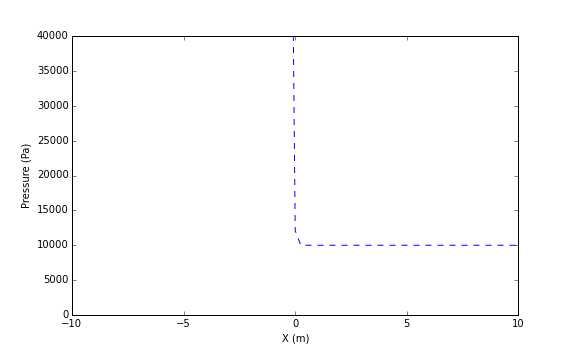
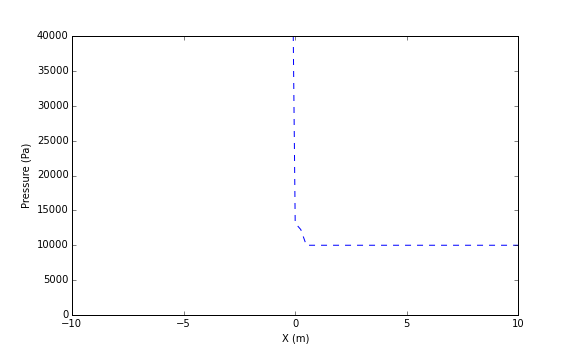
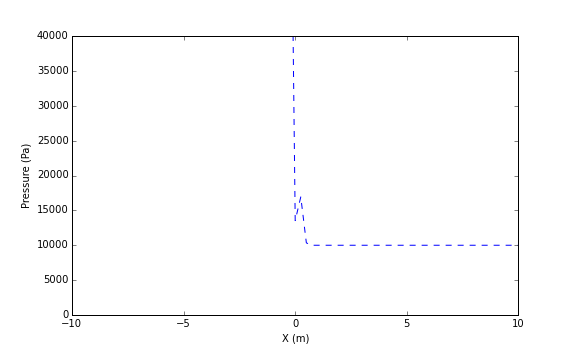
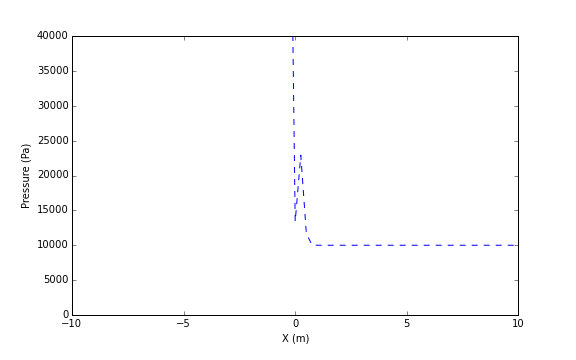
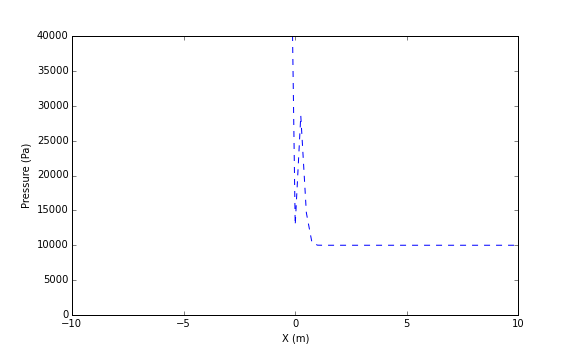
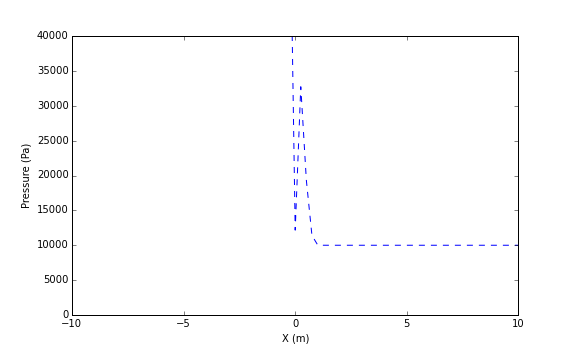
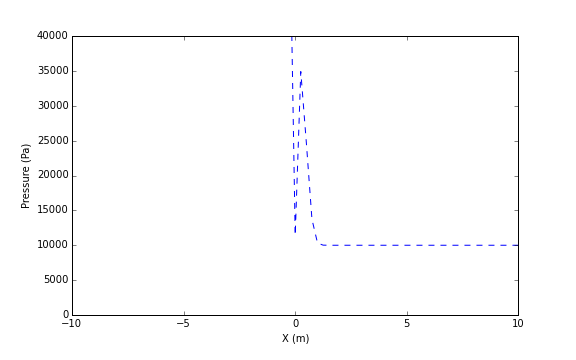
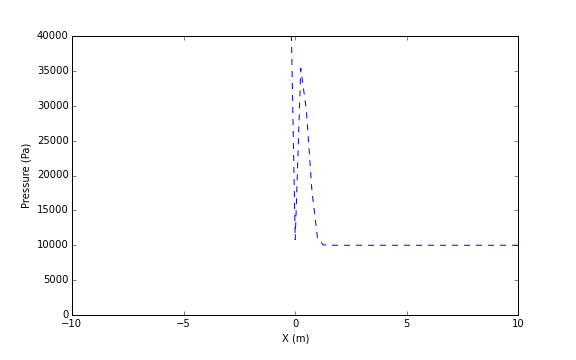
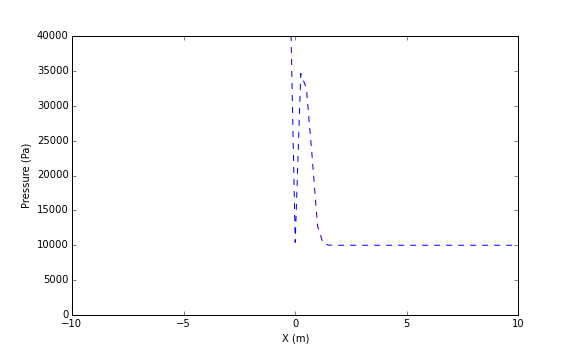
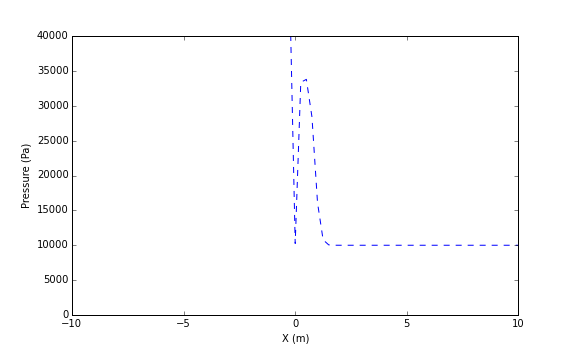
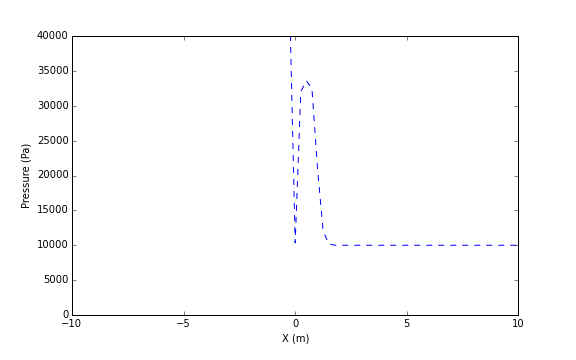
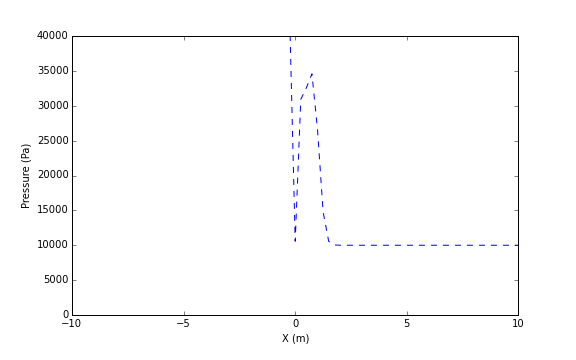
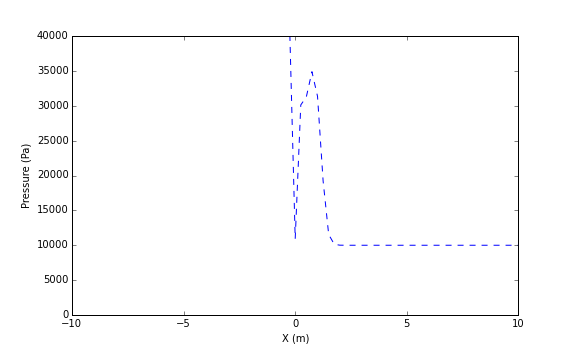
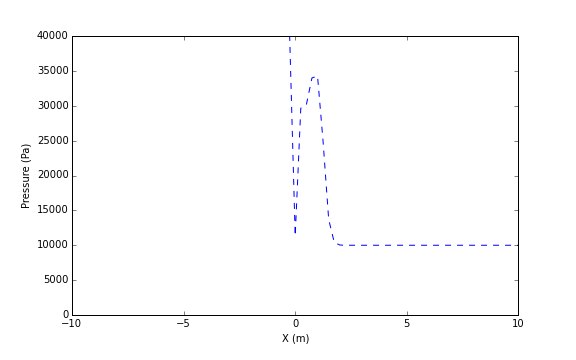
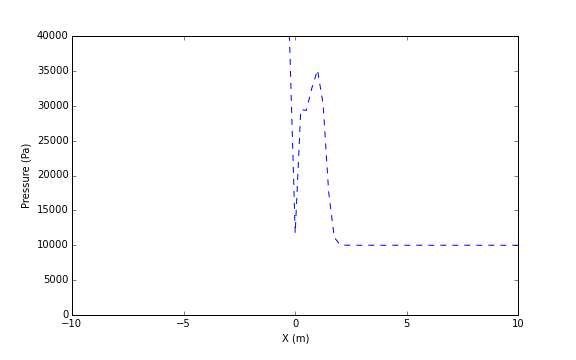
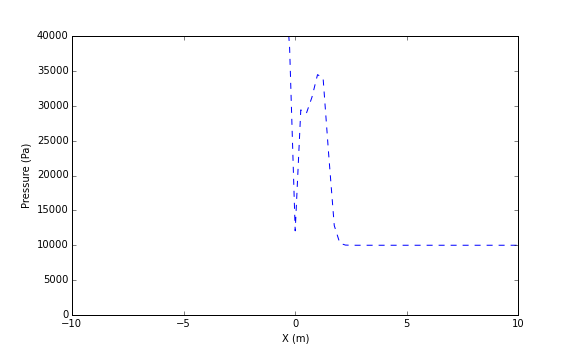
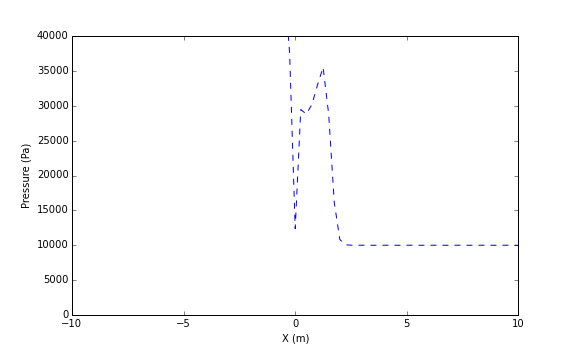
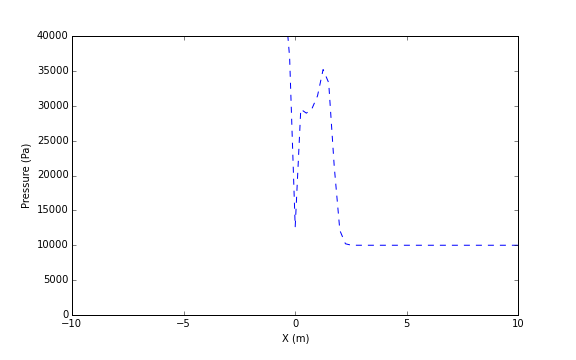
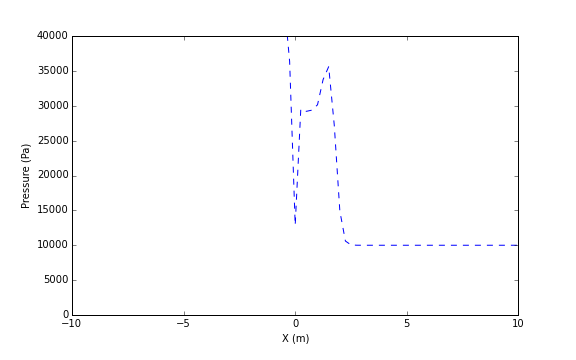
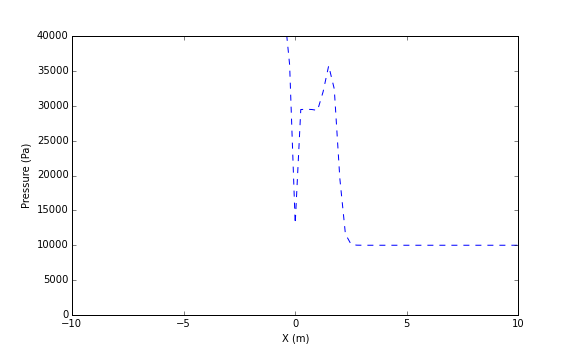
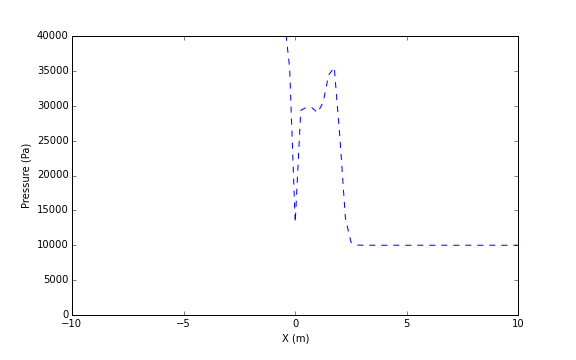
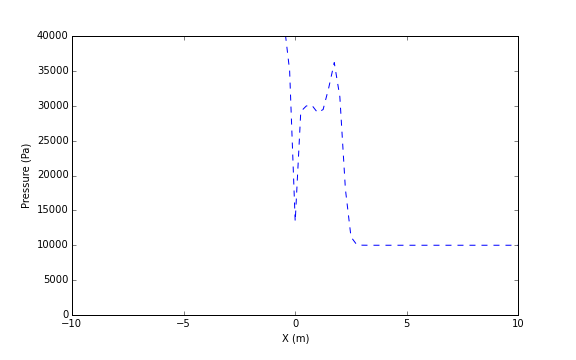
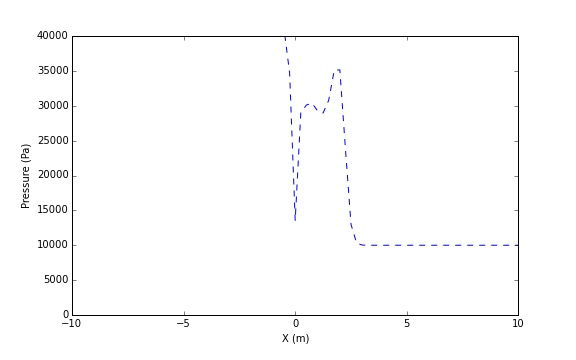
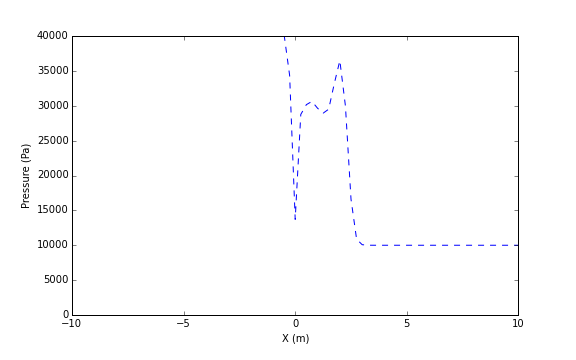
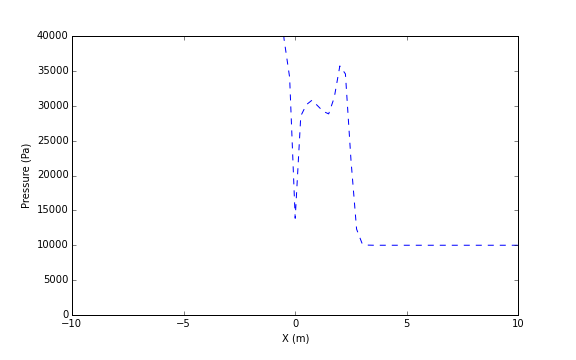
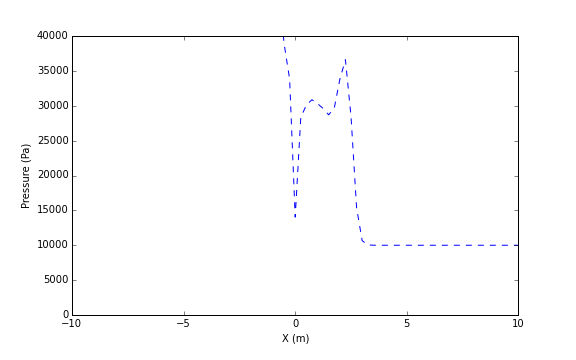
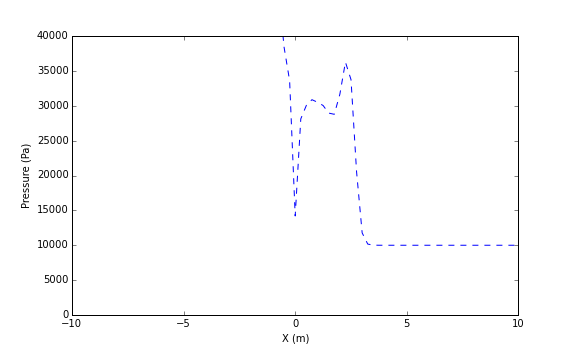
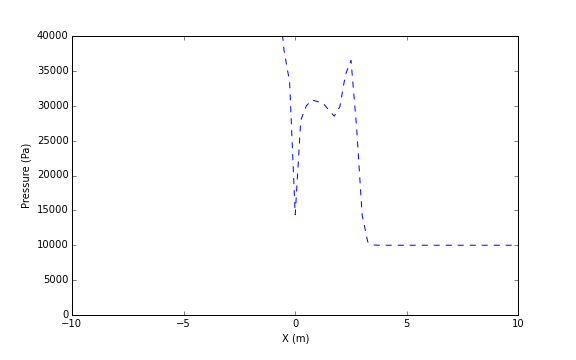
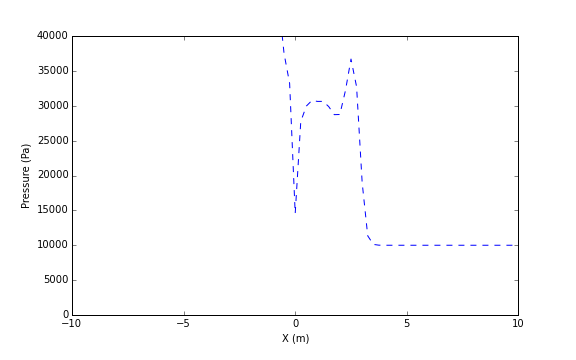
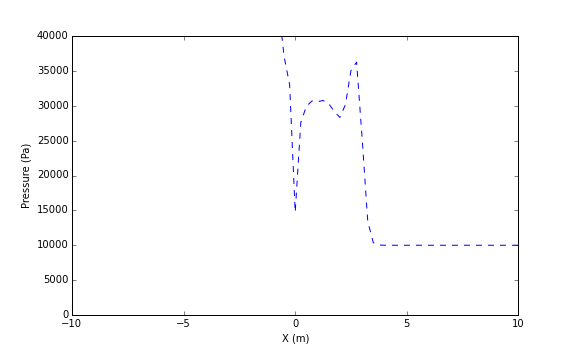
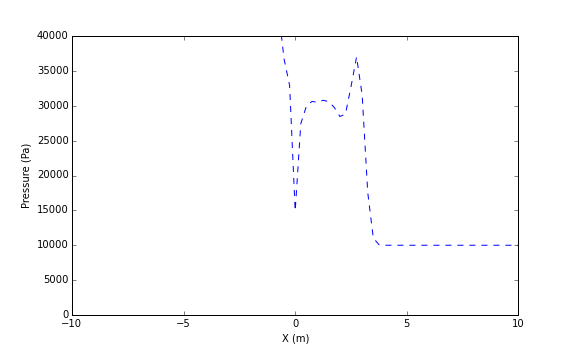
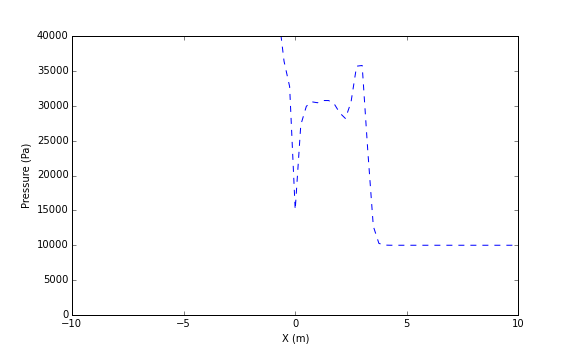
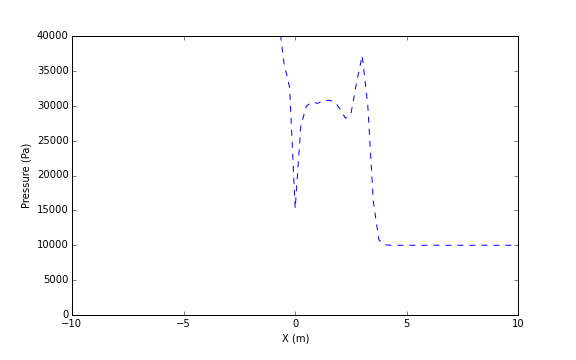
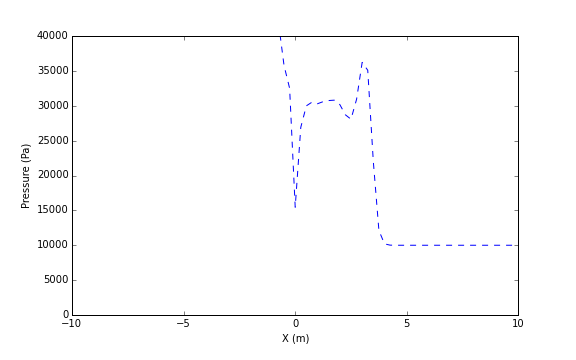
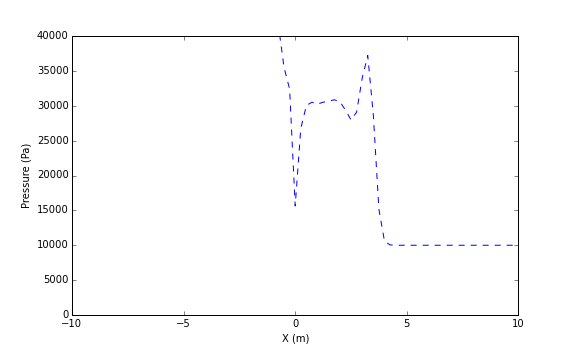
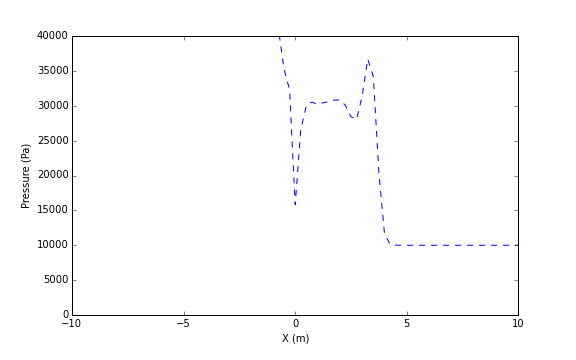
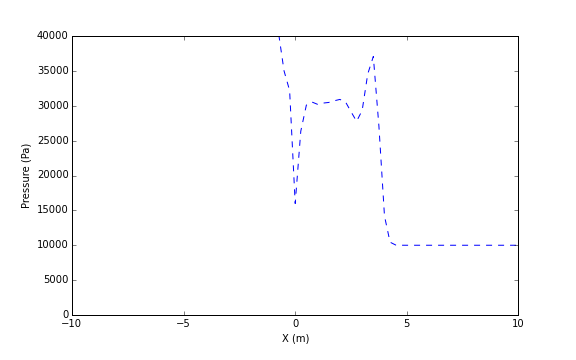
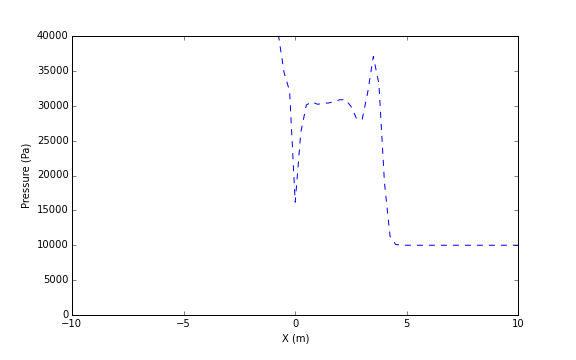
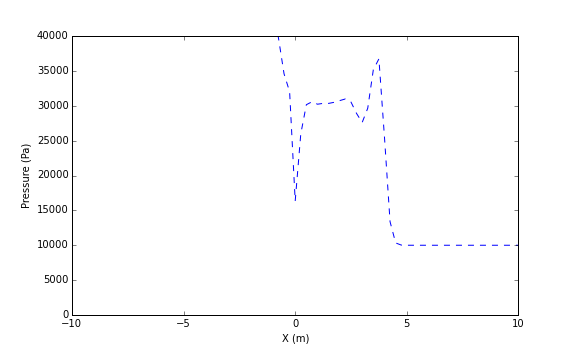
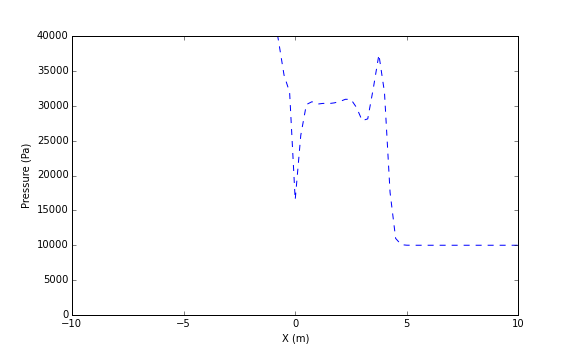
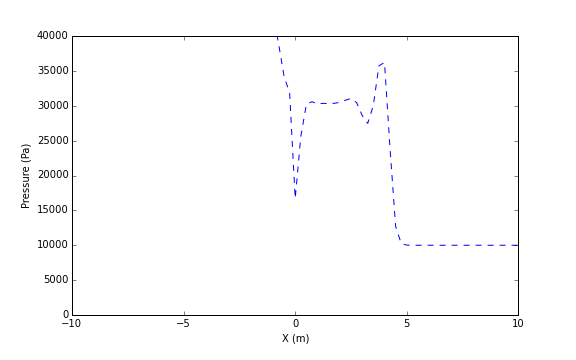
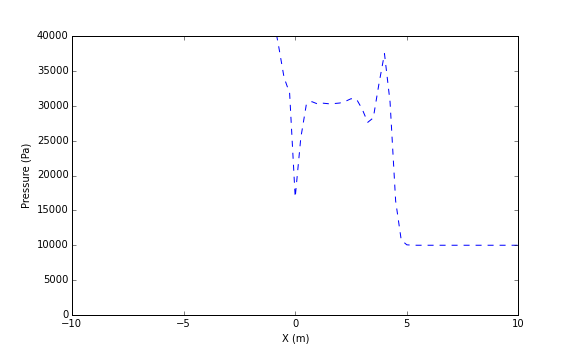
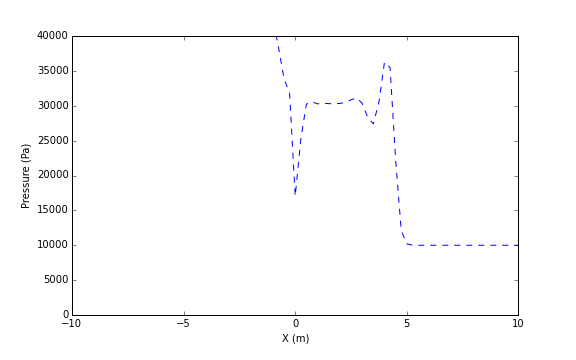
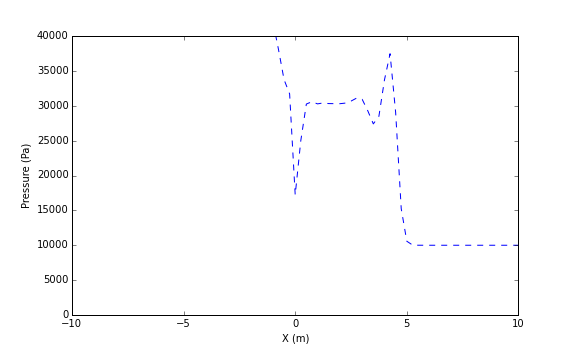
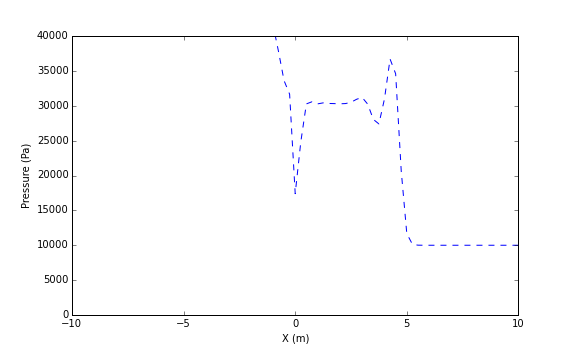
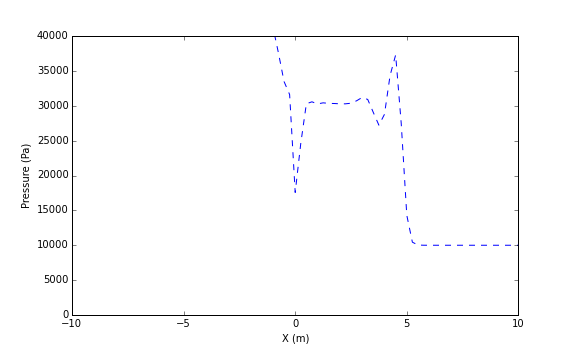
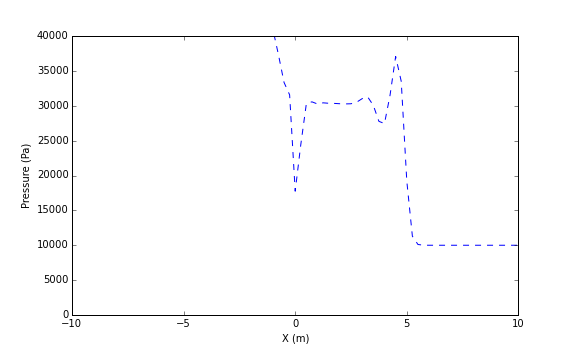
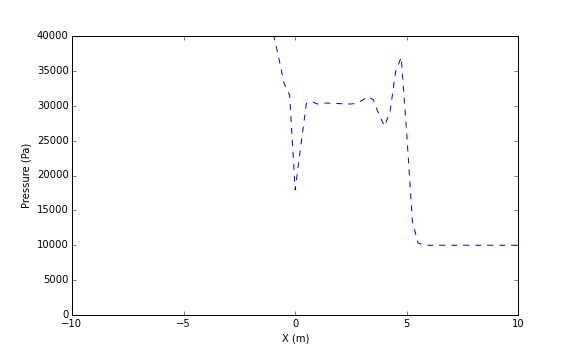
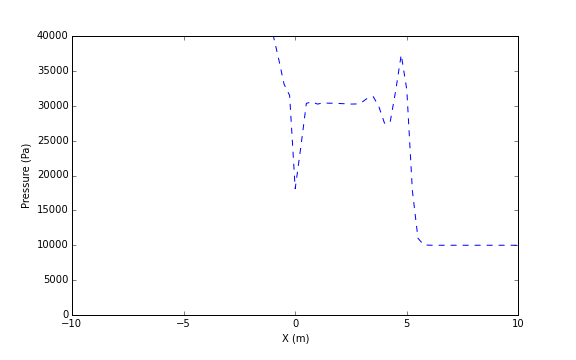
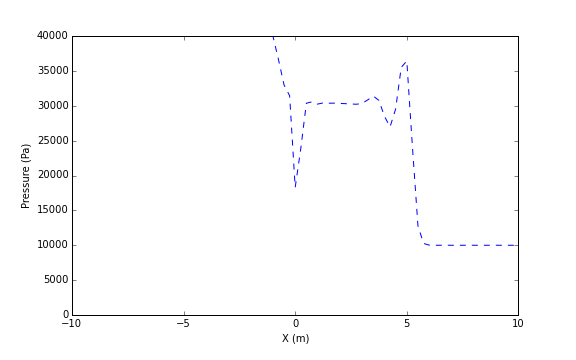

In [42]:
visual(p,(0,40000),"X (m)","Pressure (Pa)")

On voit sur le graphique que des que le choc à lieu on a augmention de de la densité, de la vitesse et de la densité dans la zone de basse pression. Physiquement cela est totalement intuitif, on tend a retourné vers l'équilibre thermodynamique ce qui implique l'équilibre mécanique et ainsi que la pression soit la même en tout point du tube.  Regardons un peu le lien entre les différentes variables. On voit que les différentes variables se progage à la même vistesse dans le tube. Ce qui peut être expliqué par le fait que les trois varibles sont décrites par la même équation.
Un autre point interessant est de voir que la pression a gauche dinimue. Cela est du aux ondes d'expension du au choc qui sont de pression infféreiur à la pression initiales à gauche. 

Nous travaillons sur un intervale de temps très restreint, regardons un peus si on travail sur une interval trois fois plus grand.


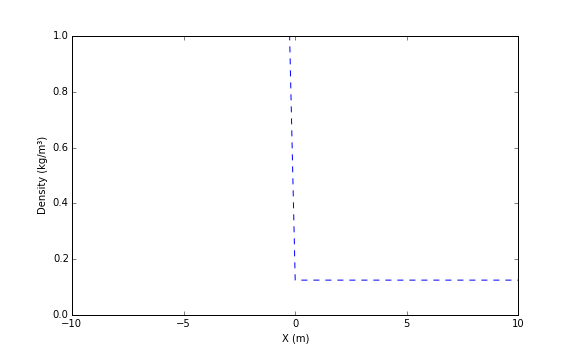
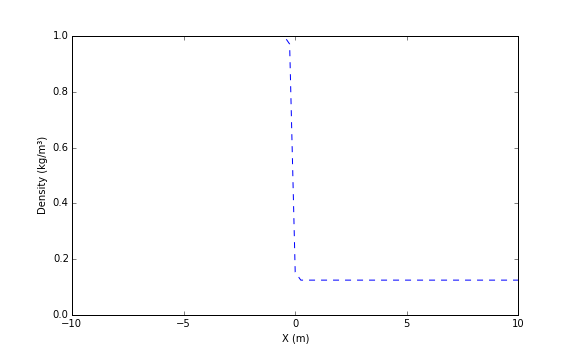
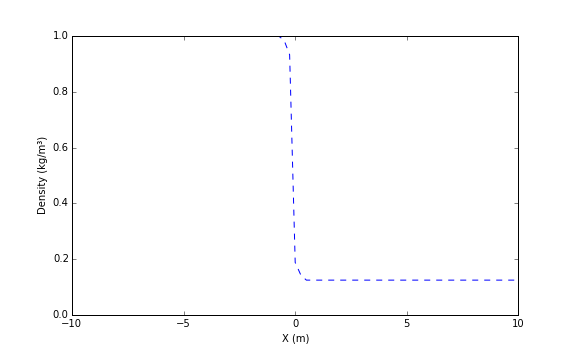
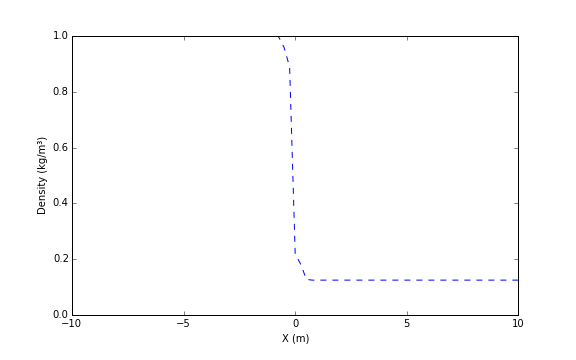
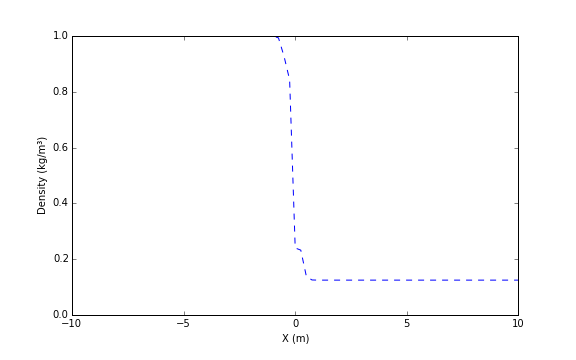
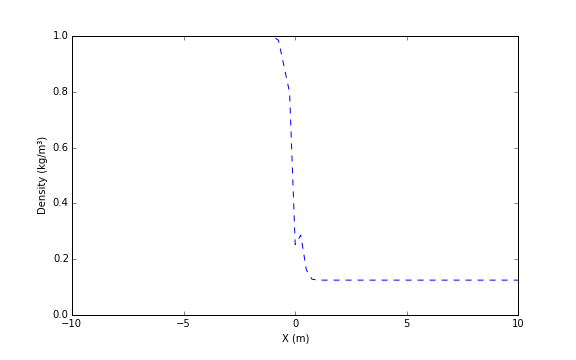
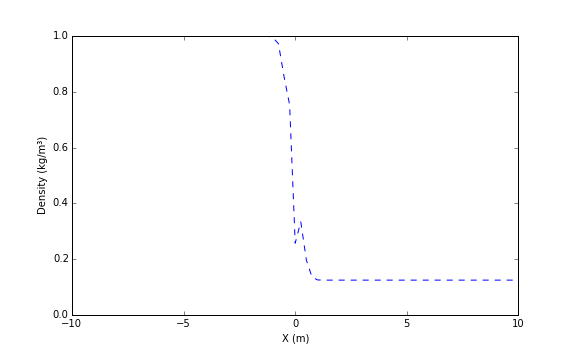
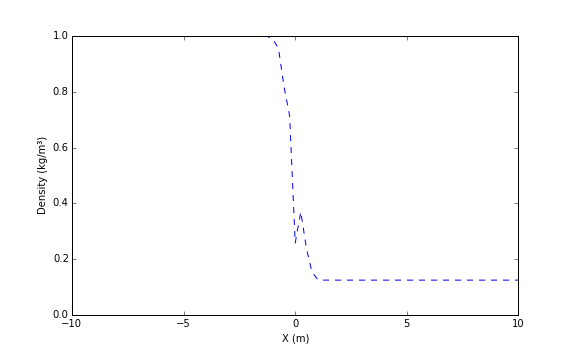
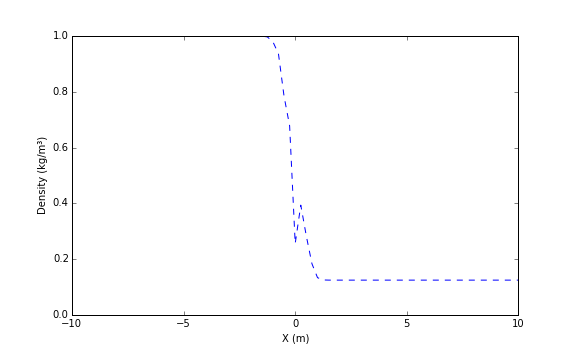
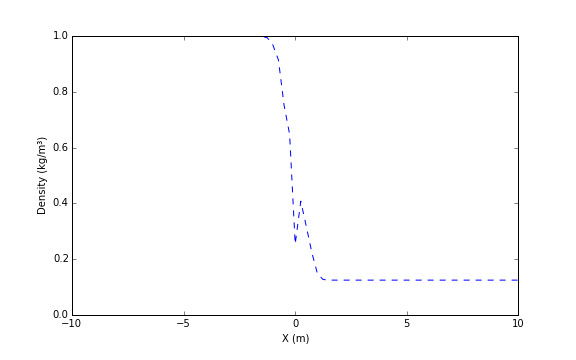
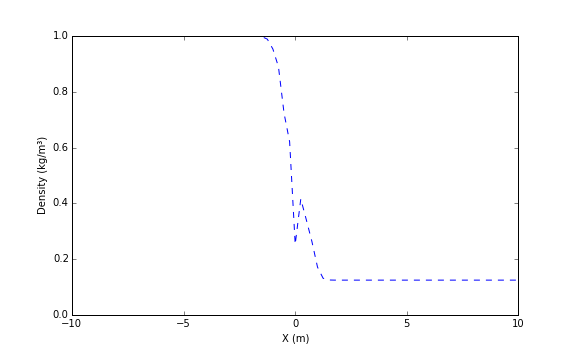
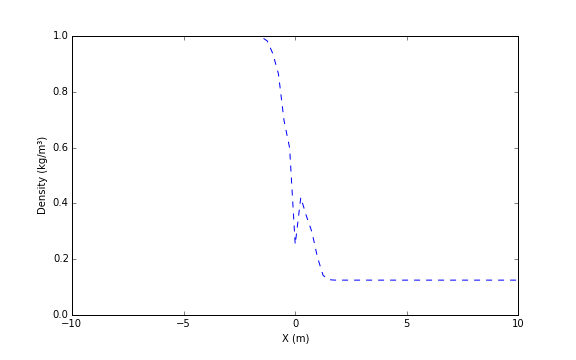
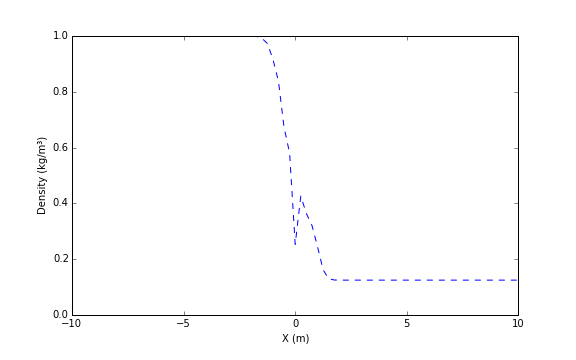
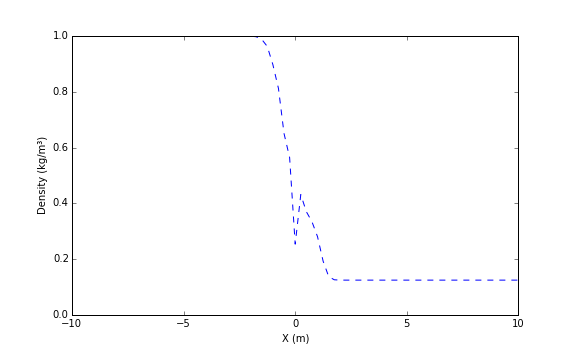
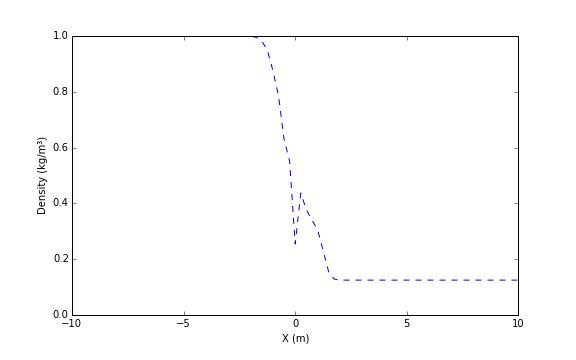
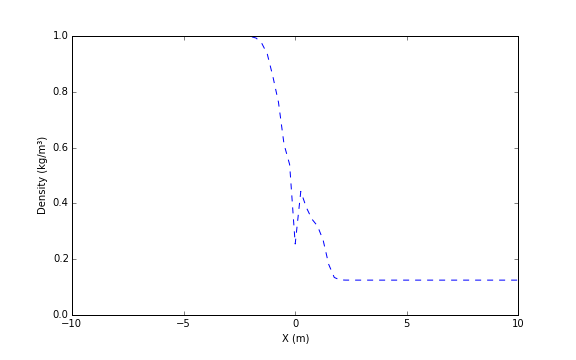
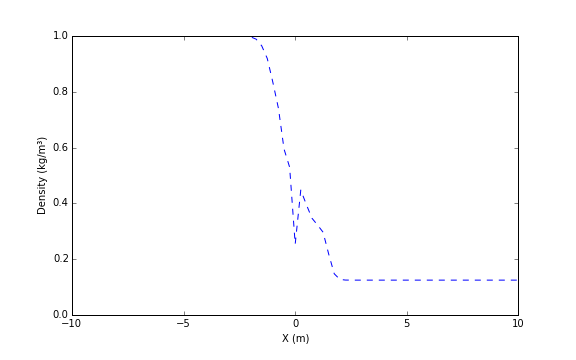
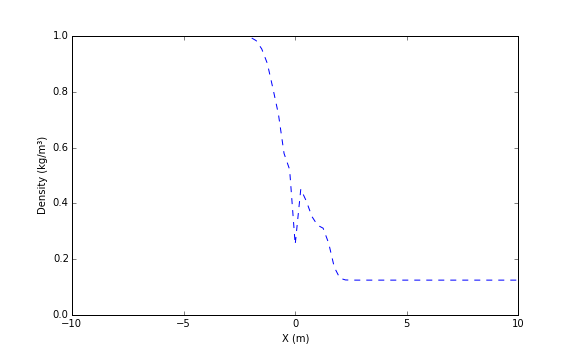
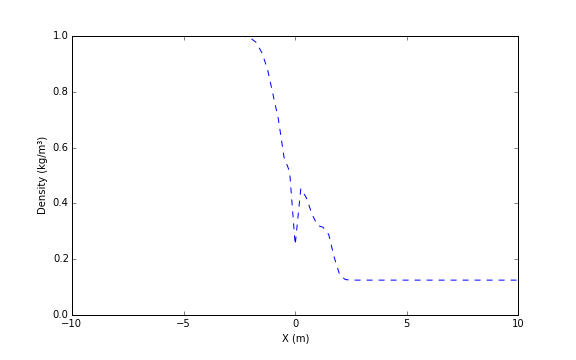
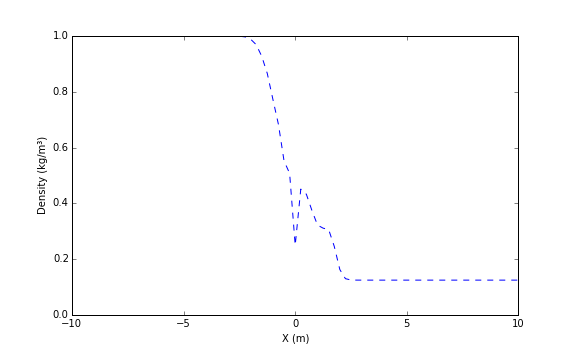
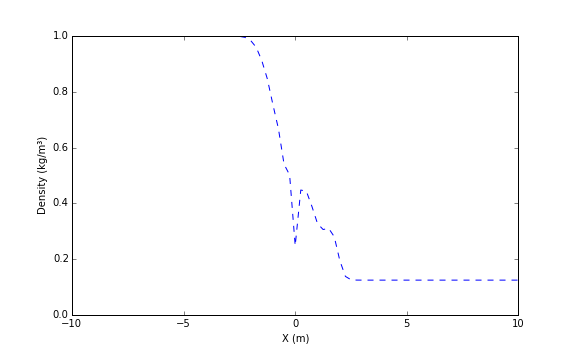
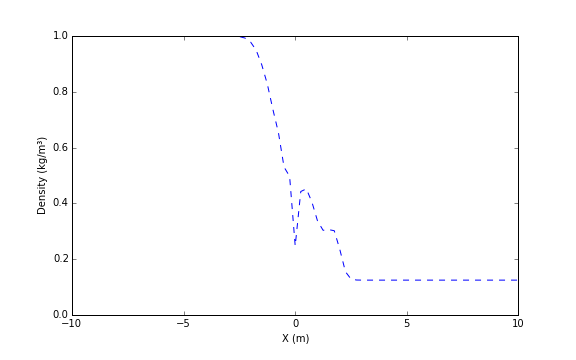
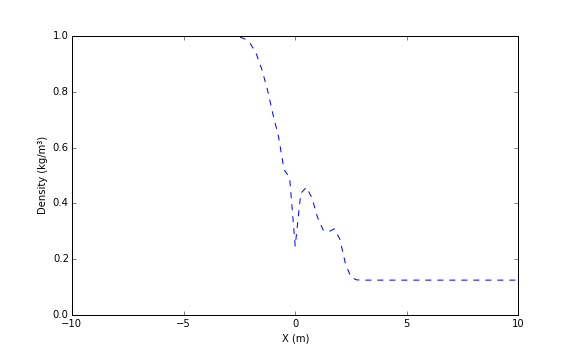
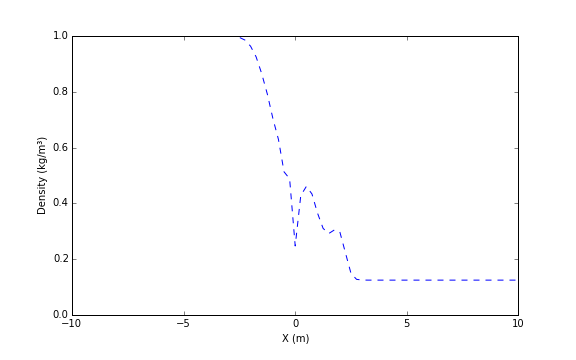
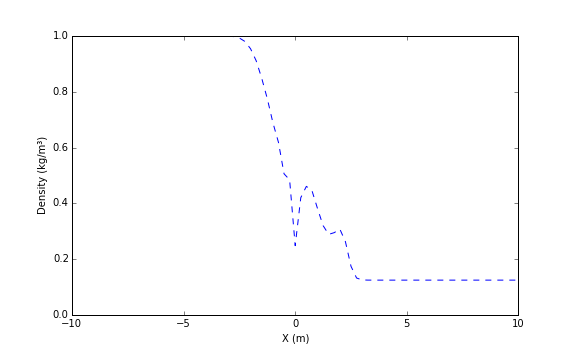
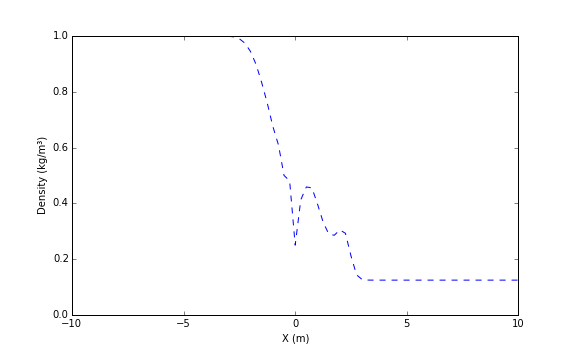
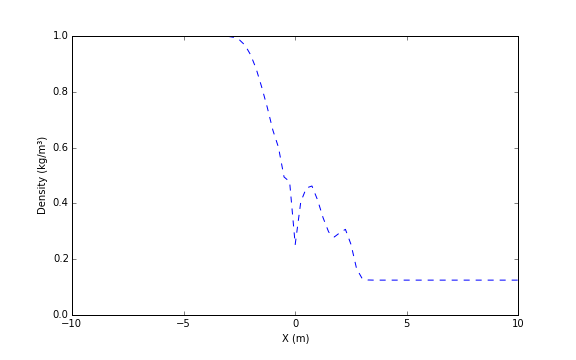
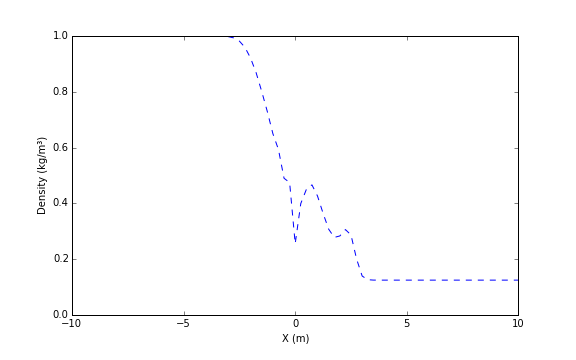
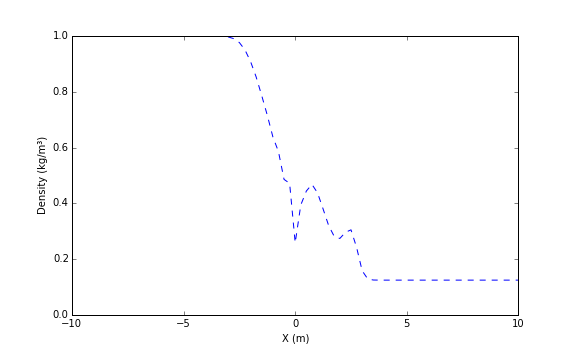
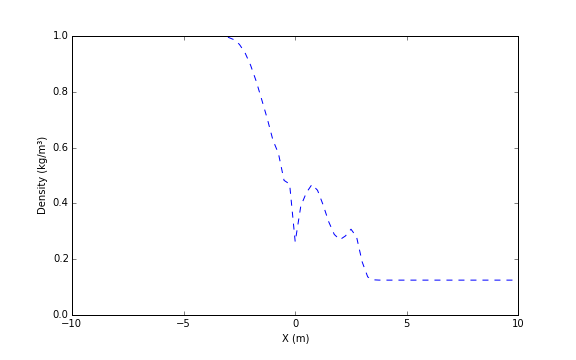
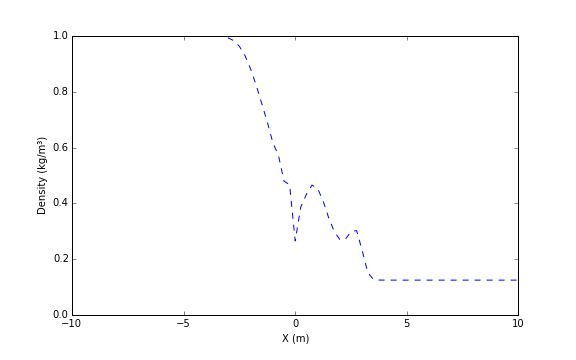
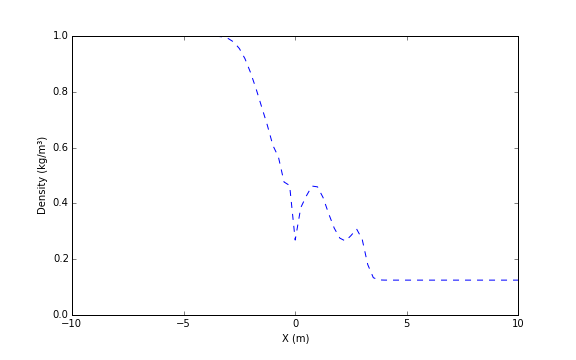
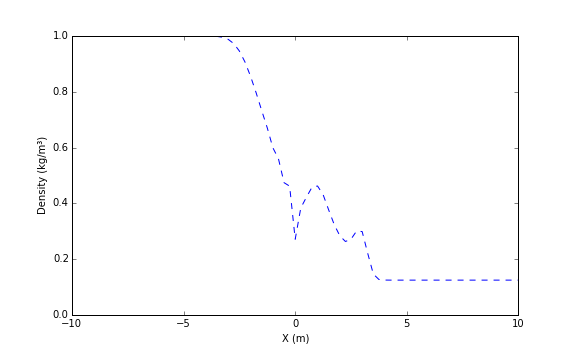
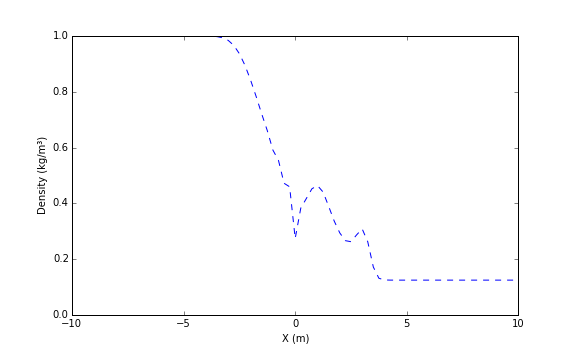
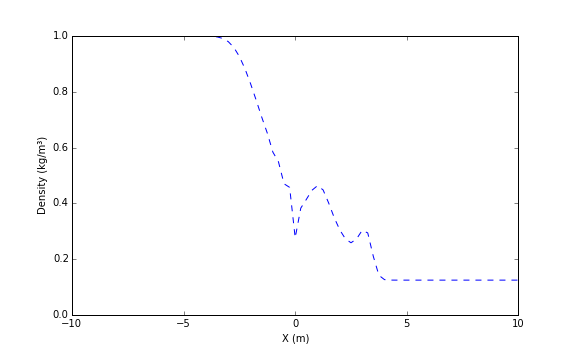
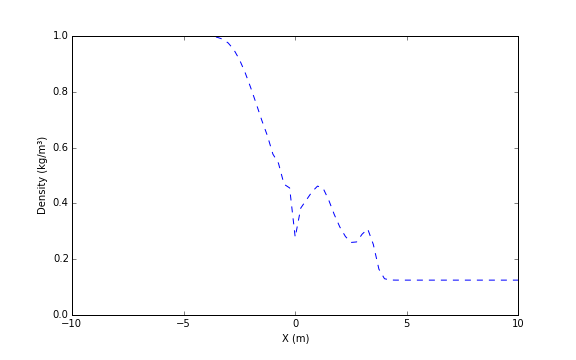
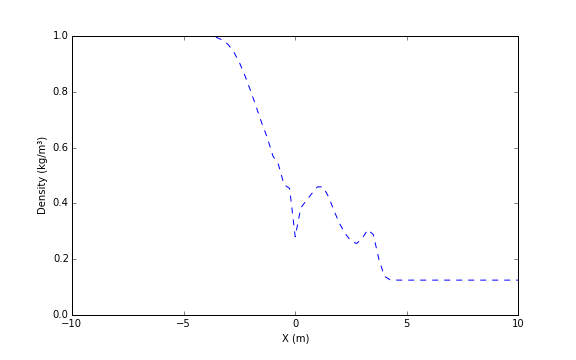
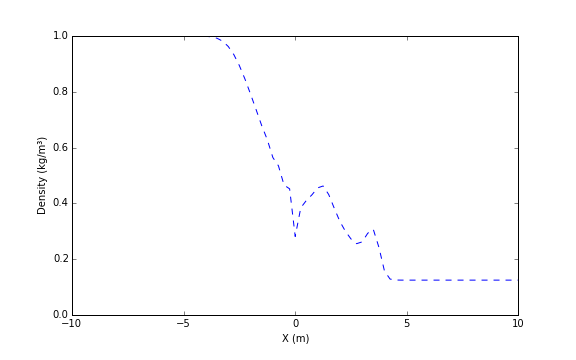
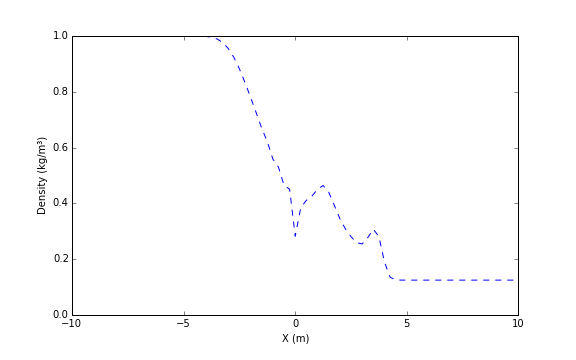
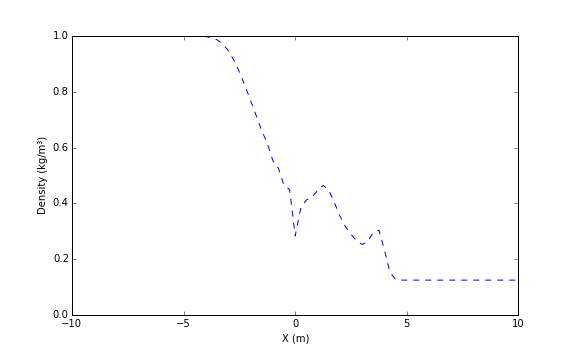
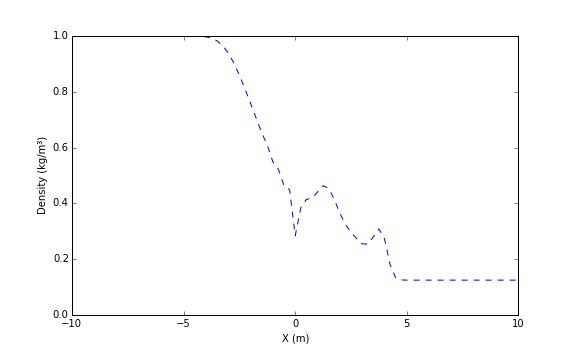
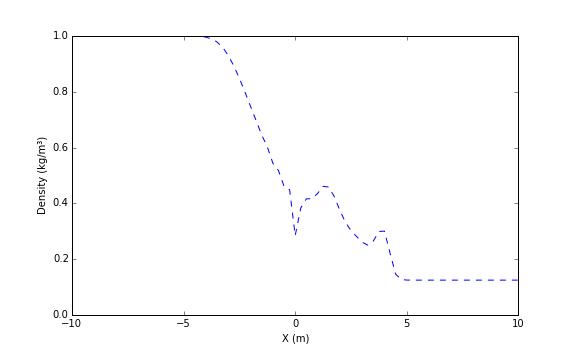
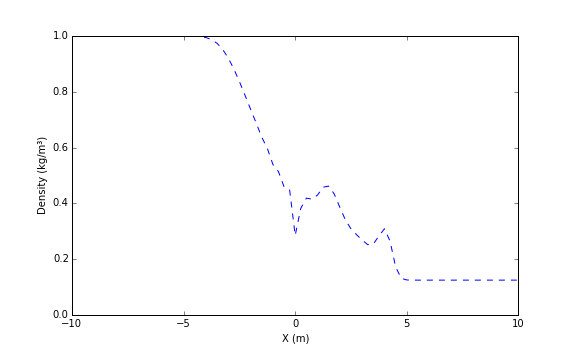
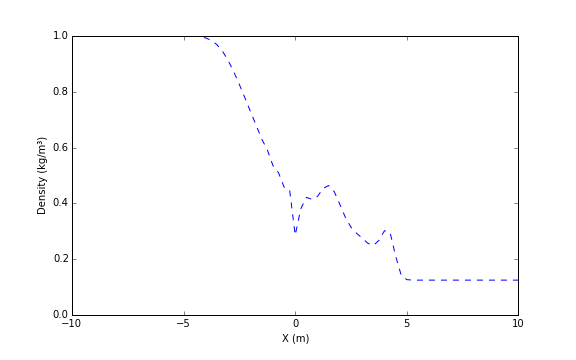
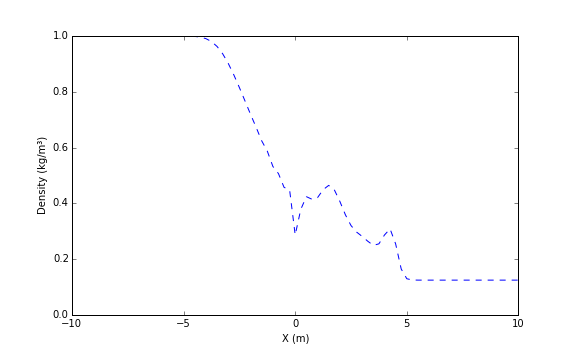
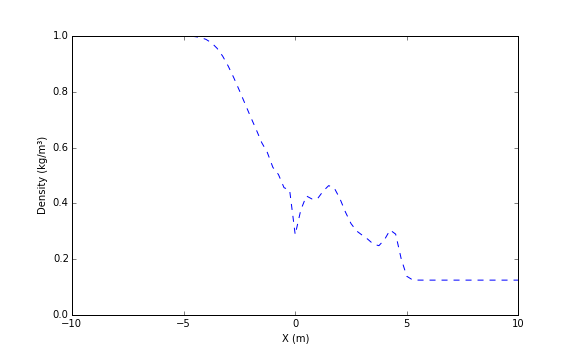
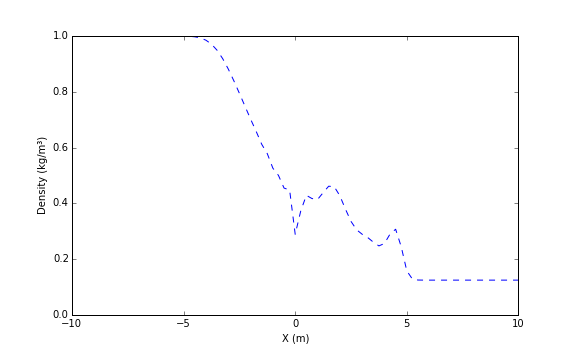
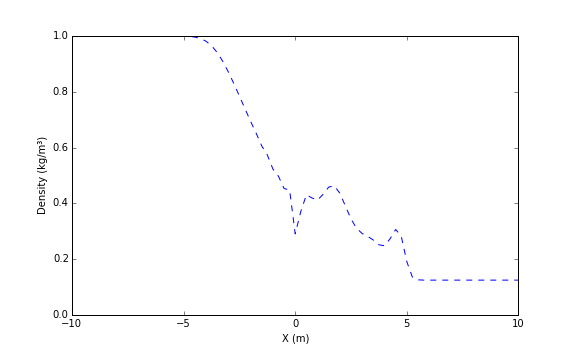
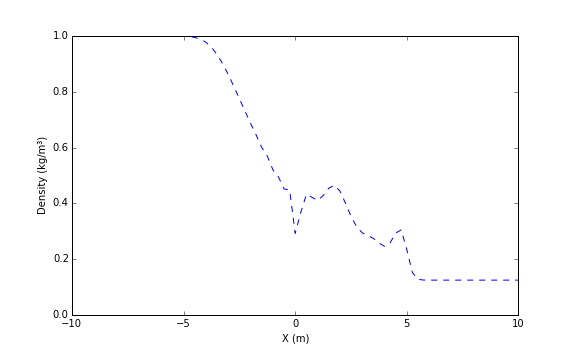
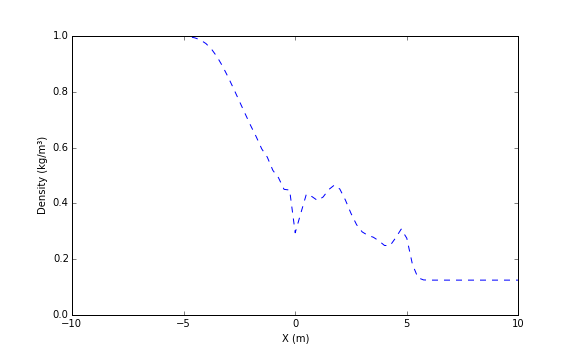
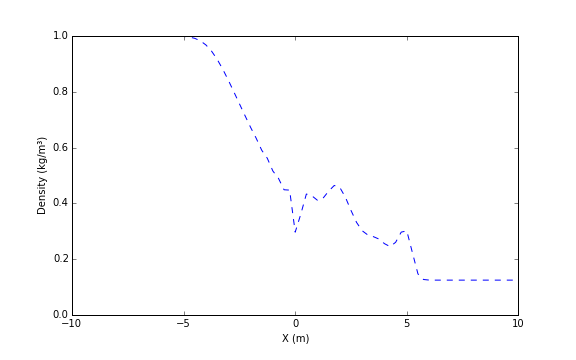
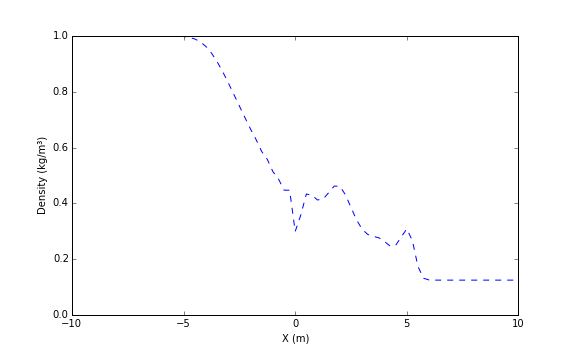
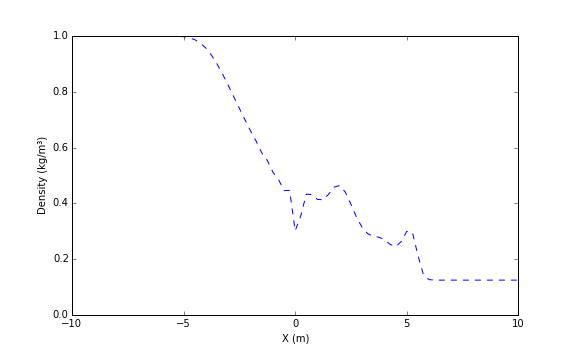
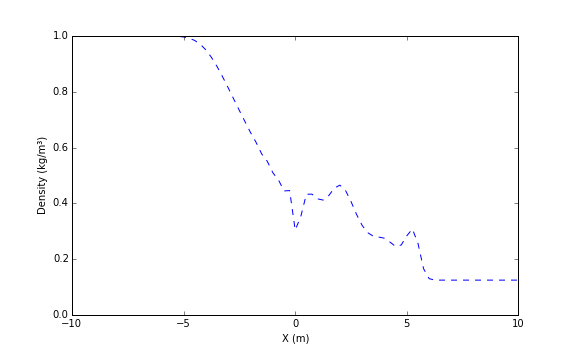
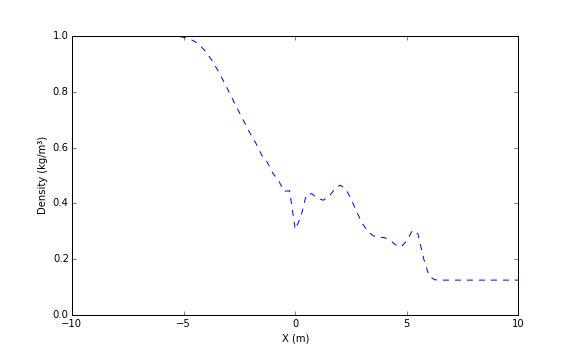
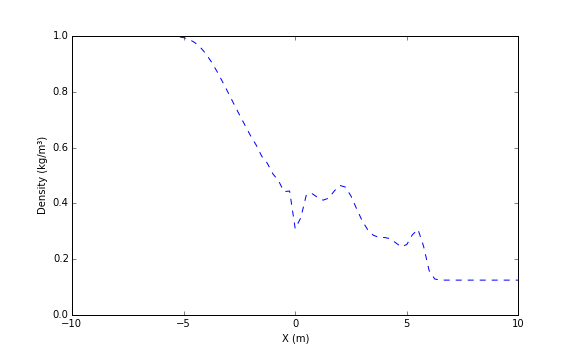
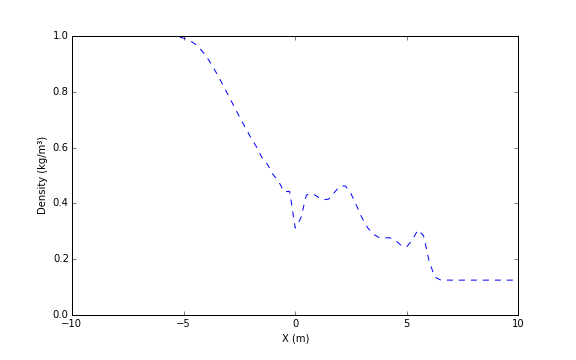
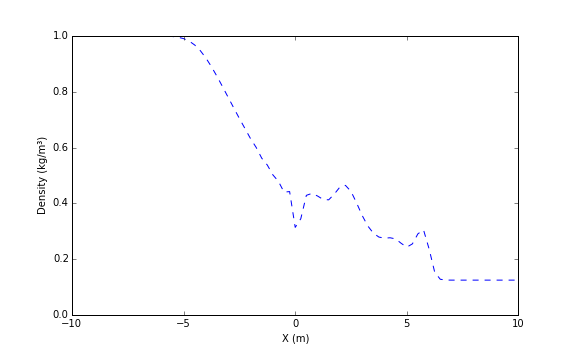
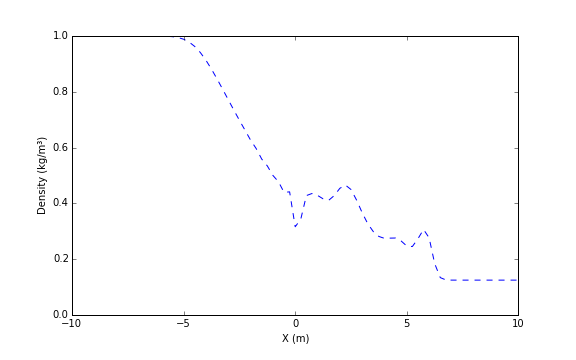
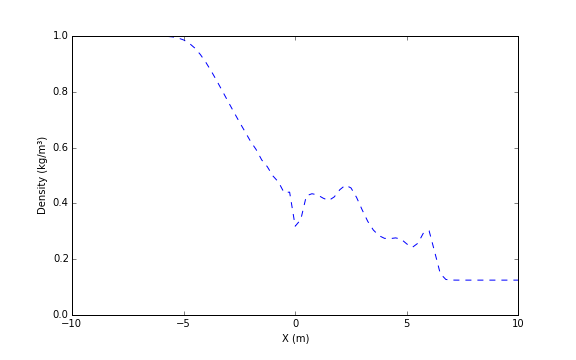
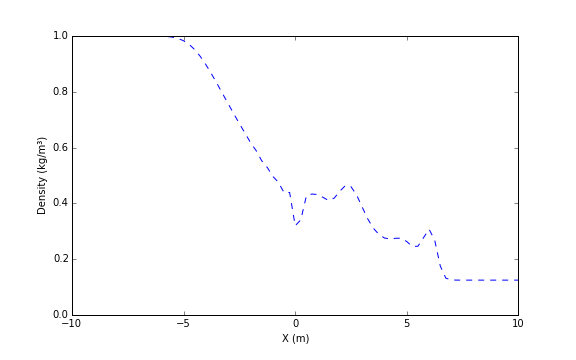
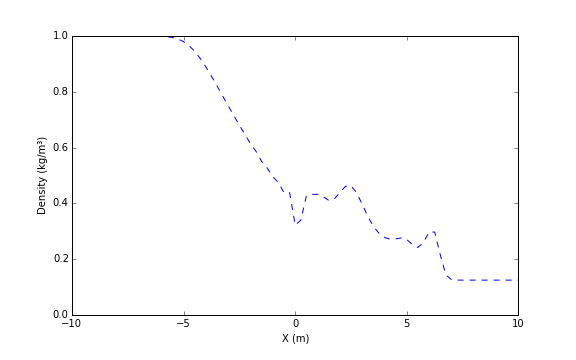
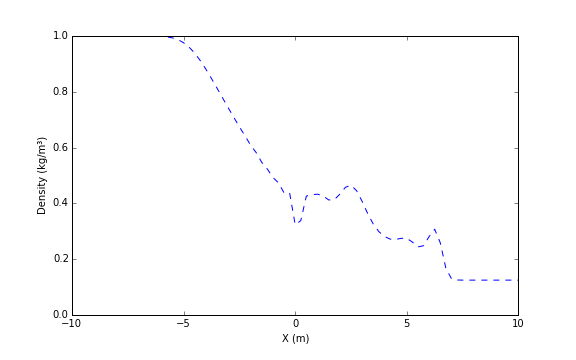
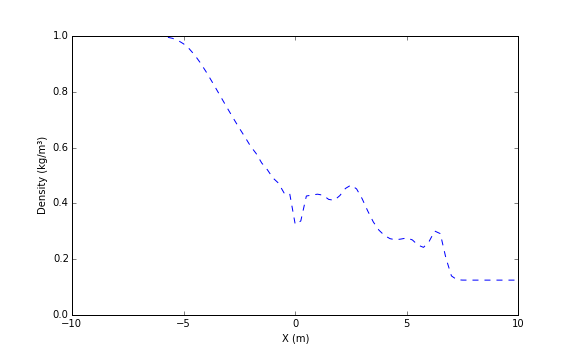
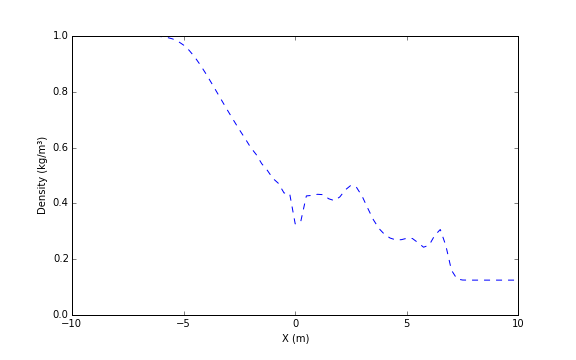
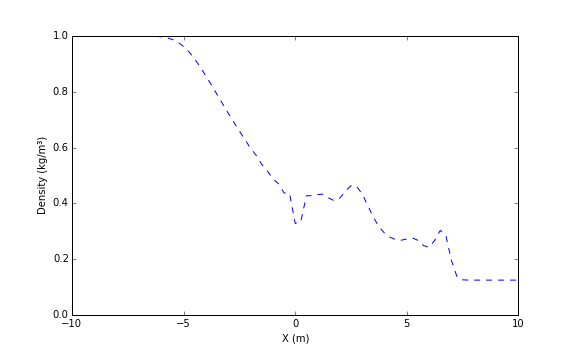
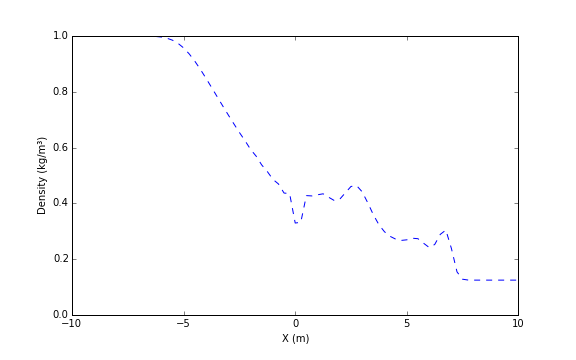
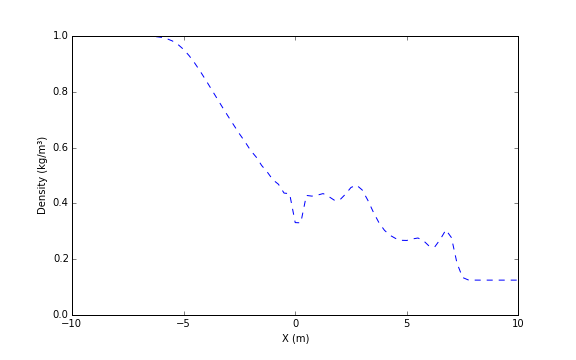
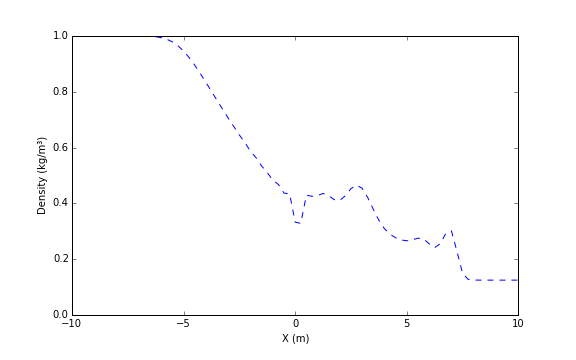
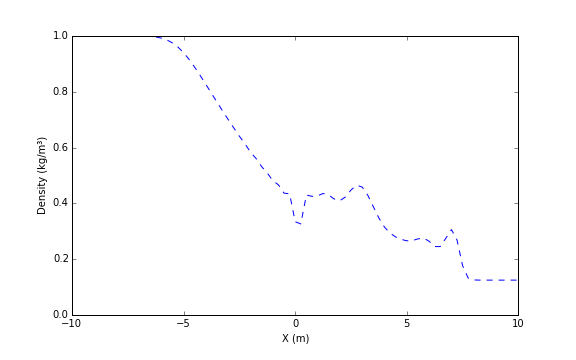
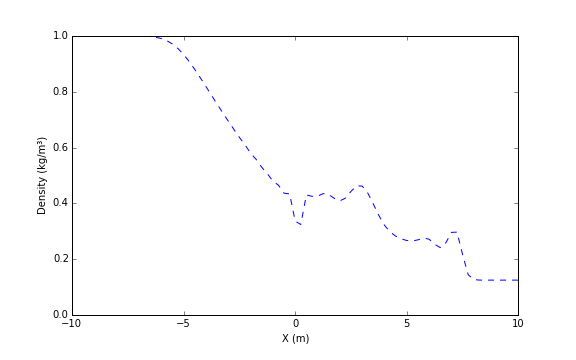
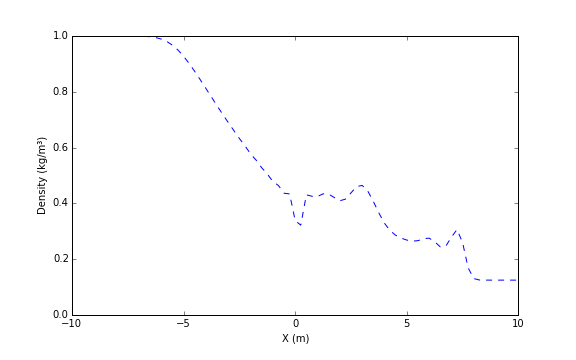
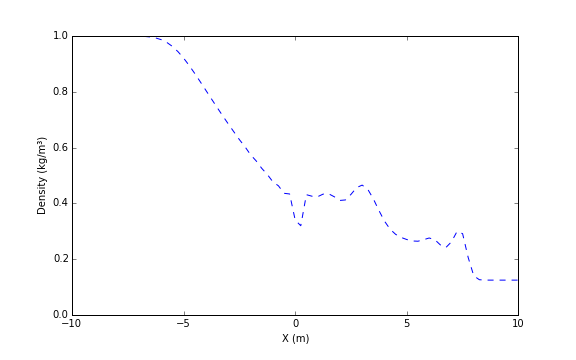
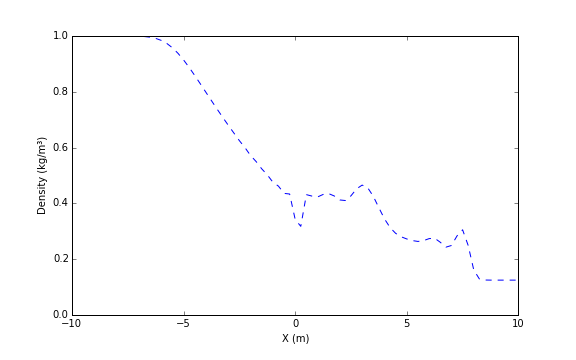
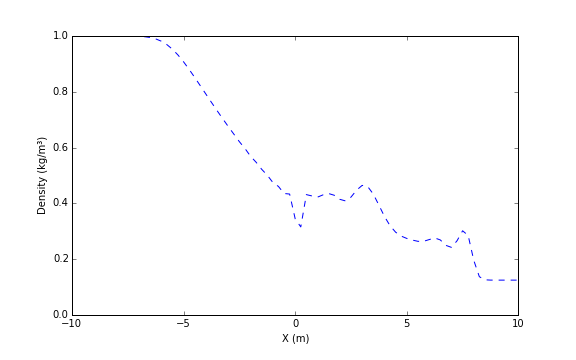
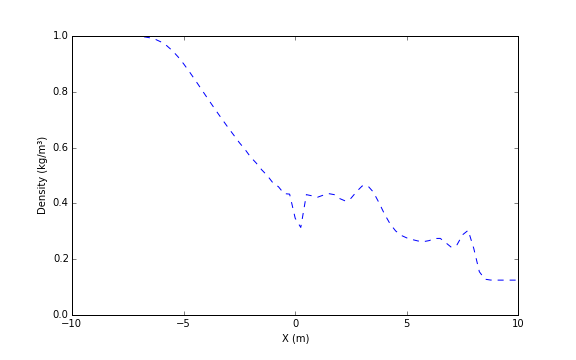
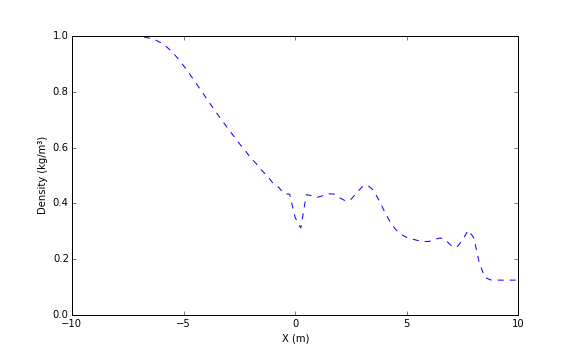
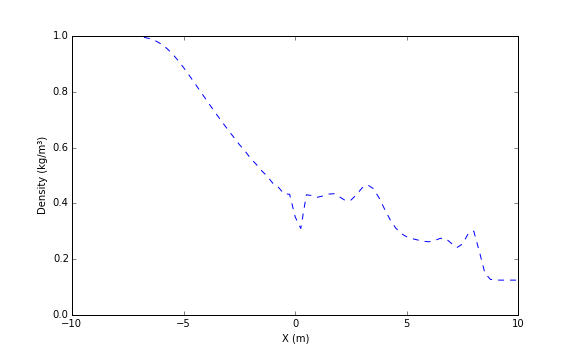
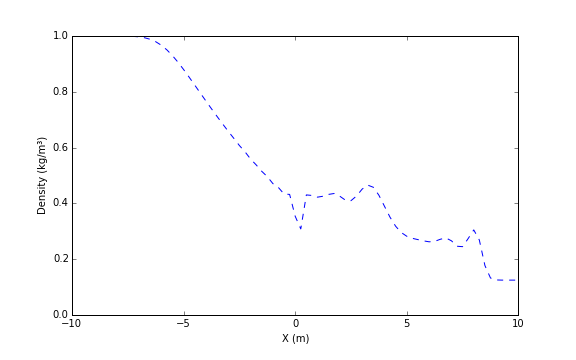
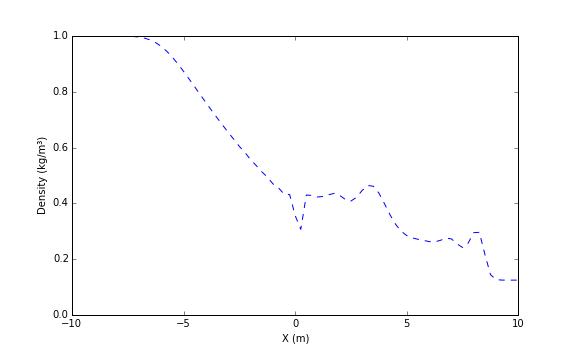
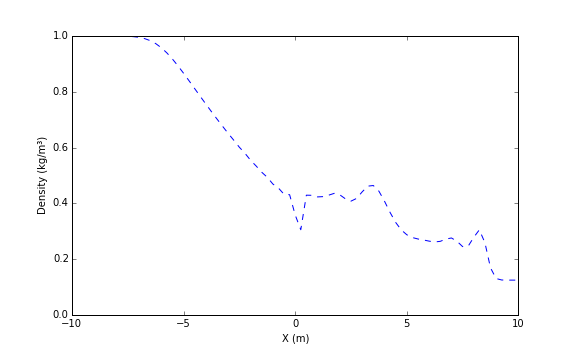
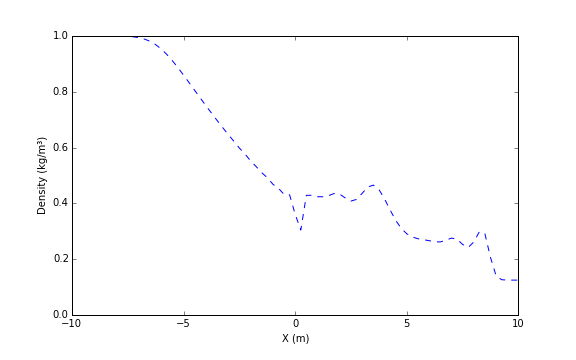
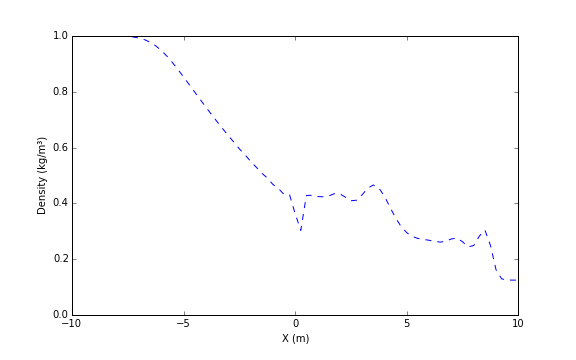
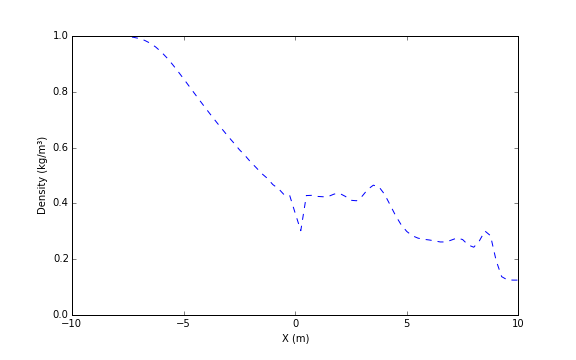
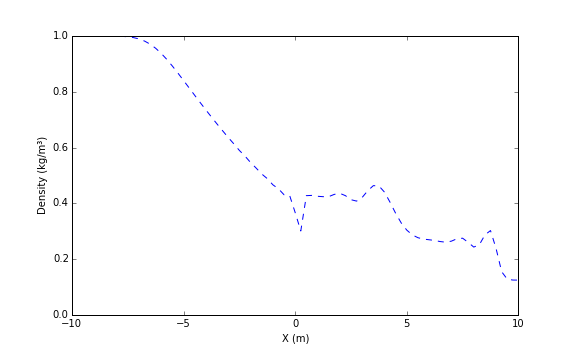
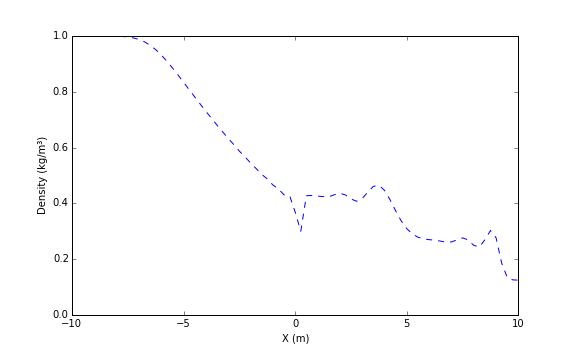
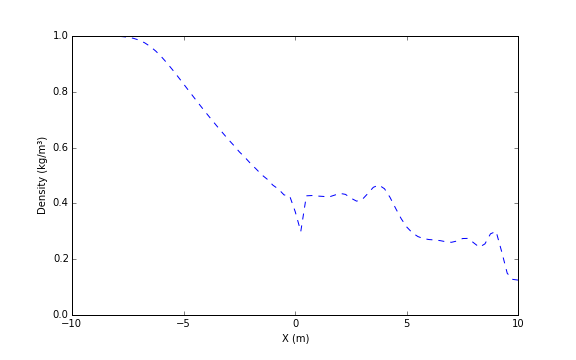
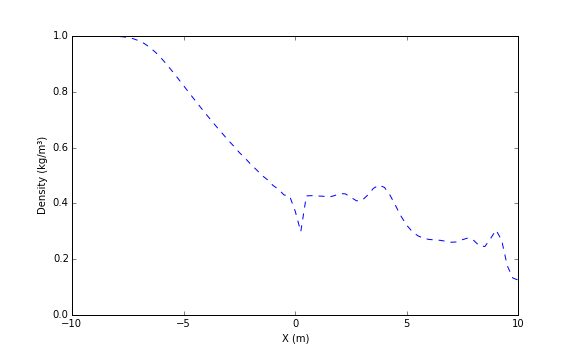
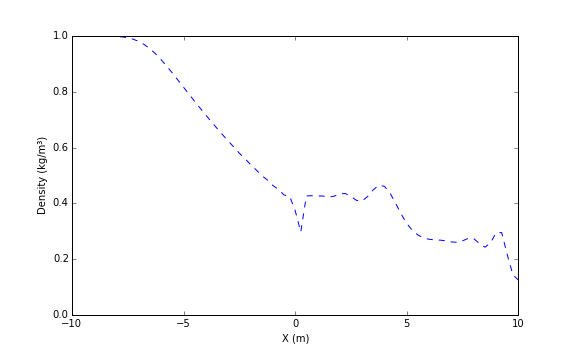
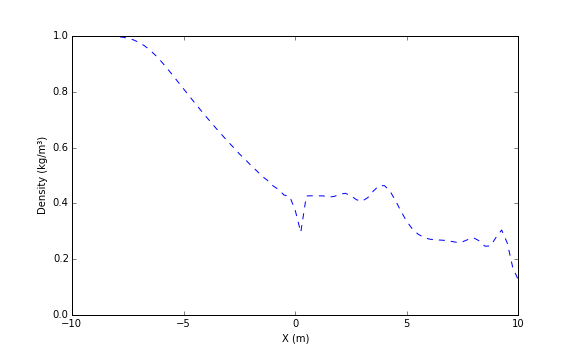
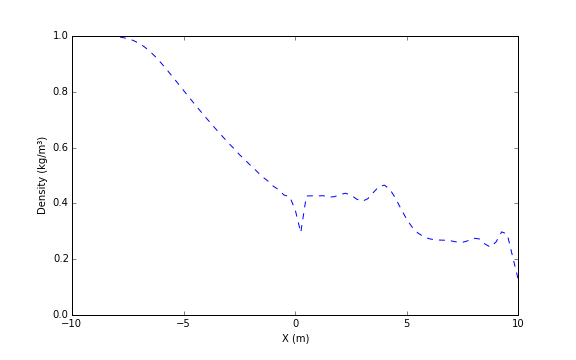
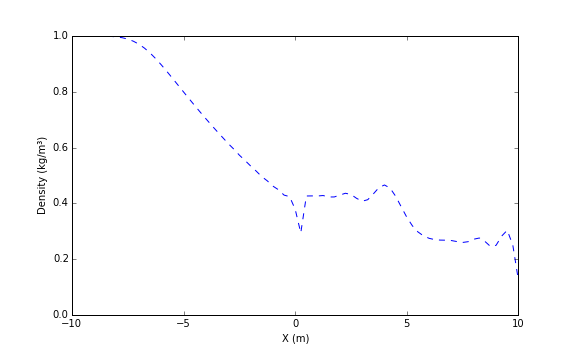
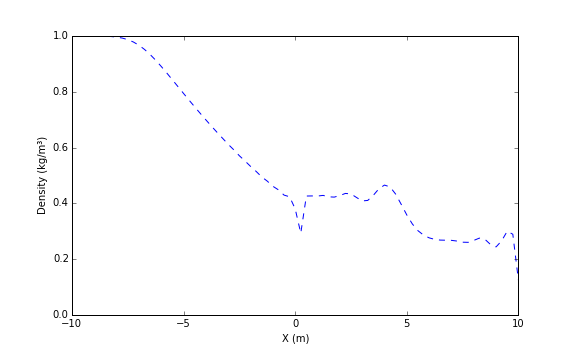
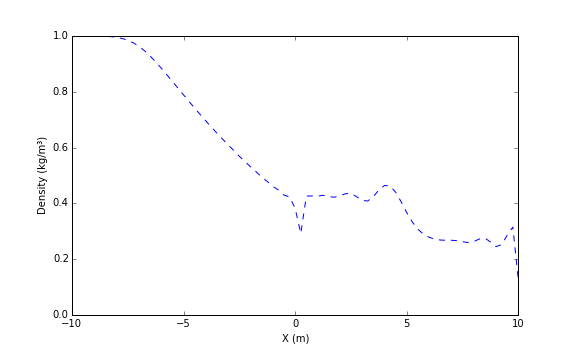
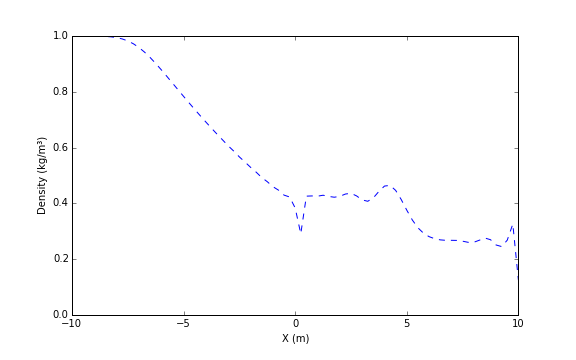
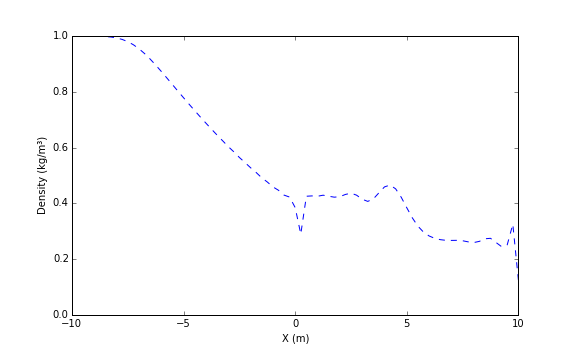
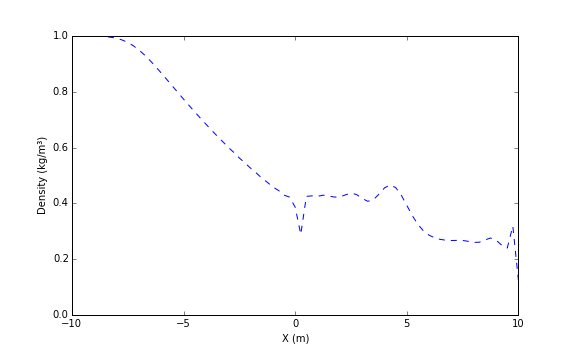
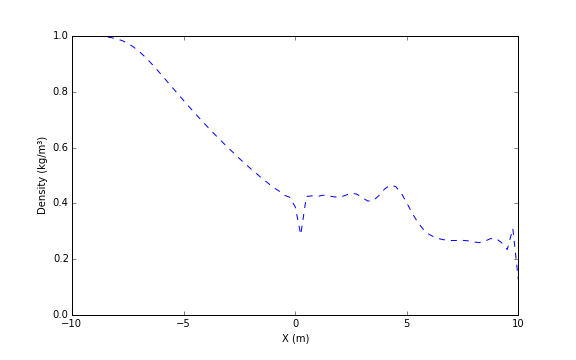
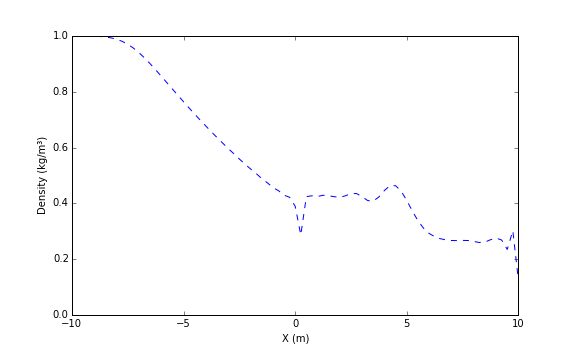
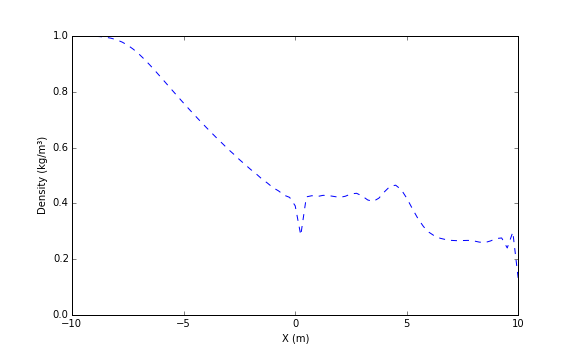
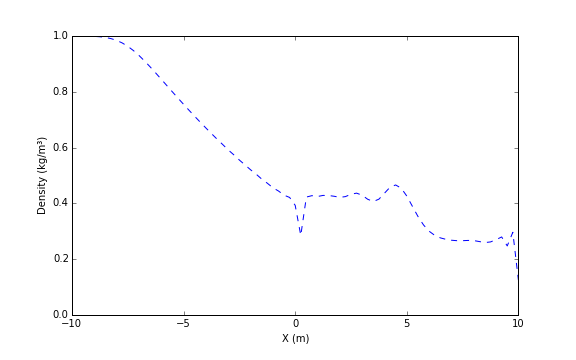
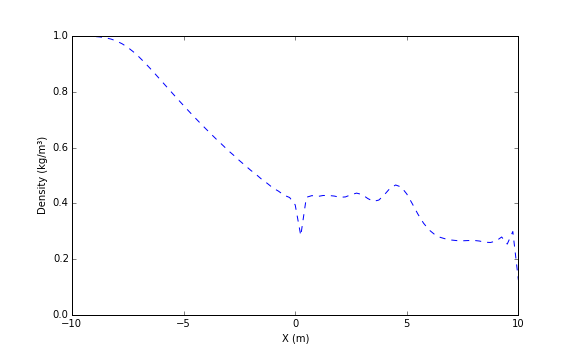
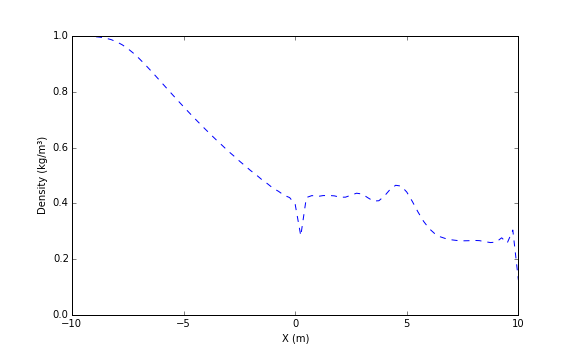
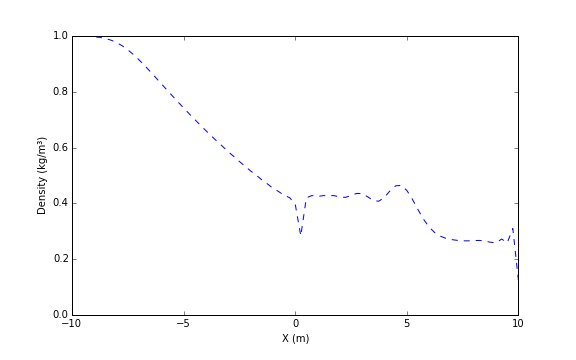
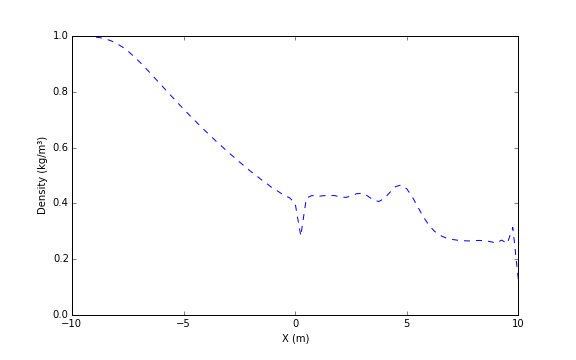
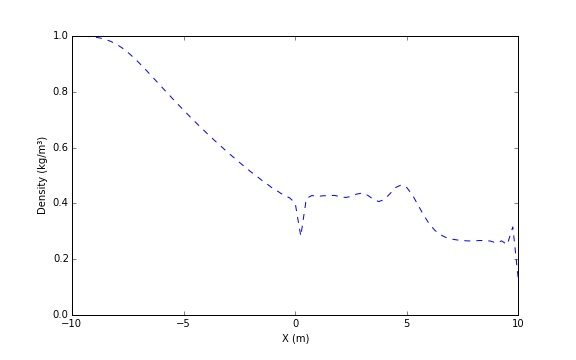
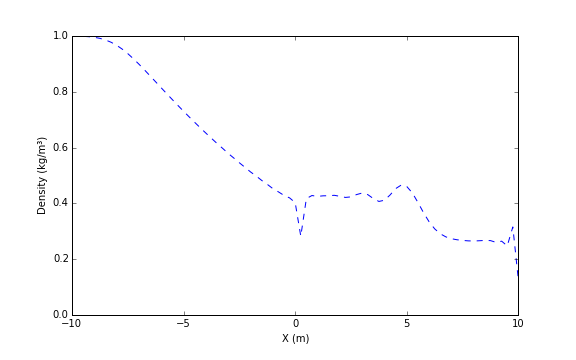
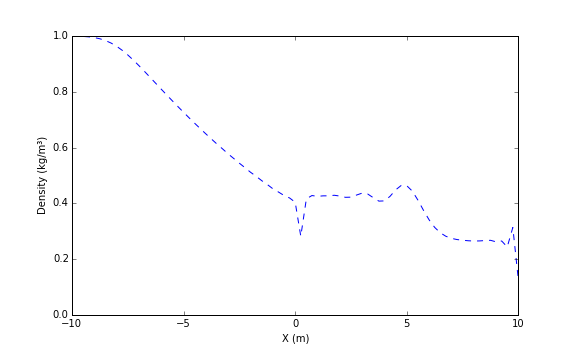
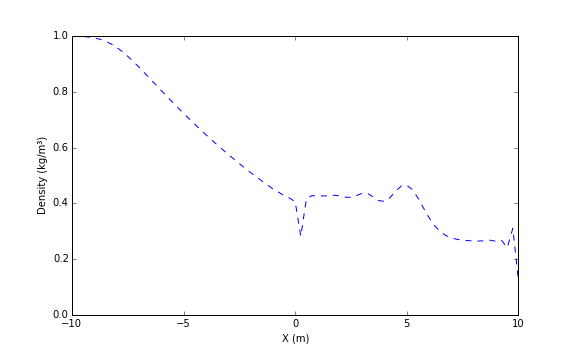
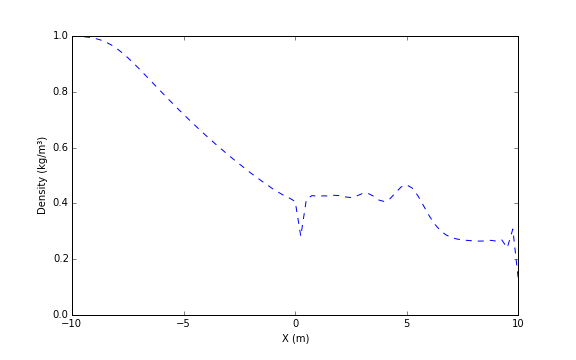
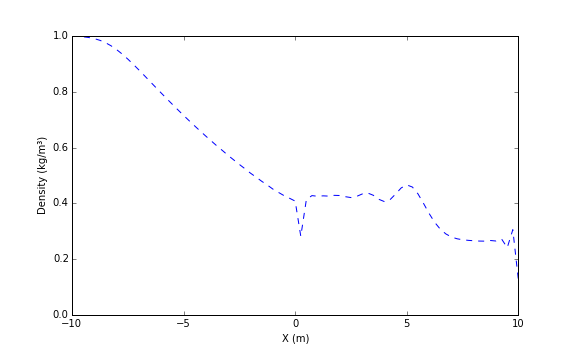
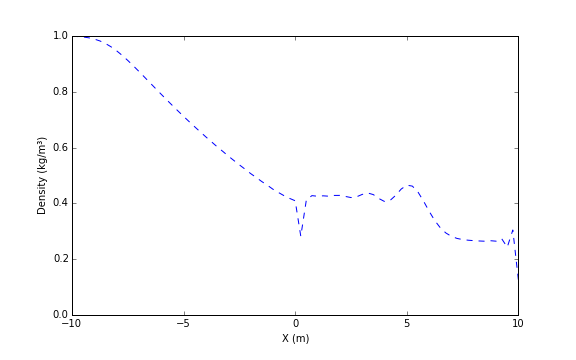
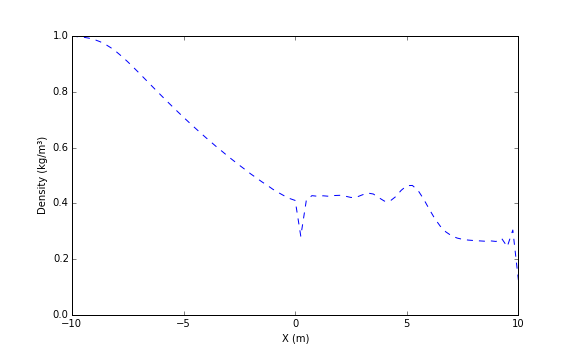
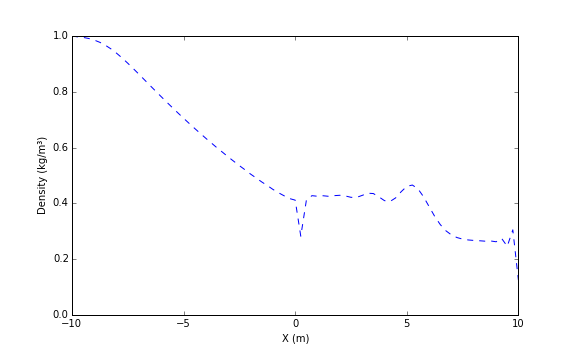
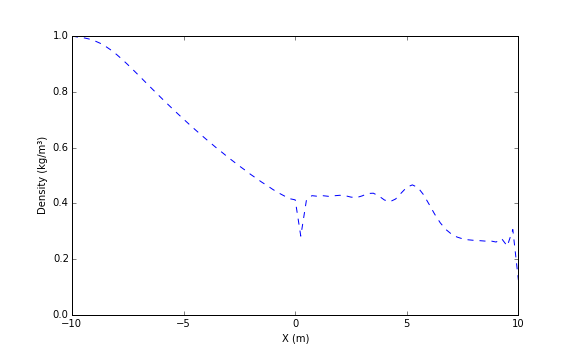
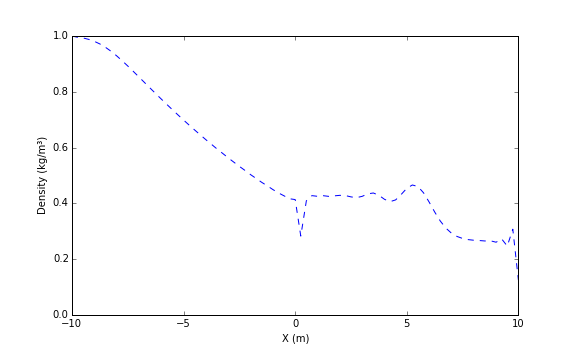
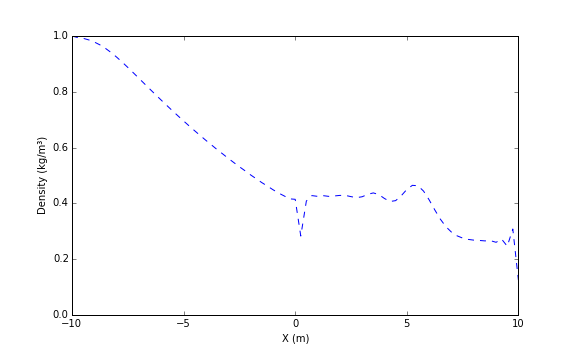
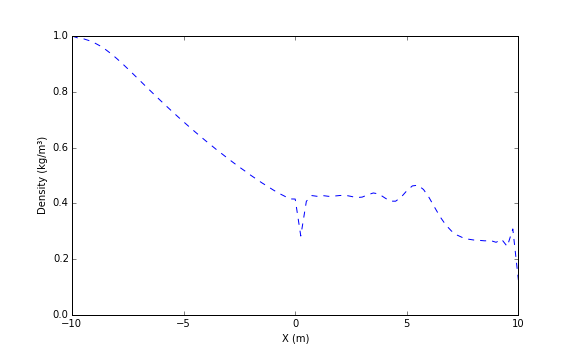
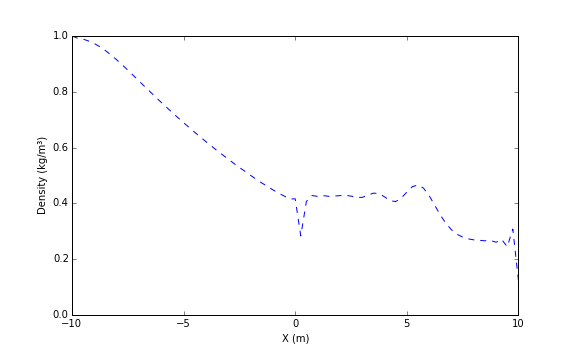
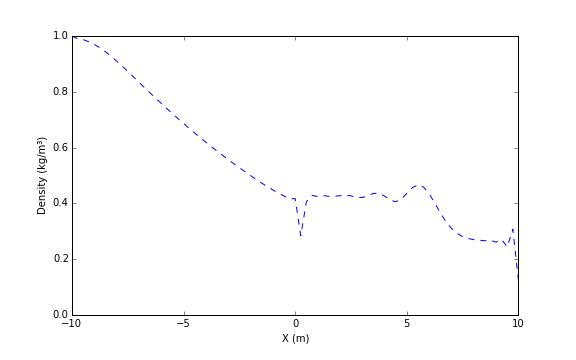
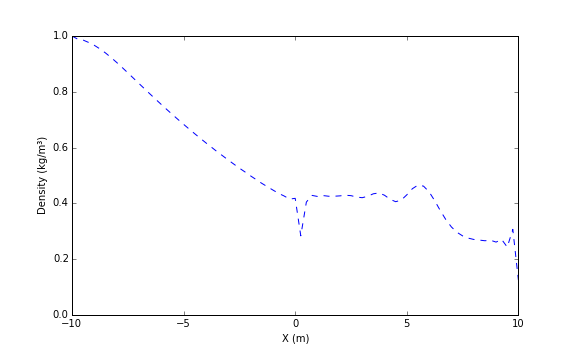
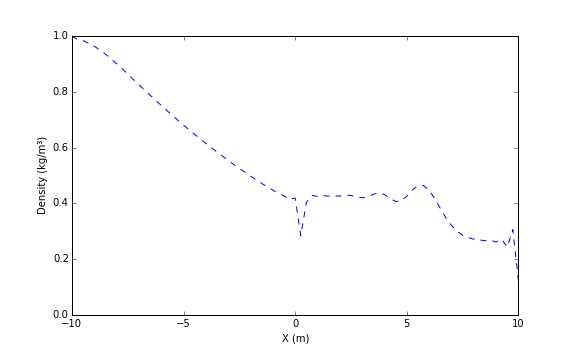
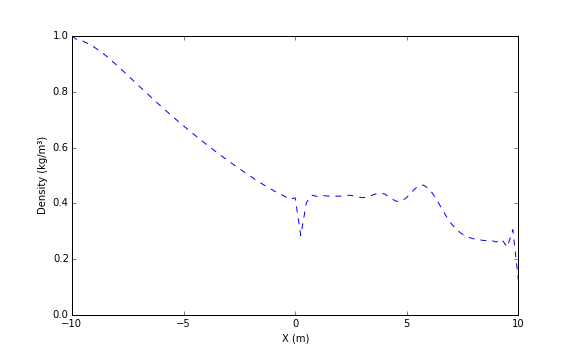
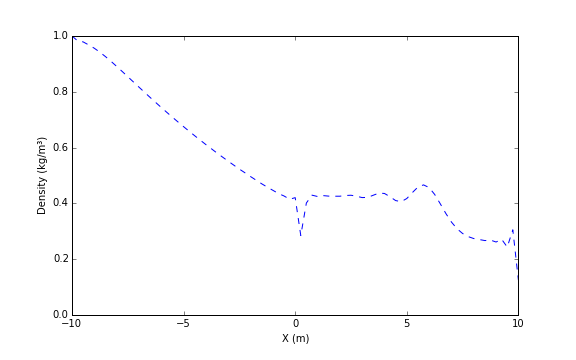
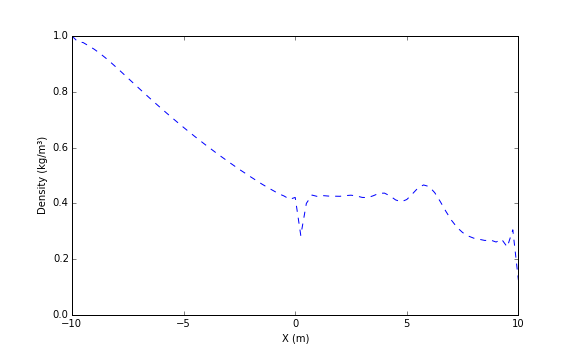
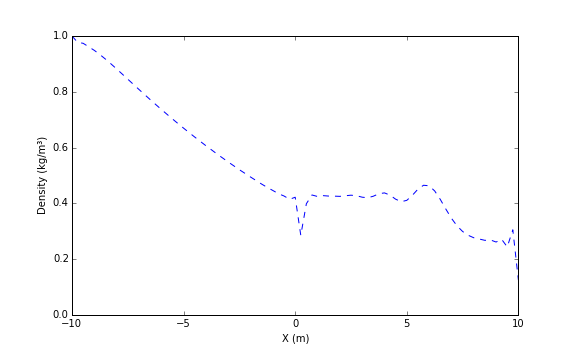
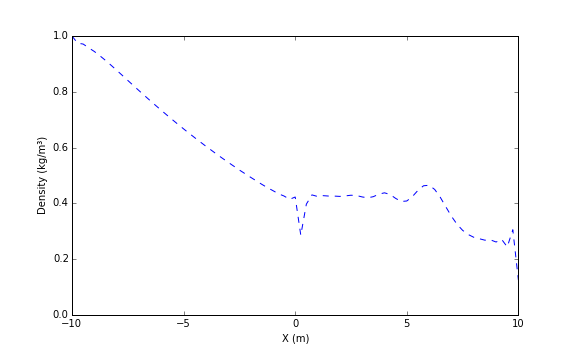
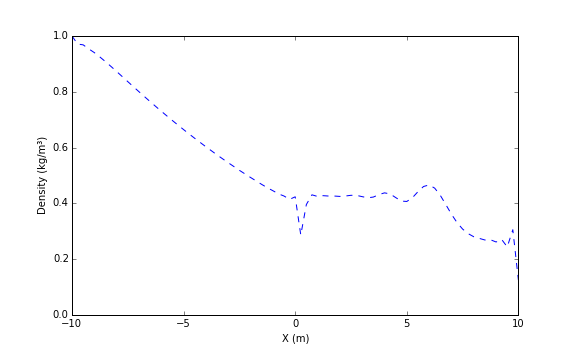
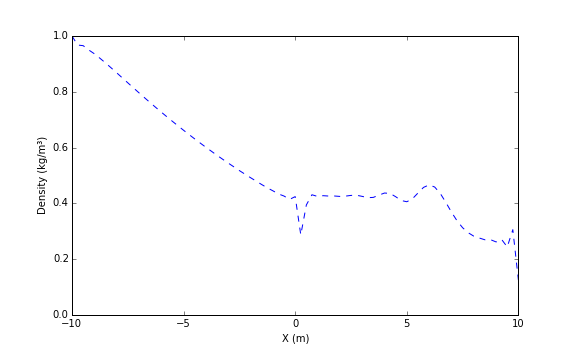
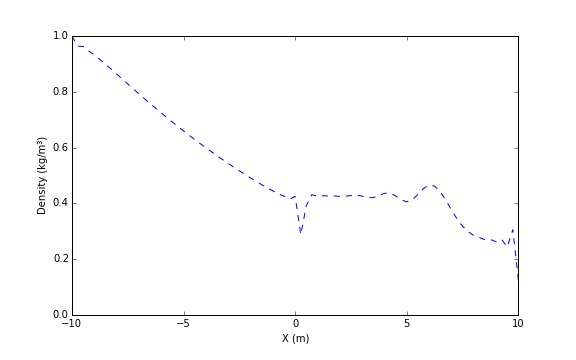
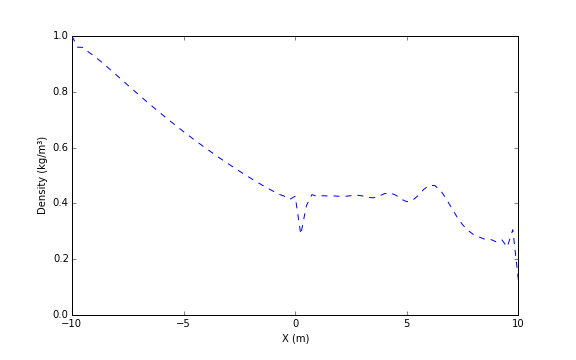
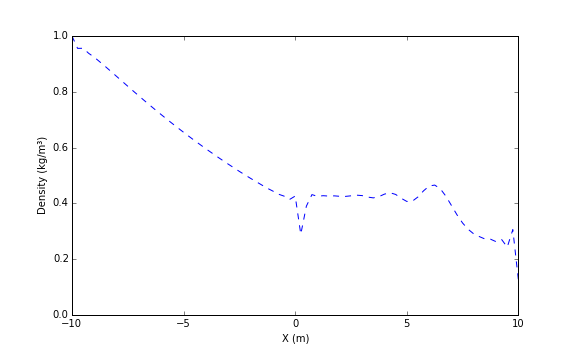
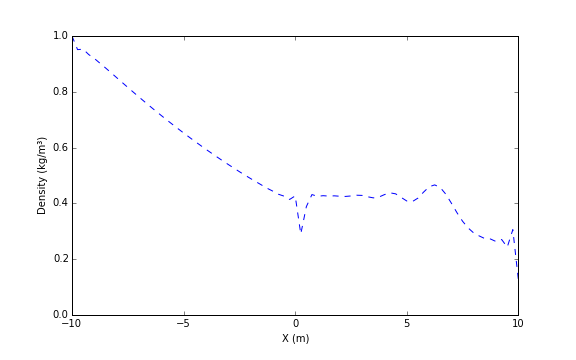
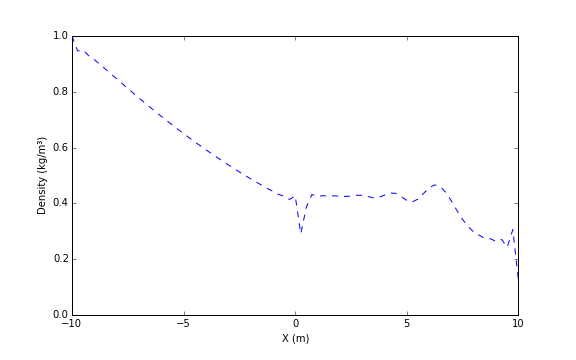
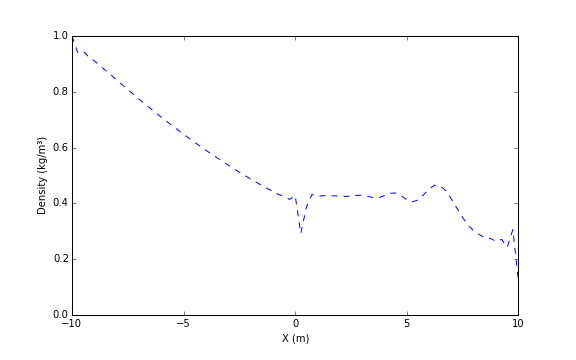
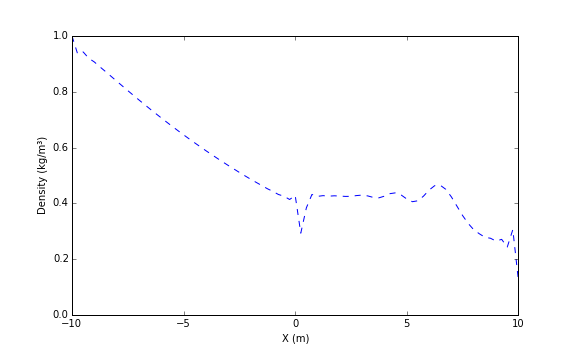
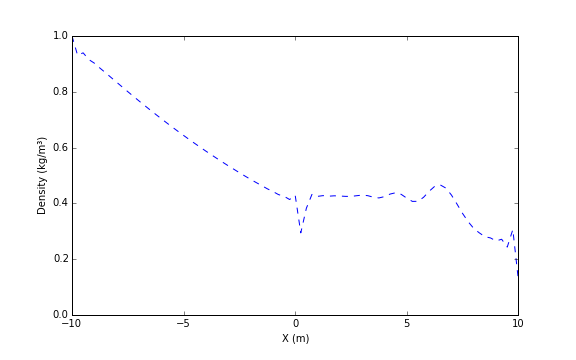
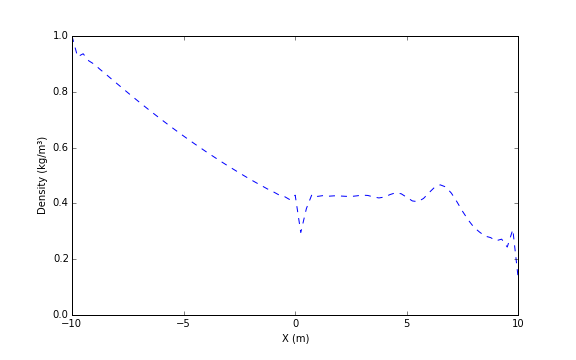
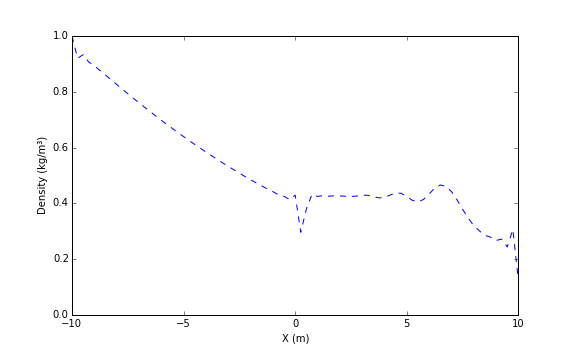
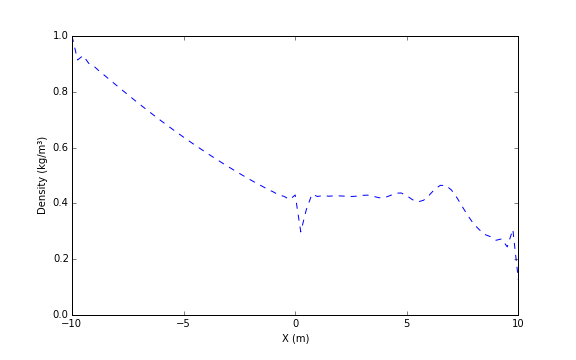
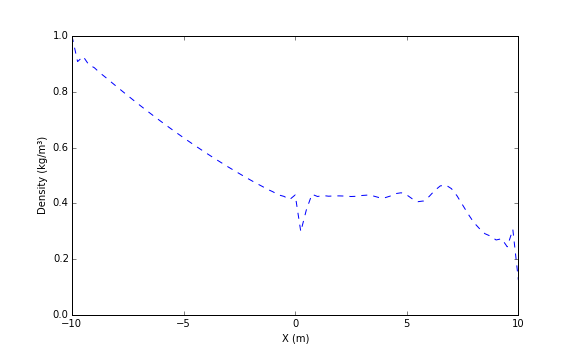
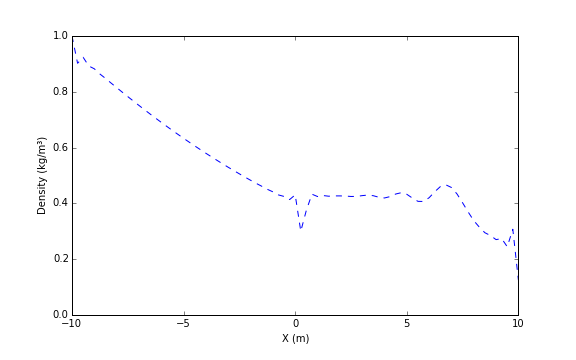
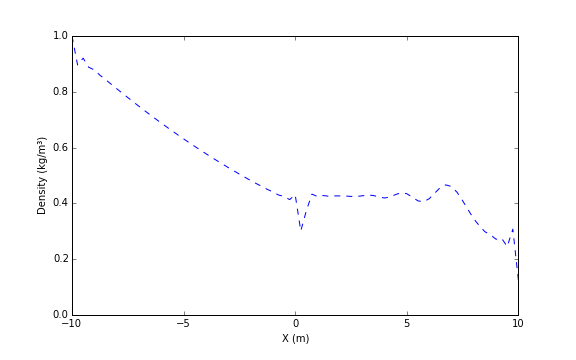
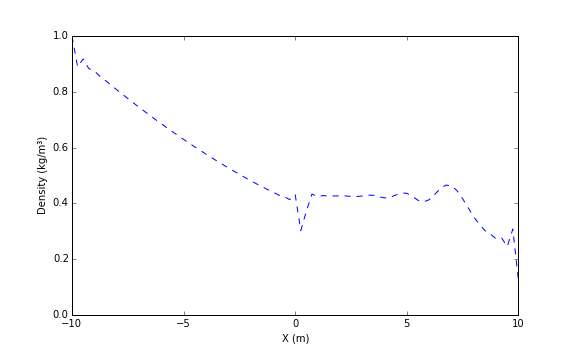
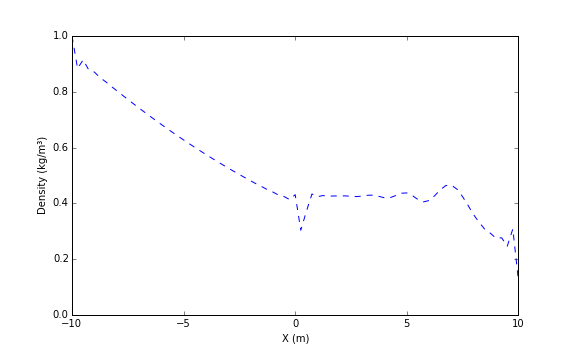
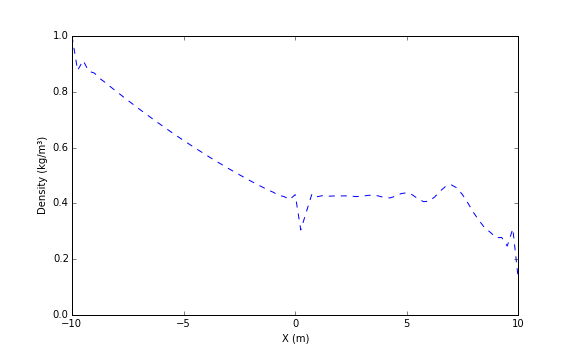
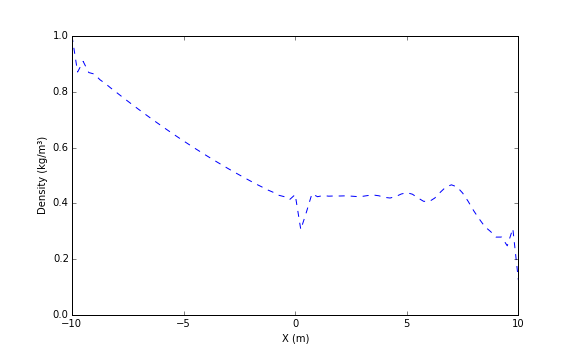
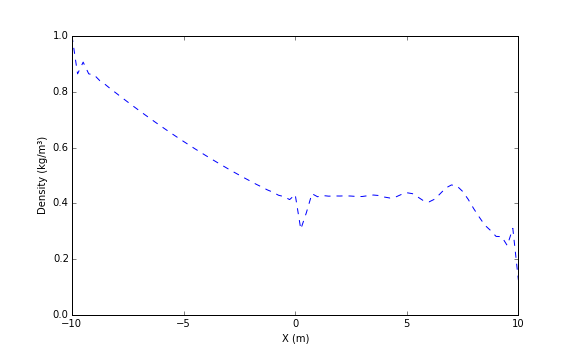
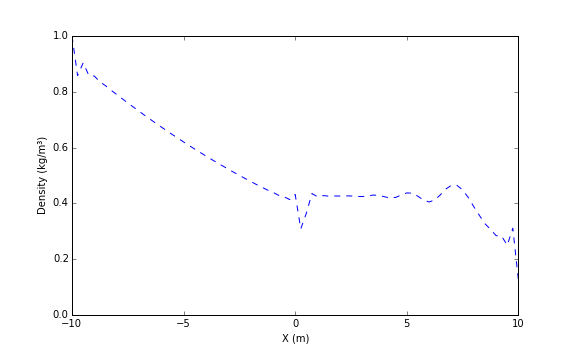
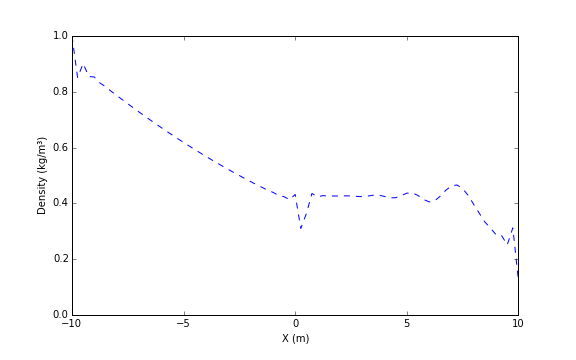
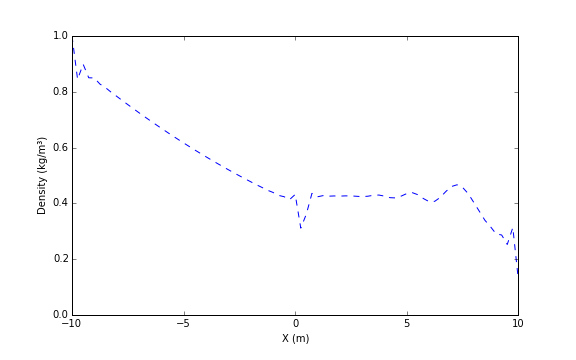
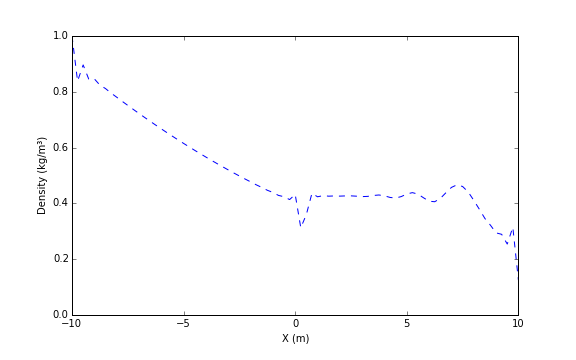
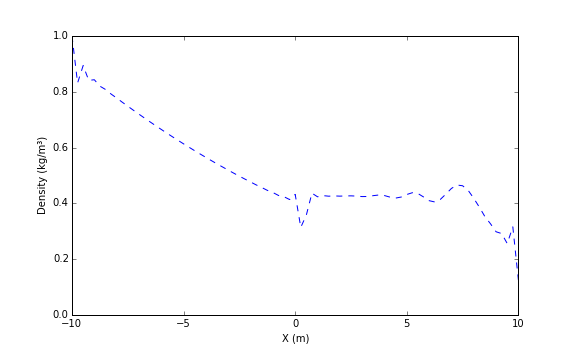
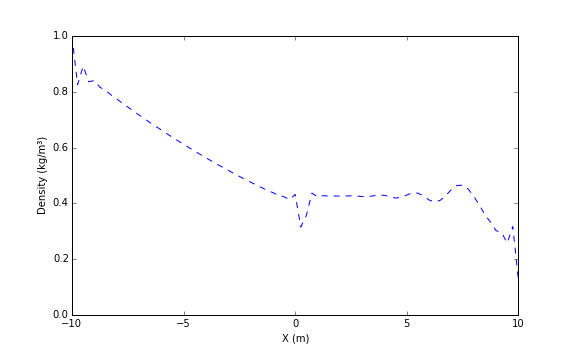
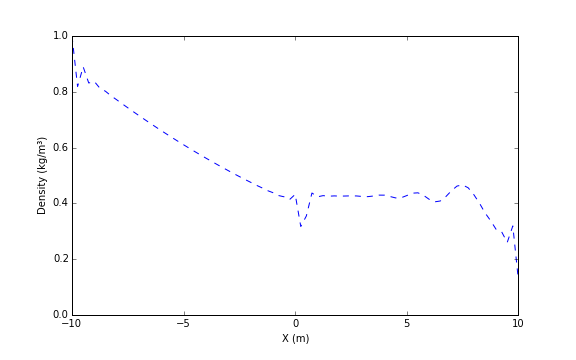
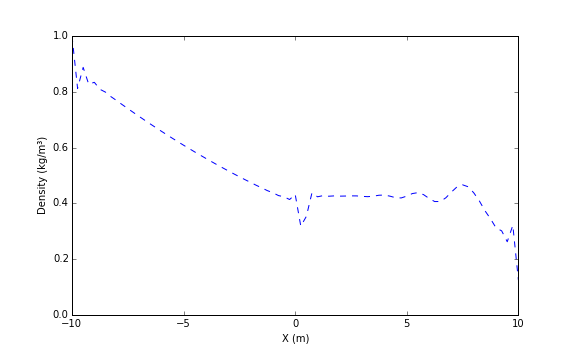
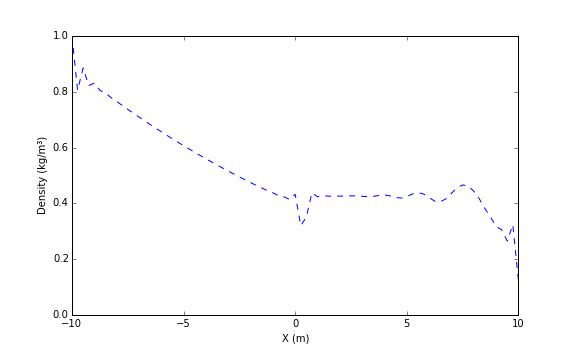
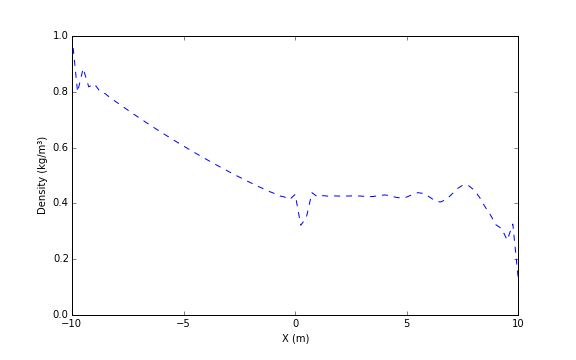
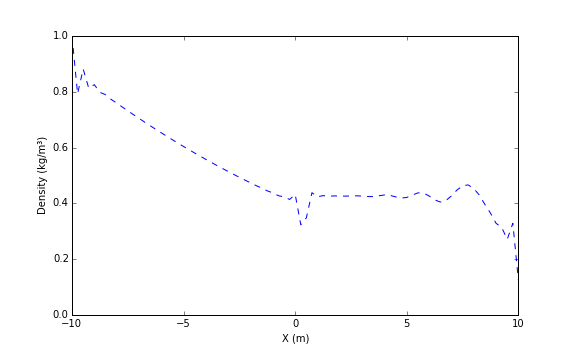
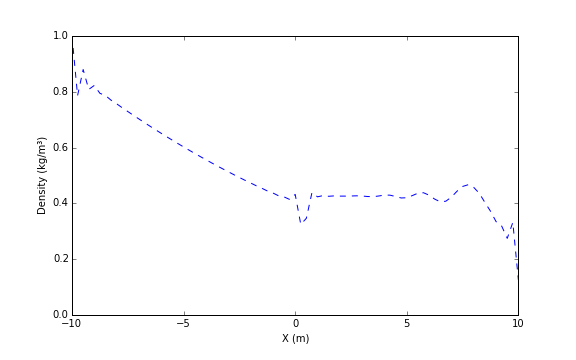
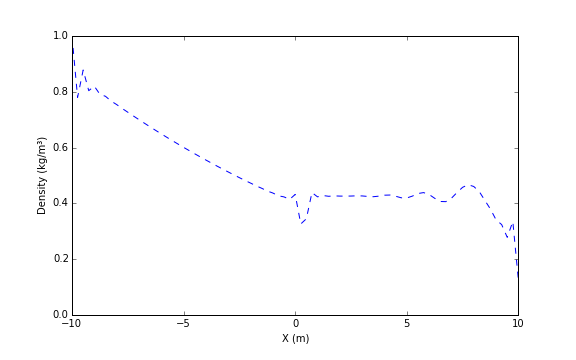

In [47]:
tf = 0.032
u = ComputeInitialCondition(ICL,ICR,gamma,nx)
Utot = SodsShock(u,tf,gamma,dt,nx,dx) 
rho = Utot[:,0,:]
visual(rho,(0,1),"X (m)","Density (kg/m³)")

On n'analysera que la densité pour ce dernier cas. On observe dans dans l'annimation que la densité va vers la fin essayer d'être la même partout. Il est physiquement certain que au bout d'un temps infini la densité moyenne sera la même partout ainsi que la pression et la vistesse sera nulle. Mais la simulation a ces limites on ne peux pas aller aussi loin que l'on veut. 

Enfin on voit aussi que les condition au bords pose problème car dans le cas physique elles devraient varriées au bout d'un certain temps pour que la densité soit partout la même dans le tube. Or ce n'est pas le cas quelque soit toi elles vallent à gauche ICL et à droite ICR. Ceci va créer des oscilations dans la solution et vont empecher de modéliser l'entiereté du phénomène. 

## CCL: